In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reading the features matrix

In [2]:
def get_feature_matrix(file_path):
    df = pd.read_csv(file_path, header=0)
    #the total of 24 valueable features
    #the first 2 are not helpful (serial number and date)
    c = len(df.iloc[0,:])
    df_ = df.iloc[:,2:c]
    if len(df_.iloc[0,:])==25:
        #print('train')
        res = df_.iloc[:,0:-1].values
    else:
        #print('test')
        res = df_.values
    return res

In [3]:
def get_output(file_path):
    #assuming the last column is the output column
    df = pd.read_csv(file_path,header=0)
    res = np.array(df.iloc[:,len(df.columns)-1])
    return res

In [4]:
X = get_feature_matrix("../data/train.csv")
Y = get_output("../data/train.csv")
###for cross validation
n_samples = len(Y)
train_X = X[0:int(np.floor(n_samples*0.75)), :]
X_ = X[int(np.floor(n_samples*0.75)):n_samples, :]
train_Y = Y[0:int(np.floor(n_samples*0.75))]
Y_ = Y[int(np.floor(n_samples*0.75)):n_samples]

In [5]:
len(X[:,0])

13000

SyntaxError: invalid syntax (<ipython-input-254-c34f6b40cda3>, line 1)


# Attempt to do feature Engineering

In [6]:
X_egn = X
X_egn[:,-3] = 1/X[:,-3]
#humidity and temp are inversely related
X_egn[:,range(1,17,2)] = 1/X_egn[:,range(1,17,2)] 

# Costs and other utility functions

In [25]:
def get_cost(W,X,Y):
    n = len(X[0,:])
    m = len(Y)
    cost = 0
    for i in range(0,m):
        cost += (sum(W*X[i,:]) - Y[i])**2
    cost = cost/(2*m)
    
    return cost

In [51]:
get_cost(np.array([6,7,8,9,10]), np.array([[1,2,3,4,5]]), np.array([12]))

6962.0

In [54]:
w = np.array([6,7,8,9,10])
x = np.array([[1,2,3,4,5]])
y = np.array([12])
(sum(w*x[0])-y[0])**2/2

6962.0

In [35]:
import random

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        my_cost = get_cost(theta,x,y)
        cost = np.sum(loss**2)/(2*m)
        print("Iteration %d | myCost: %f | Cost: %f" % (i, my_cost,cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta

def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
m, n = np.shape(x)
numIterations= 100000
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

Iteration 0 | myCost: 421.958596 | Cost: 421.958596
Iteration 1 | myCost: 236.744967 | Cost: 236.744967
Iteration 2 | myCost: 160.362081 | Cost: 160.362081
Iteration 3 | myCost: 128.852523 | Cost: 128.852523
Iteration 4 | myCost: 115.845235 | Cost: 115.845235
Iteration 5 | myCost: 110.466846 | Cost: 110.466846
Iteration 6 | myCost: 108.234025 | Cost: 108.234025
Iteration 7 | myCost: 107.298196 | Cost: 107.298196
Iteration 8 | myCost: 106.897148 | Cost: 106.897148
Iteration 9 | myCost: 106.716607 | Cost: 106.716607
Iteration 10 | myCost: 106.626989 | Cost: 106.626989
Iteration 11 | myCost: 106.574865 | Cost: 106.574865
Iteration 12 | myCost: 106.538204 | Cost: 106.538204
Iteration 13 | myCost: 106.507923 | Cost: 106.507923
Iteration 14 | myCost: 106.480276 | Cost: 106.480276
Iteration 15 | myCost: 106.453719 | Cost: 106.453719
Iteration 16 | myCost: 106.427615 | Cost: 106.427615
Iteration 17 | myCost: 106.401703 | Cost: 106.401703
Iteration 18 | myCost: 106.375872 | Cost: 106.375872
Ite

Iteration 407 | myCost: 96.828752 | Cost: 96.828752
Iteration 408 | myCost: 96.805403 | Cost: 96.805403
Iteration 409 | myCost: 96.782061 | Cost: 96.782061
Iteration 410 | myCost: 96.758724 | Cost: 96.758724
Iteration 411 | myCost: 96.735393 | Cost: 96.735393
Iteration 412 | myCost: 96.712069 | Cost: 96.712069
Iteration 413 | myCost: 96.688750 | Cost: 96.688750
Iteration 414 | myCost: 96.665437 | Cost: 96.665437
Iteration 415 | myCost: 96.642130 | Cost: 96.642130
Iteration 416 | myCost: 96.618829 | Cost: 96.618829
Iteration 417 | myCost: 96.595534 | Cost: 96.595534
Iteration 418 | myCost: 96.572245 | Cost: 96.572245
Iteration 419 | myCost: 96.548961 | Cost: 96.548961
Iteration 420 | myCost: 96.525684 | Cost: 96.525684
Iteration 421 | myCost: 96.502412 | Cost: 96.502412
Iteration 422 | myCost: 96.479147 | Cost: 96.479147
Iteration 423 | myCost: 96.455887 | Cost: 96.455887
Iteration 424 | myCost: 96.432633 | Cost: 96.432633
Iteration 425 | myCost: 96.409385 | Cost: 96.409385
Iteration 42

Iteration 821 | myCost: 87.651712 | Cost: 87.651712
Iteration 822 | myCost: 87.630692 | Cost: 87.630692
Iteration 823 | myCost: 87.609677 | Cost: 87.609677
Iteration 824 | myCost: 87.588667 | Cost: 87.588667
Iteration 825 | myCost: 87.567663 | Cost: 87.567663
Iteration 826 | myCost: 87.546664 | Cost: 87.546664
Iteration 827 | myCost: 87.525670 | Cost: 87.525670
Iteration 828 | myCost: 87.504682 | Cost: 87.504682
Iteration 829 | myCost: 87.483699 | Cost: 87.483699
Iteration 830 | myCost: 87.462722 | Cost: 87.462722
Iteration 831 | myCost: 87.441749 | Cost: 87.441749
Iteration 832 | myCost: 87.420782 | Cost: 87.420782
Iteration 833 | myCost: 87.399821 | Cost: 87.399821
Iteration 834 | myCost: 87.378864 | Cost: 87.378864
Iteration 835 | myCost: 87.357913 | Cost: 87.357913
Iteration 836 | myCost: 87.336968 | Cost: 87.336968
Iteration 837 | myCost: 87.316027 | Cost: 87.316027
Iteration 838 | myCost: 87.295092 | Cost: 87.295092
Iteration 839 | myCost: 87.274162 | Cost: 87.274162
Iteration 84

Iteration 1229 | myCost: 79.503400 | Cost: 79.503400
Iteration 1230 | myCost: 79.484447 | Cost: 79.484447
Iteration 1231 | myCost: 79.465499 | Cost: 79.465499
Iteration 1232 | myCost: 79.446555 | Cost: 79.446555
Iteration 1233 | myCost: 79.427617 | Cost: 79.427617
Iteration 1234 | myCost: 79.408683 | Cost: 79.408683
Iteration 1235 | myCost: 79.389754 | Cost: 79.389754
Iteration 1236 | myCost: 79.370830 | Cost: 79.370830
Iteration 1237 | myCost: 79.351910 | Cost: 79.351910
Iteration 1238 | myCost: 79.332996 | Cost: 79.332996
Iteration 1239 | myCost: 79.314086 | Cost: 79.314086
Iteration 1240 | myCost: 79.295181 | Cost: 79.295181
Iteration 1241 | myCost: 79.276281 | Cost: 79.276281
Iteration 1242 | myCost: 79.257385 | Cost: 79.257385
Iteration 1243 | myCost: 79.238495 | Cost: 79.238495
Iteration 1244 | myCost: 79.219609 | Cost: 79.219609
Iteration 1245 | myCost: 79.200728 | Cost: 79.200728
Iteration 1246 | myCost: 79.181851 | Cost: 79.181851
Iteration 1247 | myCost: 79.162980 | Cost: 79.

Iteration 1635 | myCost: 72.190607 | Cost: 72.190607
Iteration 1636 | myCost: 72.173509 | Cost: 72.173509
Iteration 1637 | myCost: 72.156415 | Cost: 72.156415
Iteration 1638 | myCost: 72.139326 | Cost: 72.139326
Iteration 1639 | myCost: 72.122241 | Cost: 72.122241
Iteration 1640 | myCost: 72.105161 | Cost: 72.105161
Iteration 1641 | myCost: 72.088085 | Cost: 72.088085
Iteration 1642 | myCost: 72.071013 | Cost: 72.071013
Iteration 1643 | myCost: 72.053945 | Cost: 72.053945
Iteration 1644 | myCost: 72.036882 | Cost: 72.036882
Iteration 1645 | myCost: 72.019823 | Cost: 72.019823
Iteration 1646 | myCost: 72.002769 | Cost: 72.002769
Iteration 1647 | myCost: 71.985719 | Cost: 71.985719
Iteration 1648 | myCost: 71.968673 | Cost: 71.968673
Iteration 1649 | myCost: 71.951631 | Cost: 71.951631
Iteration 1650 | myCost: 71.934594 | Cost: 71.934594
Iteration 1651 | myCost: 71.917561 | Cost: 71.917561
Iteration 1652 | myCost: 71.900533 | Cost: 71.900533
Iteration 1653 | myCost: 71.883508 | Cost: 71.

Iteration 2041 | myCost: 65.593626 | Cost: 65.593626
Iteration 2042 | myCost: 65.578202 | Cost: 65.578202
Iteration 2043 | myCost: 65.562781 | Cost: 65.562781
Iteration 2044 | myCost: 65.547365 | Cost: 65.547365
Iteration 2045 | myCost: 65.531952 | Cost: 65.531952
Iteration 2046 | myCost: 65.516544 | Cost: 65.516544
Iteration 2047 | myCost: 65.501139 | Cost: 65.501139
Iteration 2048 | myCost: 65.485739 | Cost: 65.485739
Iteration 2049 | myCost: 65.470342 | Cost: 65.470342
Iteration 2050 | myCost: 65.454949 | Cost: 65.454949
Iteration 2051 | myCost: 65.439560 | Cost: 65.439560
Iteration 2052 | myCost: 65.424175 | Cost: 65.424175
Iteration 2053 | myCost: 65.408793 | Cost: 65.408793
Iteration 2054 | myCost: 65.393416 | Cost: 65.393416
Iteration 2055 | myCost: 65.378043 | Cost: 65.378043
Iteration 2056 | myCost: 65.362673 | Cost: 65.362673
Iteration 2057 | myCost: 65.347307 | Cost: 65.347307
Iteration 2058 | myCost: 65.331946 | Cost: 65.331946
Iteration 2059 | myCost: 65.316588 | Cost: 65.

Iteration 2454 | myCost: 59.545064 | Cost: 59.545064
Iteration 2455 | myCost: 59.531174 | Cost: 59.531174
Iteration 2456 | myCost: 59.517288 | Cost: 59.517288
Iteration 2457 | myCost: 59.503405 | Cost: 59.503405
Iteration 2458 | myCost: 59.489526 | Cost: 59.489526
Iteration 2459 | myCost: 59.475650 | Cost: 59.475650
Iteration 2460 | myCost: 59.461778 | Cost: 59.461778
Iteration 2461 | myCost: 59.447910 | Cost: 59.447910
Iteration 2462 | myCost: 59.434045 | Cost: 59.434045
Iteration 2463 | myCost: 59.420183 | Cost: 59.420183
Iteration 2464 | myCost: 59.406325 | Cost: 59.406325
Iteration 2465 | myCost: 59.392470 | Cost: 59.392470
Iteration 2466 | myCost: 59.378619 | Cost: 59.378619
Iteration 2467 | myCost: 59.364772 | Cost: 59.364772
Iteration 2468 | myCost: 59.350928 | Cost: 59.350928
Iteration 2469 | myCost: 59.337087 | Cost: 59.337087
Iteration 2470 | myCost: 59.323251 | Cost: 59.323251
Iteration 2471 | myCost: 59.309417 | Cost: 59.309417
Iteration 2472 | myCost: 59.295587 | Cost: 59.

Iteration 2886 | myCost: 53.861140 | Cost: 53.861140
Iteration 2887 | myCost: 53.848692 | Cost: 53.848692
Iteration 2888 | myCost: 53.836247 | Cost: 53.836247
Iteration 2889 | myCost: 53.823806 | Cost: 53.823806
Iteration 2890 | myCost: 53.811368 | Cost: 53.811368
Iteration 2891 | myCost: 53.798933 | Cost: 53.798933
Iteration 2892 | myCost: 53.786501 | Cost: 53.786501
Iteration 2893 | myCost: 53.774072 | Cost: 53.774072
Iteration 2894 | myCost: 53.761646 | Cost: 53.761646
Iteration 2895 | myCost: 53.749224 | Cost: 53.749224
Iteration 2896 | myCost: 53.736804 | Cost: 53.736804
Iteration 2897 | myCost: 53.724388 | Cost: 53.724388
Iteration 2898 | myCost: 53.711975 | Cost: 53.711975
Iteration 2899 | myCost: 53.699565 | Cost: 53.699565
Iteration 2900 | myCost: 53.687158 | Cost: 53.687158
Iteration 2901 | myCost: 53.674755 | Cost: 53.674755
Iteration 2902 | myCost: 53.662354 | Cost: 53.662354
Iteration 2903 | myCost: 53.649957 | Cost: 53.649957
Iteration 2904 | myCost: 53.637563 | Cost: 53.

Iteration 3334 | myCost: 48.589153 | Cost: 48.589153
Iteration 3335 | myCost: 48.578043 | Cost: 48.578043
Iteration 3336 | myCost: 48.566935 | Cost: 48.566935
Iteration 3337 | myCost: 48.555831 | Cost: 48.555831
Iteration 3338 | myCost: 48.544729 | Cost: 48.544729
Iteration 3339 | myCost: 48.533630 | Cost: 48.533630
Iteration 3340 | myCost: 48.522534 | Cost: 48.522534
Iteration 3341 | myCost: 48.511440 | Cost: 48.511440
Iteration 3342 | myCost: 48.500350 | Cost: 48.500350
Iteration 3343 | myCost: 48.489262 | Cost: 48.489262
Iteration 3344 | myCost: 48.478177 | Cost: 48.478177
Iteration 3345 | myCost: 48.467095 | Cost: 48.467095
Iteration 3346 | myCost: 48.456016 | Cost: 48.456016
Iteration 3347 | myCost: 48.444939 | Cost: 48.444939
Iteration 3348 | myCost: 48.433866 | Cost: 48.433866
Iteration 3349 | myCost: 48.422795 | Cost: 48.422795
Iteration 3350 | myCost: 48.411727 | Cost: 48.411727
Iteration 3351 | myCost: 48.400661 | Cost: 48.400661
Iteration 3352 | myCost: 48.389599 | Cost: 48.

Iteration 3787 | myCost: 43.834070 | Cost: 43.834070
Iteration 3788 | myCost: 43.824166 | Cost: 43.824166
Iteration 3789 | myCost: 43.814265 | Cost: 43.814265
Iteration 3790 | myCost: 43.804366 | Cost: 43.804366
Iteration 3791 | myCost: 43.794470 | Cost: 43.794470
Iteration 3792 | myCost: 43.784576 | Cost: 43.784576
Iteration 3793 | myCost: 43.774684 | Cost: 43.774684
Iteration 3794 | myCost: 43.764796 | Cost: 43.764796
Iteration 3795 | myCost: 43.754909 | Cost: 43.754909
Iteration 3796 | myCost: 43.745025 | Cost: 43.745025
Iteration 3797 | myCost: 43.735144 | Cost: 43.735144
Iteration 3798 | myCost: 43.725265 | Cost: 43.725265
Iteration 3799 | myCost: 43.715389 | Cost: 43.715389
Iteration 3800 | myCost: 43.705515 | Cost: 43.705515
Iteration 3801 | myCost: 43.695644 | Cost: 43.695644
Iteration 3802 | myCost: 43.685775 | Cost: 43.685775
Iteration 3803 | myCost: 43.675909 | Cost: 43.675909
Iteration 3804 | myCost: 43.666045 | Cost: 43.666045
Iteration 3805 | myCost: 43.656184 | Cost: 43.

Iteration 4223 | myCost: 39.745718 | Cost: 39.745718
Iteration 4224 | myCost: 39.736852 | Cost: 39.736852
Iteration 4225 | myCost: 39.727987 | Cost: 39.727987
Iteration 4226 | myCost: 39.719125 | Cost: 39.719125
Iteration 4227 | myCost: 39.710265 | Cost: 39.710265
Iteration 4228 | myCost: 39.701407 | Cost: 39.701407
Iteration 4229 | myCost: 39.692552 | Cost: 39.692552
Iteration 4230 | myCost: 39.683699 | Cost: 39.683699
Iteration 4231 | myCost: 39.674848 | Cost: 39.674848
Iteration 4232 | myCost: 39.665999 | Cost: 39.665999
Iteration 4233 | myCost: 39.657152 | Cost: 39.657152
Iteration 4234 | myCost: 39.648308 | Cost: 39.648308
Iteration 4235 | myCost: 39.639466 | Cost: 39.639466
Iteration 4236 | myCost: 39.630626 | Cost: 39.630626
Iteration 4237 | myCost: 39.621789 | Cost: 39.621789
Iteration 4238 | myCost: 39.612953 | Cost: 39.612953
Iteration 4239 | myCost: 39.604120 | Cost: 39.604120
Iteration 4240 | myCost: 39.595290 | Cost: 39.595290
Iteration 4241 | myCost: 39.586461 | Cost: 39.

Iteration 4667 | myCost: 36.022073 | Cost: 36.022073
Iteration 4668 | myCost: 36.014151 | Cost: 36.014151
Iteration 4669 | myCost: 36.006231 | Cost: 36.006231
Iteration 4670 | myCost: 35.998313 | Cost: 35.998313
Iteration 4671 | myCost: 35.990397 | Cost: 35.990397
Iteration 4672 | myCost: 35.982483 | Cost: 35.982483
Iteration 4673 | myCost: 35.974571 | Cost: 35.974571
Iteration 4674 | myCost: 35.966661 | Cost: 35.966661
Iteration 4675 | myCost: 35.958753 | Cost: 35.958753
Iteration 4676 | myCost: 35.950847 | Cost: 35.950847
Iteration 4677 | myCost: 35.942943 | Cost: 35.942943
Iteration 4678 | myCost: 35.935041 | Cost: 35.935041
Iteration 4679 | myCost: 35.927141 | Cost: 35.927141
Iteration 4680 | myCost: 35.919243 | Cost: 35.919243
Iteration 4681 | myCost: 35.911347 | Cost: 35.911347
Iteration 4682 | myCost: 35.903453 | Cost: 35.903453
Iteration 4683 | myCost: 35.895561 | Cost: 35.895561
Iteration 4684 | myCost: 35.887671 | Cost: 35.887671
Iteration 4685 | myCost: 35.879783 | Cost: 35.

Iteration 5097 | myCost: 32.794430 | Cost: 32.794430
Iteration 5098 | myCost: 32.787327 | Cost: 32.787327
Iteration 5099 | myCost: 32.780226 | Cost: 32.780226
Iteration 5100 | myCost: 32.773126 | Cost: 32.773126
Iteration 5101 | myCost: 32.766028 | Cost: 32.766028
Iteration 5102 | myCost: 32.758932 | Cost: 32.758932
Iteration 5103 | myCost: 32.751838 | Cost: 32.751838
Iteration 5104 | myCost: 32.744745 | Cost: 32.744745
Iteration 5105 | myCost: 32.737655 | Cost: 32.737655
Iteration 5106 | myCost: 32.730566 | Cost: 32.730566
Iteration 5107 | myCost: 32.723479 | Cost: 32.723479
Iteration 5108 | myCost: 32.716394 | Cost: 32.716394
Iteration 5109 | myCost: 32.709310 | Cost: 32.709310
Iteration 5110 | myCost: 32.702229 | Cost: 32.702229
Iteration 5111 | myCost: 32.695149 | Cost: 32.695149
Iteration 5112 | myCost: 32.688071 | Cost: 32.688071
Iteration 5113 | myCost: 32.680995 | Cost: 32.680995
Iteration 5114 | myCost: 32.673920 | Cost: 32.673920
Iteration 5115 | myCost: 32.666848 | Cost: 32.

Iteration 5555 | myCost: 29.722679 | Cost: 29.722679
Iteration 5556 | myCost: 29.716355 | Cost: 29.716355
Iteration 5557 | myCost: 29.710033 | Cost: 29.710033
Iteration 5558 | myCost: 29.703712 | Cost: 29.703712
Iteration 5559 | myCost: 29.697393 | Cost: 29.697393
Iteration 5560 | myCost: 29.691075 | Cost: 29.691075
Iteration 5561 | myCost: 29.684759 | Cost: 29.684759
Iteration 5562 | myCost: 29.678445 | Cost: 29.678445
Iteration 5563 | myCost: 29.672132 | Cost: 29.672132
Iteration 5564 | myCost: 29.665821 | Cost: 29.665821
Iteration 5565 | myCost: 29.659512 | Cost: 29.659512
Iteration 5566 | myCost: 29.653204 | Cost: 29.653204
Iteration 5567 | myCost: 29.646897 | Cost: 29.646897
Iteration 5568 | myCost: 29.640593 | Cost: 29.640593
Iteration 5569 | myCost: 29.634290 | Cost: 29.634290
Iteration 5570 | myCost: 29.627988 | Cost: 29.627988
Iteration 5571 | myCost: 29.621688 | Cost: 29.621688
Iteration 5572 | myCost: 29.615390 | Cost: 29.615390
Iteration 5573 | myCost: 29.609093 | Cost: 29.

Iteration 5962 | myCost: 27.276966 | Cost: 27.276966
Iteration 5963 | myCost: 27.271263 | Cost: 27.271263
Iteration 5964 | myCost: 27.265561 | Cost: 27.265561
Iteration 5965 | myCost: 27.259860 | Cost: 27.259860
Iteration 5966 | myCost: 27.254161 | Cost: 27.254161
Iteration 5967 | myCost: 27.248463 | Cost: 27.248463
Iteration 5968 | myCost: 27.242767 | Cost: 27.242767
Iteration 5969 | myCost: 27.237072 | Cost: 27.237072
Iteration 5970 | myCost: 27.231379 | Cost: 27.231379
Iteration 5971 | myCost: 27.225687 | Cost: 27.225687
Iteration 5972 | myCost: 27.219997 | Cost: 27.219997
Iteration 5973 | myCost: 27.214308 | Cost: 27.214308
Iteration 5974 | myCost: 27.208620 | Cost: 27.208620
Iteration 5975 | myCost: 27.202934 | Cost: 27.202934
Iteration 5976 | myCost: 27.197249 | Cost: 27.197249
Iteration 5977 | myCost: 27.191566 | Cost: 27.191566
Iteration 5978 | myCost: 27.185884 | Cost: 27.185884
Iteration 5979 | myCost: 27.180204 | Cost: 27.180204
Iteration 5980 | myCost: 27.174525 | Cost: 27.

Iteration 6387 | myCost: 24.978822 | Cost: 24.978822
Iteration 6388 | myCost: 24.973701 | Cost: 24.973701
Iteration 6389 | myCost: 24.968582 | Cost: 24.968582
Iteration 6390 | myCost: 24.963464 | Cost: 24.963464
Iteration 6391 | myCost: 24.958348 | Cost: 24.958348
Iteration 6392 | myCost: 24.953232 | Cost: 24.953232
Iteration 6393 | myCost: 24.948118 | Cost: 24.948118
Iteration 6394 | myCost: 24.943006 | Cost: 24.943006
Iteration 6395 | myCost: 24.937894 | Cost: 24.937894
Iteration 6396 | myCost: 24.932784 | Cost: 24.932784
Iteration 6397 | myCost: 24.927676 | Cost: 24.927676
Iteration 6398 | myCost: 24.922568 | Cost: 24.922568
Iteration 6399 | myCost: 24.917462 | Cost: 24.917462
Iteration 6400 | myCost: 24.912357 | Cost: 24.912357
Iteration 6401 | myCost: 24.907254 | Cost: 24.907254
Iteration 6402 | myCost: 24.902151 | Cost: 24.902151
Iteration 6403 | myCost: 24.897050 | Cost: 24.897050
Iteration 6404 | myCost: 24.891951 | Cost: 24.891951
Iteration 6405 | myCost: 24.886852 | Cost: 24.

Iteration 6793 | myCost: 23.003166 | Cost: 23.003166
Iteration 6794 | myCost: 22.998547 | Cost: 22.998547
Iteration 6795 | myCost: 22.993929 | Cost: 22.993929
Iteration 6796 | myCost: 22.989312 | Cost: 22.989312
Iteration 6797 | myCost: 22.984697 | Cost: 22.984697
Iteration 6798 | myCost: 22.980082 | Cost: 22.980082
Iteration 6799 | myCost: 22.975469 | Cost: 22.975469
Iteration 6800 | myCost: 22.970856 | Cost: 22.970856
Iteration 6801 | myCost: 22.966245 | Cost: 22.966245
Iteration 6802 | myCost: 22.961636 | Cost: 22.961636
Iteration 6803 | myCost: 22.957027 | Cost: 22.957027
Iteration 6804 | myCost: 22.952419 | Cost: 22.952419
Iteration 6805 | myCost: 22.947813 | Cost: 22.947813
Iteration 6806 | myCost: 22.943208 | Cost: 22.943208
Iteration 6807 | myCost: 22.938604 | Cost: 22.938604
Iteration 6808 | myCost: 22.934001 | Cost: 22.934001
Iteration 6809 | myCost: 22.929399 | Cost: 22.929399
Iteration 6810 | myCost: 22.924799 | Cost: 22.924799
Iteration 6811 | myCost: 22.920199 | Cost: 22.

Iteration 7197 | myCost: 21.229236 | Cost: 21.229236
Iteration 7198 | myCost: 21.225066 | Cost: 21.225066
Iteration 7199 | myCost: 21.220898 | Cost: 21.220898
Iteration 7200 | myCost: 21.216731 | Cost: 21.216731
Iteration 7201 | myCost: 21.212565 | Cost: 21.212565
Iteration 7202 | myCost: 21.208400 | Cost: 21.208400
Iteration 7203 | myCost: 21.204236 | Cost: 21.204236
Iteration 7204 | myCost: 21.200073 | Cost: 21.200073
Iteration 7205 | myCost: 21.195912 | Cost: 21.195912
Iteration 7206 | myCost: 21.191751 | Cost: 21.191751
Iteration 7207 | myCost: 21.187591 | Cost: 21.187591
Iteration 7208 | myCost: 21.183433 | Cost: 21.183433
Iteration 7209 | myCost: 21.179275 | Cost: 21.179275
Iteration 7210 | myCost: 21.175119 | Cost: 21.175119
Iteration 7211 | myCost: 21.170963 | Cost: 21.170963
Iteration 7212 | myCost: 21.166809 | Cost: 21.166809
Iteration 7213 | myCost: 21.162655 | Cost: 21.162655
Iteration 7214 | myCost: 21.158503 | Cost: 21.158503
Iteration 7215 | myCost: 21.154352 | Cost: 21.

Iteration 7601 | myCost: 19.628134 | Cost: 19.628134
Iteration 7602 | myCost: 19.624371 | Cost: 19.624371
Iteration 7603 | myCost: 19.620609 | Cost: 19.620609
Iteration 7604 | myCost: 19.616848 | Cost: 19.616848
Iteration 7605 | myCost: 19.613087 | Cost: 19.613087
Iteration 7606 | myCost: 19.609328 | Cost: 19.609328
Iteration 7607 | myCost: 19.605570 | Cost: 19.605570
Iteration 7608 | myCost: 19.601813 | Cost: 19.601813
Iteration 7609 | myCost: 19.598056 | Cost: 19.598056
Iteration 7610 | myCost: 19.594301 | Cost: 19.594301
Iteration 7611 | myCost: 19.590547 | Cost: 19.590547
Iteration 7612 | myCost: 19.586793 | Cost: 19.586793
Iteration 7613 | myCost: 19.583041 | Cost: 19.583041
Iteration 7614 | myCost: 19.579289 | Cost: 19.579289
Iteration 7615 | myCost: 19.575539 | Cost: 19.575539
Iteration 7616 | myCost: 19.571789 | Cost: 19.571789
Iteration 7617 | myCost: 19.568040 | Cost: 19.568040
Iteration 7618 | myCost: 19.564292 | Cost: 19.564292
Iteration 7619 | myCost: 19.560546 | Cost: 19.

Iteration 8009 | myCost: 18.169442 | Cost: 18.169442
Iteration 8010 | myCost: 18.166049 | Cost: 18.166049
Iteration 8011 | myCost: 18.162657 | Cost: 18.162657
Iteration 8012 | myCost: 18.159266 | Cost: 18.159266
Iteration 8013 | myCost: 18.155876 | Cost: 18.155876
Iteration 8014 | myCost: 18.152486 | Cost: 18.152486
Iteration 8015 | myCost: 18.149097 | Cost: 18.149097
Iteration 8016 | myCost: 18.145710 | Cost: 18.145710
Iteration 8017 | myCost: 18.142323 | Cost: 18.142323
Iteration 8018 | myCost: 18.138937 | Cost: 18.138937
Iteration 8019 | myCost: 18.135552 | Cost: 18.135552
Iteration 8020 | myCost: 18.132167 | Cost: 18.132167
Iteration 8021 | myCost: 18.128784 | Cost: 18.128784
Iteration 8022 | myCost: 18.125401 | Cost: 18.125401
Iteration 8023 | myCost: 18.122019 | Cost: 18.122019
Iteration 8024 | myCost: 18.118638 | Cost: 18.118638
Iteration 8025 | myCost: 18.115258 | Cost: 18.115258
Iteration 8026 | myCost: 18.111879 | Cost: 18.111879
Iteration 8027 | myCost: 18.108501 | Cost: 18.

Iteration 8437 | myCost: 16.793164 | Cost: 16.793164
Iteration 8438 | myCost: 16.790120 | Cost: 16.790120
Iteration 8439 | myCost: 16.787077 | Cost: 16.787077
Iteration 8440 | myCost: 16.784035 | Cost: 16.784035
Iteration 8441 | myCost: 16.780994 | Cost: 16.780994
Iteration 8442 | myCost: 16.777953 | Cost: 16.777953
Iteration 8443 | myCost: 16.774913 | Cost: 16.774913
Iteration 8444 | myCost: 16.771874 | Cost: 16.771874
Iteration 8445 | myCost: 16.768836 | Cost: 16.768836
Iteration 8446 | myCost: 16.765798 | Cost: 16.765798
Iteration 8447 | myCost: 16.762761 | Cost: 16.762761
Iteration 8448 | myCost: 16.759725 | Cost: 16.759725
Iteration 8449 | myCost: 16.756690 | Cost: 16.756690
Iteration 8450 | myCost: 16.753655 | Cost: 16.753655
Iteration 8451 | myCost: 16.750622 | Cost: 16.750622
Iteration 8452 | myCost: 16.747589 | Cost: 16.747589
Iteration 8453 | myCost: 16.744556 | Cost: 16.744556
Iteration 8454 | myCost: 16.741525 | Cost: 16.741525
Iteration 8455 | myCost: 16.738494 | Cost: 16.

Iteration 8849 | myCost: 15.602298 | Cost: 15.602298
Iteration 8850 | myCost: 15.599556 | Cost: 15.599556
Iteration 8851 | myCost: 15.596815 | Cost: 15.596815
Iteration 8852 | myCost: 15.594075 | Cost: 15.594075
Iteration 8853 | myCost: 15.591335 | Cost: 15.591335
Iteration 8854 | myCost: 15.588596 | Cost: 15.588596
Iteration 8855 | myCost: 15.585858 | Cost: 15.585858
Iteration 8856 | myCost: 15.583121 | Cost: 15.583121
Iteration 8857 | myCost: 15.580384 | Cost: 15.580384
Iteration 8858 | myCost: 15.577648 | Cost: 15.577648
Iteration 8859 | myCost: 15.574912 | Cost: 15.574912
Iteration 8860 | myCost: 15.572177 | Cost: 15.572177
Iteration 8861 | myCost: 15.569443 | Cost: 15.569443
Iteration 8862 | myCost: 15.566710 | Cost: 15.566710
Iteration 8863 | myCost: 15.563978 | Cost: 15.563978
Iteration 8864 | myCost: 15.561246 | Cost: 15.561246
Iteration 8865 | myCost: 15.558514 | Cost: 15.558514
Iteration 8866 | myCost: 15.555784 | Cost: 15.555784
Iteration 8867 | myCost: 15.553054 | Cost: 15.

Iteration 9238 | myCost: 14.586606 | Cost: 14.586606
Iteration 9239 | myCost: 14.584122 | Cost: 14.584122
Iteration 9240 | myCost: 14.581638 | Cost: 14.581638
Iteration 9241 | myCost: 14.579155 | Cost: 14.579155
Iteration 9242 | myCost: 14.576673 | Cost: 14.576673
Iteration 9243 | myCost: 14.574192 | Cost: 14.574192
Iteration 9244 | myCost: 14.571711 | Cost: 14.571711
Iteration 9245 | myCost: 14.569231 | Cost: 14.569231
Iteration 9246 | myCost: 14.566751 | Cost: 14.566751
Iteration 9247 | myCost: 14.564272 | Cost: 14.564272
Iteration 9248 | myCost: 14.561794 | Cost: 14.561794
Iteration 9249 | myCost: 14.559316 | Cost: 14.559316
Iteration 9250 | myCost: 14.556839 | Cost: 14.556839
Iteration 9251 | myCost: 14.554363 | Cost: 14.554363
Iteration 9252 | myCost: 14.551887 | Cost: 14.551887
Iteration 9253 | myCost: 14.549412 | Cost: 14.549412
Iteration 9254 | myCost: 14.546937 | Cost: 14.546937
Iteration 9255 | myCost: 14.544463 | Cost: 14.544463
Iteration 9256 | myCost: 14.541990 | Cost: 14.

Iteration 9649 | myCost: 13.616994 | Cost: 13.616994
Iteration 9650 | myCost: 13.614756 | Cost: 13.614756
Iteration 9651 | myCost: 13.612518 | Cost: 13.612518
Iteration 9652 | myCost: 13.610282 | Cost: 13.610282
Iteration 9653 | myCost: 13.608045 | Cost: 13.608045
Iteration 9654 | myCost: 13.605810 | Cost: 13.605810
Iteration 9655 | myCost: 13.603574 | Cost: 13.603574
Iteration 9656 | myCost: 13.601340 | Cost: 13.601340
Iteration 9657 | myCost: 13.599106 | Cost: 13.599106
Iteration 9658 | myCost: 13.596872 | Cost: 13.596872
Iteration 9659 | myCost: 13.594639 | Cost: 13.594639
Iteration 9660 | myCost: 13.592407 | Cost: 13.592407
Iteration 9661 | myCost: 13.590175 | Cost: 13.590175
Iteration 9662 | myCost: 13.587944 | Cost: 13.587944
Iteration 9663 | myCost: 13.585714 | Cost: 13.585714
Iteration 9664 | myCost: 13.583483 | Cost: 13.583483
Iteration 9665 | myCost: 13.581254 | Cost: 13.581254
Iteration 9666 | myCost: 13.579025 | Cost: 13.579025
Iteration 9667 | myCost: 13.576797 | Cost: 13.

Iteration 10052 | myCost: 12.759551 | Cost: 12.759551
Iteration 10053 | myCost: 12.757531 | Cost: 12.757531
Iteration 10054 | myCost: 12.755511 | Cost: 12.755511
Iteration 10055 | myCost: 12.753491 | Cost: 12.753491
Iteration 10056 | myCost: 12.751472 | Cost: 12.751472
Iteration 10057 | myCost: 12.749454 | Cost: 12.749454
Iteration 10058 | myCost: 12.747436 | Cost: 12.747436
Iteration 10059 | myCost: 12.745419 | Cost: 12.745419
Iteration 10060 | myCost: 12.743402 | Cost: 12.743402
Iteration 10061 | myCost: 12.741385 | Cost: 12.741385
Iteration 10062 | myCost: 12.739369 | Cost: 12.739369
Iteration 10063 | myCost: 12.737354 | Cost: 12.737354
Iteration 10064 | myCost: 12.735339 | Cost: 12.735339
Iteration 10065 | myCost: 12.733325 | Cost: 12.733325
Iteration 10066 | myCost: 12.731311 | Cost: 12.731311
Iteration 10067 | myCost: 12.729298 | Cost: 12.729298
Iteration 10068 | myCost: 12.727285 | Cost: 12.727285
Iteration 10069 | myCost: 12.725273 | Cost: 12.725273
Iteration 10070 | myCost: 12

Iteration 10486 | myCost: 11.929118 | Cost: 11.929118
Iteration 10487 | myCost: 11.927308 | Cost: 11.927308
Iteration 10488 | myCost: 11.925499 | Cost: 11.925499
Iteration 10489 | myCost: 11.923690 | Cost: 11.923690
Iteration 10490 | myCost: 11.921882 | Cost: 11.921882
Iteration 10491 | myCost: 11.920074 | Cost: 11.920074
Iteration 10492 | myCost: 11.918266 | Cost: 11.918266
Iteration 10493 | myCost: 11.916459 | Cost: 11.916459
Iteration 10494 | myCost: 11.914653 | Cost: 11.914653
Iteration 10495 | myCost: 11.912847 | Cost: 11.912847
Iteration 10496 | myCost: 11.911041 | Cost: 11.911041
Iteration 10497 | myCost: 11.909236 | Cost: 11.909236
Iteration 10498 | myCost: 11.907431 | Cost: 11.907431
Iteration 10499 | myCost: 11.905627 | Cost: 11.905627
Iteration 10500 | myCost: 11.903823 | Cost: 11.903823
Iteration 10501 | myCost: 11.902019 | Cost: 11.902019
Iteration 10502 | myCost: 11.900217 | Cost: 11.900217
Iteration 10503 | myCost: 11.898414 | Cost: 11.898414
Iteration 10504 | myCost: 11

Iteration 10910 | myCost: 11.201509 | Cost: 11.201509
Iteration 10911 | myCost: 11.199884 | Cost: 11.199884
Iteration 10912 | myCost: 11.198259 | Cost: 11.198259
Iteration 10913 | myCost: 11.196635 | Cost: 11.196635
Iteration 10914 | myCost: 11.195011 | Cost: 11.195011
Iteration 10915 | myCost: 11.193387 | Cost: 11.193387
Iteration 10916 | myCost: 11.191764 | Cost: 11.191764
Iteration 10917 | myCost: 11.190141 | Cost: 11.190141
Iteration 10918 | myCost: 11.188519 | Cost: 11.188519
Iteration 10919 | myCost: 11.186897 | Cost: 11.186897
Iteration 10920 | myCost: 11.185275 | Cost: 11.185275
Iteration 10921 | myCost: 11.183654 | Cost: 11.183654
Iteration 10922 | myCost: 11.182034 | Cost: 11.182034
Iteration 10923 | myCost: 11.180413 | Cost: 11.180413
Iteration 10924 | myCost: 11.178794 | Cost: 11.178794
Iteration 10925 | myCost: 11.177174 | Cost: 11.177174
Iteration 10926 | myCost: 11.175555 | Cost: 11.175555
Iteration 10927 | myCost: 11.173937 | Cost: 11.173937
Iteration 10928 | myCost: 11

Iteration 11316 | myCost: 10.574446 | Cost: 10.574446
Iteration 11317 | myCost: 10.572980 | Cost: 10.572980
Iteration 11318 | myCost: 10.571514 | Cost: 10.571514
Iteration 11319 | myCost: 10.570049 | Cost: 10.570049
Iteration 11320 | myCost: 10.568584 | Cost: 10.568584
Iteration 11321 | myCost: 10.567119 | Cost: 10.567119
Iteration 11322 | myCost: 10.565655 | Cost: 10.565655
Iteration 11323 | myCost: 10.564191 | Cost: 10.564191
Iteration 11324 | myCost: 10.562727 | Cost: 10.562727
Iteration 11325 | myCost: 10.561264 | Cost: 10.561264
Iteration 11326 | myCost: 10.559802 | Cost: 10.559802
Iteration 11327 | myCost: 10.558339 | Cost: 10.558339
Iteration 11328 | myCost: 10.556877 | Cost: 10.556877
Iteration 11329 | myCost: 10.555415 | Cost: 10.555415
Iteration 11330 | myCost: 10.553954 | Cost: 10.553954
Iteration 11331 | myCost: 10.552493 | Cost: 10.552493
Iteration 11332 | myCost: 10.551033 | Cost: 10.551033
Iteration 11333 | myCost: 10.549573 | Cost: 10.549573
Iteration 11334 | myCost: 10

Iteration 11729 | myCost: 9.999512 | Cost: 9.999512
Iteration 11730 | myCost: 9.998192 | Cost: 9.998192
Iteration 11731 | myCost: 9.996872 | Cost: 9.996872
Iteration 11732 | myCost: 9.995552 | Cost: 9.995552
Iteration 11733 | myCost: 9.994233 | Cost: 9.994233
Iteration 11734 | myCost: 9.992914 | Cost: 9.992914
Iteration 11735 | myCost: 9.991595 | Cost: 9.991595
Iteration 11736 | myCost: 9.990277 | Cost: 9.990277
Iteration 11737 | myCost: 9.988959 | Cost: 9.988959
Iteration 11738 | myCost: 9.987642 | Cost: 9.987642
Iteration 11739 | myCost: 9.986324 | Cost: 9.986324
Iteration 11740 | myCost: 9.985007 | Cost: 9.985007
Iteration 11741 | myCost: 9.983691 | Cost: 9.983691
Iteration 11742 | myCost: 9.982375 | Cost: 9.982375
Iteration 11743 | myCost: 9.981059 | Cost: 9.981059
Iteration 11744 | myCost: 9.979743 | Cost: 9.979743
Iteration 11745 | myCost: 9.978428 | Cost: 9.978428
Iteration 11746 | myCost: 9.977113 | Cost: 9.977113
Iteration 11747 | myCost: 9.975798 | Cost: 9.975798
Iteration 11

Iteration 12148 | myCost: 9.474647 | Cost: 9.474647
Iteration 12149 | myCost: 9.473460 | Cost: 9.473460
Iteration 12150 | myCost: 9.472273 | Cost: 9.472273
Iteration 12151 | myCost: 9.471086 | Cost: 9.471086
Iteration 12152 | myCost: 9.469900 | Cost: 9.469900
Iteration 12153 | myCost: 9.468714 | Cost: 9.468714
Iteration 12154 | myCost: 9.467529 | Cost: 9.467529
Iteration 12155 | myCost: 9.466343 | Cost: 9.466343
Iteration 12156 | myCost: 9.465158 | Cost: 9.465158
Iteration 12157 | myCost: 9.463974 | Cost: 9.463974
Iteration 12158 | myCost: 9.462789 | Cost: 9.462789
Iteration 12159 | myCost: 9.461605 | Cost: 9.461605
Iteration 12160 | myCost: 9.460421 | Cost: 9.460421
Iteration 12161 | myCost: 9.459238 | Cost: 9.459238
Iteration 12162 | myCost: 9.458055 | Cost: 9.458055
Iteration 12163 | myCost: 9.456872 | Cost: 9.456872
Iteration 12164 | myCost: 9.455689 | Cost: 9.455689
Iteration 12165 | myCost: 9.454507 | Cost: 9.454507
Iteration 12166 | myCost: 9.453325 | Cost: 9.453325
Iteration 12

Iteration 12582 | myCost: 8.986735 | Cost: 8.986735
Iteration 12583 | myCost: 8.985671 | Cost: 8.985671
Iteration 12584 | myCost: 8.984608 | Cost: 8.984608
Iteration 12585 | myCost: 8.983546 | Cost: 8.983546
Iteration 12586 | myCost: 8.982483 | Cost: 8.982483
Iteration 12587 | myCost: 8.981421 | Cost: 8.981421
Iteration 12588 | myCost: 8.980359 | Cost: 8.980359
Iteration 12589 | myCost: 8.979297 | Cost: 8.979297
Iteration 12590 | myCost: 8.978236 | Cost: 8.978236
Iteration 12591 | myCost: 8.977175 | Cost: 8.977175
Iteration 12592 | myCost: 8.976114 | Cost: 8.976114
Iteration 12593 | myCost: 8.975053 | Cost: 8.975053
Iteration 12594 | myCost: 8.973993 | Cost: 8.973993
Iteration 12595 | myCost: 8.972933 | Cost: 8.972933
Iteration 12596 | myCost: 8.971873 | Cost: 8.971873
Iteration 12597 | myCost: 8.970813 | Cost: 8.970813
Iteration 12598 | myCost: 8.969754 | Cost: 8.969754
Iteration 12599 | myCost: 8.968695 | Cost: 8.968695
Iteration 12600 | myCost: 8.967636 | Cost: 8.967636
Iteration 12

Iteration 12961 | myCost: 8.602457 | Cost: 8.602457
Iteration 12962 | myCost: 8.601491 | Cost: 8.601491
Iteration 12963 | myCost: 8.600525 | Cost: 8.600525
Iteration 12964 | myCost: 8.599560 | Cost: 8.599560
Iteration 12965 | myCost: 8.598595 | Cost: 8.598595
Iteration 12966 | myCost: 8.597630 | Cost: 8.597630
Iteration 12967 | myCost: 8.596665 | Cost: 8.596665
Iteration 12968 | myCost: 8.595701 | Cost: 8.595701
Iteration 12969 | myCost: 8.594737 | Cost: 8.594737
Iteration 12970 | myCost: 8.593773 | Cost: 8.593773
Iteration 12971 | myCost: 8.592809 | Cost: 8.592809
Iteration 12972 | myCost: 8.591846 | Cost: 8.591846
Iteration 12973 | myCost: 8.590883 | Cost: 8.590883
Iteration 12974 | myCost: 8.589920 | Cost: 8.589920
Iteration 12975 | myCost: 8.588957 | Cost: 8.588957
Iteration 12976 | myCost: 8.587995 | Cost: 8.587995
Iteration 12977 | myCost: 8.587033 | Cost: 8.587033
Iteration 12978 | myCost: 8.586071 | Cost: 8.586071
Iteration 12979 | myCost: 8.585109 | Cost: 8.585109
Iteration 12

Iteration 13333 | myCost: 8.259558 | Cost: 8.259558
Iteration 13334 | myCost: 8.258679 | Cost: 8.258679
Iteration 13335 | myCost: 8.257800 | Cost: 8.257800
Iteration 13336 | myCost: 8.256922 | Cost: 8.256922
Iteration 13337 | myCost: 8.256044 | Cost: 8.256044
Iteration 13338 | myCost: 8.255166 | Cost: 8.255166
Iteration 13339 | myCost: 8.254288 | Cost: 8.254288
Iteration 13340 | myCost: 8.253411 | Cost: 8.253411
Iteration 13341 | myCost: 8.252533 | Cost: 8.252533
Iteration 13342 | myCost: 8.251656 | Cost: 8.251656
Iteration 13343 | myCost: 8.250780 | Cost: 8.250780
Iteration 13344 | myCost: 8.249903 | Cost: 8.249903
Iteration 13345 | myCost: 8.249027 | Cost: 8.249027
Iteration 13346 | myCost: 8.248150 | Cost: 8.248150
Iteration 13347 | myCost: 8.247274 | Cost: 8.247274
Iteration 13348 | myCost: 8.246399 | Cost: 8.246399
Iteration 13349 | myCost: 8.245523 | Cost: 8.245523
Iteration 13350 | myCost: 8.244648 | Cost: 8.244648
Iteration 13351 | myCost: 8.243773 | Cost: 8.243773
Iteration 13

Iteration 13731 | myCost: 7.926818 | Cost: 7.926818
Iteration 13732 | myCost: 7.926023 | Cost: 7.926023
Iteration 13733 | myCost: 7.925229 | Cost: 7.925229
Iteration 13734 | myCost: 7.924435 | Cost: 7.924435
Iteration 13735 | myCost: 7.923641 | Cost: 7.923641
Iteration 13736 | myCost: 7.922848 | Cost: 7.922848
Iteration 13737 | myCost: 7.922054 | Cost: 7.922054
Iteration 13738 | myCost: 7.921261 | Cost: 7.921261
Iteration 13739 | myCost: 7.920468 | Cost: 7.920468
Iteration 13740 | myCost: 7.919675 | Cost: 7.919675
Iteration 13741 | myCost: 7.918882 | Cost: 7.918882
Iteration 13742 | myCost: 7.918090 | Cost: 7.918090
Iteration 13743 | myCost: 7.917298 | Cost: 7.917298
Iteration 13744 | myCost: 7.916506 | Cost: 7.916506
Iteration 13745 | myCost: 7.915714 | Cost: 7.915714
Iteration 13746 | myCost: 7.914922 | Cost: 7.914922
Iteration 13747 | myCost: 7.914131 | Cost: 7.914131
Iteration 13748 | myCost: 7.913340 | Cost: 7.913340
Iteration 13749 | myCost: 7.912549 | Cost: 7.912549
Iteration 13

Iteration 14136 | myCost: 7.621015 | Cost: 7.621015
Iteration 14137 | myCost: 7.620298 | Cost: 7.620298
Iteration 14138 | myCost: 7.619581 | Cost: 7.619581
Iteration 14139 | myCost: 7.618865 | Cost: 7.618865
Iteration 14140 | myCost: 7.618148 | Cost: 7.618148
Iteration 14141 | myCost: 7.617432 | Cost: 7.617432
Iteration 14142 | myCost: 7.616716 | Cost: 7.616716
Iteration 14143 | myCost: 7.616001 | Cost: 7.616001
Iteration 14144 | myCost: 7.615285 | Cost: 7.615285
Iteration 14145 | myCost: 7.614570 | Cost: 7.614570
Iteration 14146 | myCost: 7.613854 | Cost: 7.613854
Iteration 14147 | myCost: 7.613139 | Cost: 7.613139
Iteration 14148 | myCost: 7.612425 | Cost: 7.612425
Iteration 14149 | myCost: 7.611710 | Cost: 7.611710
Iteration 14150 | myCost: 7.610995 | Cost: 7.610995
Iteration 14151 | myCost: 7.610281 | Cost: 7.610281
Iteration 14152 | myCost: 7.609567 | Cost: 7.609567
Iteration 14153 | myCost: 7.608853 | Cost: 7.608853
Iteration 14154 | myCost: 7.608139 | Cost: 7.608139
Iteration 14

Iteration 14548 | myCost: 7.340551 | Cost: 7.340551
Iteration 14549 | myCost: 7.339905 | Cost: 7.339905
Iteration 14550 | myCost: 7.339260 | Cost: 7.339260
Iteration 14551 | myCost: 7.338614 | Cost: 7.338614
Iteration 14552 | myCost: 7.337969 | Cost: 7.337969
Iteration 14553 | myCost: 7.337324 | Cost: 7.337324
Iteration 14554 | myCost: 7.336679 | Cost: 7.336679
Iteration 14555 | myCost: 7.336034 | Cost: 7.336034
Iteration 14556 | myCost: 7.335390 | Cost: 7.335390
Iteration 14557 | myCost: 7.334746 | Cost: 7.334746
Iteration 14558 | myCost: 7.334101 | Cost: 7.334101
Iteration 14559 | myCost: 7.333457 | Cost: 7.333457
Iteration 14560 | myCost: 7.332813 | Cost: 7.332813
Iteration 14561 | myCost: 7.332170 | Cost: 7.332170
Iteration 14562 | myCost: 7.331526 | Cost: 7.331526
Iteration 14563 | myCost: 7.330883 | Cost: 7.330883
Iteration 14564 | myCost: 7.330239 | Cost: 7.330239
Iteration 14565 | myCost: 7.329596 | Cost: 7.329596
Iteration 14566 | myCost: 7.328953 | Cost: 7.328953
Iteration 14

Iteration 14954 | myCost: 7.091418 | Cost: 7.091418
Iteration 14955 | myCost: 7.090835 | Cost: 7.090835
Iteration 14956 | myCost: 7.090253 | Cost: 7.090253
Iteration 14957 | myCost: 7.089671 | Cost: 7.089671
Iteration 14958 | myCost: 7.089089 | Cost: 7.089089
Iteration 14959 | myCost: 7.088507 | Cost: 7.088507
Iteration 14960 | myCost: 7.087925 | Cost: 7.087925
Iteration 14961 | myCost: 7.087343 | Cost: 7.087343
Iteration 14962 | myCost: 7.086762 | Cost: 7.086762
Iteration 14963 | myCost: 7.086181 | Cost: 7.086181
Iteration 14964 | myCost: 7.085600 | Cost: 7.085600
Iteration 14965 | myCost: 7.085019 | Cost: 7.085019
Iteration 14966 | myCost: 7.084438 | Cost: 7.084438
Iteration 14967 | myCost: 7.083857 | Cost: 7.083857
Iteration 14968 | myCost: 7.083276 | Cost: 7.083276
Iteration 14969 | myCost: 7.082696 | Cost: 7.082696
Iteration 14970 | myCost: 7.082116 | Cost: 7.082116
Iteration 14971 | myCost: 7.081536 | Cost: 7.081536
Iteration 14972 | myCost: 7.080956 | Cost: 7.080956
Iteration 14

Iteration 15363 | myCost: 6.865095 | Cost: 6.865095
Iteration 15364 | myCost: 6.864570 | Cost: 6.864570
Iteration 15365 | myCost: 6.864045 | Cost: 6.864045
Iteration 15366 | myCost: 6.863520 | Cost: 6.863520
Iteration 15367 | myCost: 6.862996 | Cost: 6.862996
Iteration 15368 | myCost: 6.862471 | Cost: 6.862471
Iteration 15369 | myCost: 6.861947 | Cost: 6.861947
Iteration 15370 | myCost: 6.861422 | Cost: 6.861422
Iteration 15371 | myCost: 6.860898 | Cost: 6.860898
Iteration 15372 | myCost: 6.860374 | Cost: 6.860374
Iteration 15373 | myCost: 6.859850 | Cost: 6.859850
Iteration 15374 | myCost: 6.859327 | Cost: 6.859327
Iteration 15375 | myCost: 6.858803 | Cost: 6.858803
Iteration 15376 | myCost: 6.858280 | Cost: 6.858280
Iteration 15377 | myCost: 6.857756 | Cost: 6.857756
Iteration 15378 | myCost: 6.857233 | Cost: 6.857233
Iteration 15379 | myCost: 6.856710 | Cost: 6.856710
Iteration 15380 | myCost: 6.856187 | Cost: 6.856187
Iteration 15381 | myCost: 6.855664 | Cost: 6.855664
Iteration 15

Iteration 15772 | myCost: 6.661081 | Cost: 6.661081
Iteration 15773 | myCost: 6.660608 | Cost: 6.660608
Iteration 15774 | myCost: 6.660135 | Cost: 6.660135
Iteration 15775 | myCost: 6.659662 | Cost: 6.659662
Iteration 15776 | myCost: 6.659189 | Cost: 6.659189
Iteration 15777 | myCost: 6.658716 | Cost: 6.658716
Iteration 15778 | myCost: 6.658243 | Cost: 6.658243
Iteration 15779 | myCost: 6.657771 | Cost: 6.657771
Iteration 15780 | myCost: 6.657298 | Cost: 6.657298
Iteration 15781 | myCost: 6.656826 | Cost: 6.656826
Iteration 15782 | myCost: 6.656354 | Cost: 6.656354
Iteration 15783 | myCost: 6.655882 | Cost: 6.655882
Iteration 15784 | myCost: 6.655410 | Cost: 6.655410
Iteration 15785 | myCost: 6.654938 | Cost: 6.654938
Iteration 15786 | myCost: 6.654466 | Cost: 6.654466
Iteration 15787 | myCost: 6.653994 | Cost: 6.653994
Iteration 15788 | myCost: 6.653523 | Cost: 6.653523
Iteration 15789 | myCost: 6.653051 | Cost: 6.653051
Iteration 15790 | myCost: 6.652580 | Cost: 6.652580
Iteration 15

Iteration 16185 | myCost: 6.475472 | Cost: 6.475472
Iteration 16186 | myCost: 6.475045 | Cost: 6.475045
Iteration 16187 | myCost: 6.474619 | Cost: 6.474619
Iteration 16188 | myCost: 6.474193 | Cost: 6.474193
Iteration 16189 | myCost: 6.473767 | Cost: 6.473767
Iteration 16190 | myCost: 6.473342 | Cost: 6.473342
Iteration 16191 | myCost: 6.472916 | Cost: 6.472916
Iteration 16192 | myCost: 6.472490 | Cost: 6.472490
Iteration 16193 | myCost: 6.472065 | Cost: 6.472065
Iteration 16194 | myCost: 6.471639 | Cost: 6.471639
Iteration 16195 | myCost: 6.471214 | Cost: 6.471214
Iteration 16196 | myCost: 6.470789 | Cost: 6.470789
Iteration 16197 | myCost: 6.470364 | Cost: 6.470364
Iteration 16198 | myCost: 6.469939 | Cost: 6.469939
Iteration 16199 | myCost: 6.469514 | Cost: 6.469514
Iteration 16200 | myCost: 6.469090 | Cost: 6.469090
Iteration 16201 | myCost: 6.468665 | Cost: 6.468665
Iteration 16202 | myCost: 6.468240 | Cost: 6.468240
Iteration 16203 | myCost: 6.467816 | Cost: 6.467816
Iteration 16

Iteration 16609 | myCost: 6.304111 | Cost: 6.304111
Iteration 16610 | myCost: 6.303728 | Cost: 6.303728
Iteration 16611 | myCost: 6.303345 | Cost: 6.303345
Iteration 16612 | myCost: 6.302963 | Cost: 6.302963
Iteration 16613 | myCost: 6.302580 | Cost: 6.302580
Iteration 16614 | myCost: 6.302198 | Cost: 6.302198
Iteration 16615 | myCost: 6.301816 | Cost: 6.301816
Iteration 16616 | myCost: 6.301433 | Cost: 6.301433
Iteration 16617 | myCost: 6.301051 | Cost: 6.301051
Iteration 16618 | myCost: 6.300669 | Cost: 6.300669
Iteration 16619 | myCost: 6.300287 | Cost: 6.300287
Iteration 16620 | myCost: 6.299906 | Cost: 6.299906
Iteration 16621 | myCost: 6.299524 | Cost: 6.299524
Iteration 16622 | myCost: 6.299142 | Cost: 6.299142
Iteration 16623 | myCost: 6.298761 | Cost: 6.298761
Iteration 16624 | myCost: 6.298379 | Cost: 6.298379
Iteration 16625 | myCost: 6.297998 | Cost: 6.297998
Iteration 16626 | myCost: 6.297617 | Cost: 6.297617
Iteration 16627 | myCost: 6.297236 | Cost: 6.297236
Iteration 16

Iteration 17015 | myCost: 6.156430 | Cost: 6.156430
Iteration 17016 | myCost: 6.156084 | Cost: 6.156084
Iteration 17017 | myCost: 6.155739 | Cost: 6.155739
Iteration 17018 | myCost: 6.155394 | Cost: 6.155394
Iteration 17019 | myCost: 6.155049 | Cost: 6.155049
Iteration 17020 | myCost: 6.154704 | Cost: 6.154704
Iteration 17021 | myCost: 6.154359 | Cost: 6.154359
Iteration 17022 | myCost: 6.154014 | Cost: 6.154014
Iteration 17023 | myCost: 6.153670 | Cost: 6.153670
Iteration 17024 | myCost: 6.153325 | Cost: 6.153325
Iteration 17025 | myCost: 6.152981 | Cost: 6.152981
Iteration 17026 | myCost: 6.152636 | Cost: 6.152636
Iteration 17027 | myCost: 6.152292 | Cost: 6.152292
Iteration 17028 | myCost: 6.151948 | Cost: 6.151948
Iteration 17029 | myCost: 6.151603 | Cost: 6.151603
Iteration 17030 | myCost: 6.151259 | Cost: 6.151259
Iteration 17031 | myCost: 6.150915 | Cost: 6.150915
Iteration 17032 | myCost: 6.150571 | Cost: 6.150571
Iteration 17033 | myCost: 6.150228 | Cost: 6.150228
Iteration 17

Iteration 17436 | myCost: 6.018540 | Cost: 6.018540
Iteration 17437 | myCost: 6.018230 | Cost: 6.018230
Iteration 17438 | myCost: 6.017920 | Cost: 6.017920
Iteration 17439 | myCost: 6.017609 | Cost: 6.017609
Iteration 17440 | myCost: 6.017299 | Cost: 6.017299
Iteration 17441 | myCost: 6.016989 | Cost: 6.016989
Iteration 17442 | myCost: 6.016679 | Cost: 6.016679
Iteration 17443 | myCost: 6.016370 | Cost: 6.016370
Iteration 17444 | myCost: 6.016060 | Cost: 6.016060
Iteration 17445 | myCost: 6.015750 | Cost: 6.015750
Iteration 17446 | myCost: 6.015441 | Cost: 6.015441
Iteration 17447 | myCost: 6.015131 | Cost: 6.015131
Iteration 17448 | myCost: 6.014822 | Cost: 6.014822
Iteration 17449 | myCost: 6.014512 | Cost: 6.014512
Iteration 17450 | myCost: 6.014203 | Cost: 6.014203
Iteration 17451 | myCost: 6.013894 | Cost: 6.013894
Iteration 17452 | myCost: 6.013585 | Cost: 6.013585
Iteration 17453 | myCost: 6.013276 | Cost: 6.013276
Iteration 17454 | myCost: 6.012967 | Cost: 6.012967
Iteration 17

Iteration 17877 | myCost: 5.889057 | Cost: 5.889057
Iteration 17878 | myCost: 5.888779 | Cost: 5.888779
Iteration 17879 | myCost: 5.888502 | Cost: 5.888502
Iteration 17880 | myCost: 5.888224 | Cost: 5.888224
Iteration 17881 | myCost: 5.887947 | Cost: 5.887947
Iteration 17882 | myCost: 5.887670 | Cost: 5.887670
Iteration 17883 | myCost: 5.887393 | Cost: 5.887393
Iteration 17884 | myCost: 5.887116 | Cost: 5.887116
Iteration 17885 | myCost: 5.886839 | Cost: 5.886839
Iteration 17886 | myCost: 5.886562 | Cost: 5.886562
Iteration 17887 | myCost: 5.886285 | Cost: 5.886285
Iteration 17888 | myCost: 5.886008 | Cost: 5.886008
Iteration 17889 | myCost: 5.885732 | Cost: 5.885732
Iteration 17890 | myCost: 5.885455 | Cost: 5.885455
Iteration 17891 | myCost: 5.885179 | Cost: 5.885179
Iteration 17892 | myCost: 5.884902 | Cost: 5.884902
Iteration 17893 | myCost: 5.884626 | Cost: 5.884626
Iteration 17894 | myCost: 5.884349 | Cost: 5.884349
Iteration 17895 | myCost: 5.884073 | Cost: 5.884073
Iteration 17

Iteration 18283 | myCost: 5.782003 | Cost: 5.782003
Iteration 18284 | myCost: 5.781753 | Cost: 5.781753
Iteration 18285 | myCost: 5.781503 | Cost: 5.781503
Iteration 18286 | myCost: 5.781252 | Cost: 5.781252
Iteration 18287 | myCost: 5.781002 | Cost: 5.781002
Iteration 18288 | myCost: 5.780752 | Cost: 5.780752
Iteration 18289 | myCost: 5.780502 | Cost: 5.780502
Iteration 18290 | myCost: 5.780252 | Cost: 5.780252
Iteration 18291 | myCost: 5.780002 | Cost: 5.780002
Iteration 18292 | myCost: 5.779753 | Cost: 5.779753
Iteration 18293 | myCost: 5.779503 | Cost: 5.779503
Iteration 18294 | myCost: 5.779253 | Cost: 5.779253
Iteration 18295 | myCost: 5.779004 | Cost: 5.779004
Iteration 18296 | myCost: 5.778754 | Cost: 5.778754
Iteration 18297 | myCost: 5.778505 | Cost: 5.778505
Iteration 18298 | myCost: 5.778255 | Cost: 5.778255
Iteration 18299 | myCost: 5.778006 | Cost: 5.778006
Iteration 18300 | myCost: 5.777757 | Cost: 5.777757
Iteration 18301 | myCost: 5.777507 | Cost: 5.777507
Iteration 18

Iteration 18714 | myCost: 5.679801 | Cost: 5.679801
Iteration 18715 | myCost: 5.679576 | Cost: 5.679576
Iteration 18716 | myCost: 5.679352 | Cost: 5.679352
Iteration 18717 | myCost: 5.679128 | Cost: 5.679128
Iteration 18718 | myCost: 5.678904 | Cost: 5.678904
Iteration 18719 | myCost: 5.678679 | Cost: 5.678679
Iteration 18720 | myCost: 5.678455 | Cost: 5.678455
Iteration 18721 | myCost: 5.678231 | Cost: 5.678231
Iteration 18722 | myCost: 5.678007 | Cost: 5.678007
Iteration 18723 | myCost: 5.677783 | Cost: 5.677783
Iteration 18724 | myCost: 5.677560 | Cost: 5.677560
Iteration 18725 | myCost: 5.677336 | Cost: 5.677336
Iteration 18726 | myCost: 5.677112 | Cost: 5.677112
Iteration 18727 | myCost: 5.676888 | Cost: 5.676888
Iteration 18728 | myCost: 5.676665 | Cost: 5.676665
Iteration 18729 | myCost: 5.676441 | Cost: 5.676441
Iteration 18730 | myCost: 5.676218 | Cost: 5.676218
Iteration 18731 | myCost: 5.675994 | Cost: 5.675994
Iteration 18732 | myCost: 5.675771 | Cost: 5.675771
Iteration 18

Iteration 19174 | myCost: 5.582373 | Cost: 5.582373
Iteration 19175 | myCost: 5.582174 | Cost: 5.582174
Iteration 19176 | myCost: 5.581974 | Cost: 5.581974
Iteration 19177 | myCost: 5.581774 | Cost: 5.581774
Iteration 19178 | myCost: 5.581575 | Cost: 5.581575
Iteration 19179 | myCost: 5.581375 | Cost: 5.581375
Iteration 19180 | myCost: 5.581176 | Cost: 5.581176
Iteration 19181 | myCost: 5.580977 | Cost: 5.580977
Iteration 19182 | myCost: 5.580777 | Cost: 5.580777
Iteration 19183 | myCost: 5.580578 | Cost: 5.580578
Iteration 19184 | myCost: 5.580379 | Cost: 5.580379
Iteration 19185 | myCost: 5.580180 | Cost: 5.580180
Iteration 19186 | myCost: 5.579981 | Cost: 5.579981
Iteration 19187 | myCost: 5.579782 | Cost: 5.579782
Iteration 19188 | myCost: 5.579583 | Cost: 5.579583
Iteration 19189 | myCost: 5.579384 | Cost: 5.579384
Iteration 19190 | myCost: 5.579185 | Cost: 5.579185
Iteration 19191 | myCost: 5.578986 | Cost: 5.578986
Iteration 19192 | myCost: 5.578787 | Cost: 5.578787
Iteration 19

Iteration 19636 | myCost: 5.495323 | Cost: 5.495323
Iteration 19637 | myCost: 5.495146 | Cost: 5.495146
Iteration 19638 | myCost: 5.494968 | Cost: 5.494968
Iteration 19639 | myCost: 5.494791 | Cost: 5.494791
Iteration 19640 | myCost: 5.494613 | Cost: 5.494613
Iteration 19641 | myCost: 5.494436 | Cost: 5.494436
Iteration 19642 | myCost: 5.494259 | Cost: 5.494259
Iteration 19643 | myCost: 5.494081 | Cost: 5.494081
Iteration 19644 | myCost: 5.493904 | Cost: 5.493904
Iteration 19645 | myCost: 5.493727 | Cost: 5.493727
Iteration 19646 | myCost: 5.493550 | Cost: 5.493550
Iteration 19647 | myCost: 5.493372 | Cost: 5.493372
Iteration 19648 | myCost: 5.493195 | Cost: 5.493195
Iteration 19649 | myCost: 5.493018 | Cost: 5.493018
Iteration 19650 | myCost: 5.492841 | Cost: 5.492841
Iteration 19651 | myCost: 5.492664 | Cost: 5.492664
Iteration 19652 | myCost: 5.492488 | Cost: 5.492488
Iteration 19653 | myCost: 5.492311 | Cost: 5.492311
Iteration 19654 | myCost: 5.492134 | Cost: 5.492134
Iteration 19

Iteration 20075 | myCost: 5.421546 | Cost: 5.421546
Iteration 20076 | myCost: 5.421387 | Cost: 5.421387
Iteration 20077 | myCost: 5.421228 | Cost: 5.421228
Iteration 20078 | myCost: 5.421069 | Cost: 5.421069
Iteration 20079 | myCost: 5.420910 | Cost: 5.420910
Iteration 20080 | myCost: 5.420752 | Cost: 5.420752
Iteration 20081 | myCost: 5.420593 | Cost: 5.420593
Iteration 20082 | myCost: 5.420434 | Cost: 5.420434
Iteration 20083 | myCost: 5.420276 | Cost: 5.420276
Iteration 20084 | myCost: 5.420117 | Cost: 5.420117
Iteration 20085 | myCost: 5.419959 | Cost: 5.419959
Iteration 20086 | myCost: 5.419800 | Cost: 5.419800
Iteration 20087 | myCost: 5.419642 | Cost: 5.419642
Iteration 20088 | myCost: 5.419484 | Cost: 5.419484
Iteration 20089 | myCost: 5.419325 | Cost: 5.419325
Iteration 20090 | myCost: 5.419167 | Cost: 5.419167
Iteration 20091 | myCost: 5.419009 | Cost: 5.419009
Iteration 20092 | myCost: 5.418851 | Cost: 5.418851
Iteration 20093 | myCost: 5.418692 | Cost: 5.418692
Iteration 20

Iteration 20519 | myCost: 5.354834 | Cost: 5.354834
Iteration 20520 | myCost: 5.354692 | Cost: 5.354692
Iteration 20521 | myCost: 5.354550 | Cost: 5.354550
Iteration 20522 | myCost: 5.354409 | Cost: 5.354409
Iteration 20523 | myCost: 5.354267 | Cost: 5.354267
Iteration 20524 | myCost: 5.354125 | Cost: 5.354125
Iteration 20525 | myCost: 5.353983 | Cost: 5.353983
Iteration 20526 | myCost: 5.353842 | Cost: 5.353842
Iteration 20527 | myCost: 5.353700 | Cost: 5.353700
Iteration 20528 | myCost: 5.353558 | Cost: 5.353558
Iteration 20529 | myCost: 5.353417 | Cost: 5.353417
Iteration 20530 | myCost: 5.353275 | Cost: 5.353275
Iteration 20531 | myCost: 5.353134 | Cost: 5.353134
Iteration 20532 | myCost: 5.352992 | Cost: 5.352992
Iteration 20533 | myCost: 5.352851 | Cost: 5.352851
Iteration 20534 | myCost: 5.352709 | Cost: 5.352709
Iteration 20535 | myCost: 5.352568 | Cost: 5.352568
Iteration 20536 | myCost: 5.352426 | Cost: 5.352426
Iteration 20537 | myCost: 5.352285 | Cost: 5.352285
Iteration 20

Iteration 20944 | myCost: 5.297646 | Cost: 5.297646
Iteration 20945 | myCost: 5.297519 | Cost: 5.297519
Iteration 20946 | myCost: 5.297391 | Cost: 5.297391
Iteration 20947 | myCost: 5.297264 | Cost: 5.297264
Iteration 20948 | myCost: 5.297136 | Cost: 5.297136
Iteration 20949 | myCost: 5.297009 | Cost: 5.297009
Iteration 20950 | myCost: 5.296882 | Cost: 5.296882
Iteration 20951 | myCost: 5.296755 | Cost: 5.296755
Iteration 20952 | myCost: 5.296628 | Cost: 5.296628
Iteration 20953 | myCost: 5.296500 | Cost: 5.296500
Iteration 20954 | myCost: 5.296373 | Cost: 5.296373
Iteration 20955 | myCost: 5.296246 | Cost: 5.296246
Iteration 20956 | myCost: 5.296119 | Cost: 5.296119
Iteration 20957 | myCost: 5.295992 | Cost: 5.295992
Iteration 20958 | myCost: 5.295865 | Cost: 5.295865
Iteration 20959 | myCost: 5.295738 | Cost: 5.295738
Iteration 20960 | myCost: 5.295611 | Cost: 5.295611
Iteration 20961 | myCost: 5.295484 | Cost: 5.295484
Iteration 20962 | myCost: 5.295357 | Cost: 5.295357
Iteration 20

Iteration 21377 | myCost: 5.245389 | Cost: 5.245389
Iteration 21378 | myCost: 5.245275 | Cost: 5.245275
Iteration 21379 | myCost: 5.245161 | Cost: 5.245161
Iteration 21380 | myCost: 5.245047 | Cost: 5.245047
Iteration 21381 | myCost: 5.244933 | Cost: 5.244933
Iteration 21382 | myCost: 5.244819 | Cost: 5.244819
Iteration 21383 | myCost: 5.244705 | Cost: 5.244705
Iteration 21384 | myCost: 5.244591 | Cost: 5.244591
Iteration 21385 | myCost: 5.244477 | Cost: 5.244477
Iteration 21386 | myCost: 5.244363 | Cost: 5.244363
Iteration 21387 | myCost: 5.244249 | Cost: 5.244249
Iteration 21388 | myCost: 5.244135 | Cost: 5.244135
Iteration 21389 | myCost: 5.244021 | Cost: 5.244021
Iteration 21390 | myCost: 5.243907 | Cost: 5.243907
Iteration 21391 | myCost: 5.243794 | Cost: 5.243794
Iteration 21392 | myCost: 5.243680 | Cost: 5.243680
Iteration 21393 | myCost: 5.243566 | Cost: 5.243566
Iteration 21394 | myCost: 5.243452 | Cost: 5.243452
Iteration 21395 | myCost: 5.243339 | Cost: 5.243339
Iteration 21

Iteration 21812 | myCost: 5.198365 | Cost: 5.198365
Iteration 21813 | myCost: 5.198263 | Cost: 5.198263
Iteration 21814 | myCost: 5.198161 | Cost: 5.198161
Iteration 21815 | myCost: 5.198058 | Cost: 5.198058
Iteration 21816 | myCost: 5.197956 | Cost: 5.197956
Iteration 21817 | myCost: 5.197854 | Cost: 5.197854
Iteration 21818 | myCost: 5.197752 | Cost: 5.197752
Iteration 21819 | myCost: 5.197650 | Cost: 5.197650
Iteration 21820 | myCost: 5.197548 | Cost: 5.197548
Iteration 21821 | myCost: 5.197446 | Cost: 5.197446
Iteration 21822 | myCost: 5.197344 | Cost: 5.197344
Iteration 21823 | myCost: 5.197242 | Cost: 5.197242
Iteration 21824 | myCost: 5.197140 | Cost: 5.197140
Iteration 21825 | myCost: 5.197038 | Cost: 5.197038
Iteration 21826 | myCost: 5.196936 | Cost: 5.196936
Iteration 21827 | myCost: 5.196834 | Cost: 5.196834
Iteration 21828 | myCost: 5.196732 | Cost: 5.196732
Iteration 21829 | myCost: 5.196631 | Cost: 5.196631
Iteration 21830 | myCost: 5.196529 | Cost: 5.196529
Iteration 21

Iteration 22220 | myCost: 5.158735 | Cost: 5.158735
Iteration 22221 | myCost: 5.158643 | Cost: 5.158643
Iteration 22222 | myCost: 5.158551 | Cost: 5.158551
Iteration 22223 | myCost: 5.158459 | Cost: 5.158459
Iteration 22224 | myCost: 5.158367 | Cost: 5.158367
Iteration 22225 | myCost: 5.158275 | Cost: 5.158275
Iteration 22226 | myCost: 5.158183 | Cost: 5.158183
Iteration 22227 | myCost: 5.158091 | Cost: 5.158091
Iteration 22228 | myCost: 5.157999 | Cost: 5.157999
Iteration 22229 | myCost: 5.157907 | Cost: 5.157907
Iteration 22230 | myCost: 5.157815 | Cost: 5.157815
Iteration 22231 | myCost: 5.157723 | Cost: 5.157723
Iteration 22232 | myCost: 5.157631 | Cost: 5.157631
Iteration 22233 | myCost: 5.157539 | Cost: 5.157539
Iteration 22234 | myCost: 5.157447 | Cost: 5.157447
Iteration 22235 | myCost: 5.157355 | Cost: 5.157355
Iteration 22236 | myCost: 5.157263 | Cost: 5.157263
Iteration 22237 | myCost: 5.157172 | Cost: 5.157172
Iteration 22238 | myCost: 5.157080 | Cost: 5.157080
Iteration 22

Iteration 22627 | myCost: 5.123086 | Cost: 5.123086
Iteration 22628 | myCost: 5.123003 | Cost: 5.123003
Iteration 22629 | myCost: 5.122920 | Cost: 5.122920
Iteration 22630 | myCost: 5.122837 | Cost: 5.122837
Iteration 22631 | myCost: 5.122754 | Cost: 5.122754
Iteration 22632 | myCost: 5.122671 | Cost: 5.122671
Iteration 22633 | myCost: 5.122588 | Cost: 5.122588
Iteration 22634 | myCost: 5.122505 | Cost: 5.122505
Iteration 22635 | myCost: 5.122422 | Cost: 5.122422
Iteration 22636 | myCost: 5.122339 | Cost: 5.122339
Iteration 22637 | myCost: 5.122256 | Cost: 5.122256
Iteration 22638 | myCost: 5.122173 | Cost: 5.122173
Iteration 22639 | myCost: 5.122090 | Cost: 5.122090
Iteration 22640 | myCost: 5.122007 | Cost: 5.122007
Iteration 22641 | myCost: 5.121924 | Cost: 5.121924
Iteration 22642 | myCost: 5.121841 | Cost: 5.121841
Iteration 22643 | myCost: 5.121759 | Cost: 5.121759
Iteration 22644 | myCost: 5.121676 | Cost: 5.121676
Iteration 22645 | myCost: 5.121593 | Cost: 5.121593
Iteration 22

Iteration 23034 | myCost: 5.090935 | Cost: 5.090935
Iteration 23035 | myCost: 5.090860 | Cost: 5.090860
Iteration 23036 | myCost: 5.090785 | Cost: 5.090785
Iteration 23037 | myCost: 5.090710 | Cost: 5.090710
Iteration 23038 | myCost: 5.090635 | Cost: 5.090635
Iteration 23039 | myCost: 5.090560 | Cost: 5.090560
Iteration 23040 | myCost: 5.090485 | Cost: 5.090485
Iteration 23041 | myCost: 5.090410 | Cost: 5.090410
Iteration 23042 | myCost: 5.090335 | Cost: 5.090335
Iteration 23043 | myCost: 5.090261 | Cost: 5.090261
Iteration 23044 | myCost: 5.090186 | Cost: 5.090186
Iteration 23045 | myCost: 5.090111 | Cost: 5.090111
Iteration 23046 | myCost: 5.090036 | Cost: 5.090036
Iteration 23047 | myCost: 5.089961 | Cost: 5.089961
Iteration 23048 | myCost: 5.089887 | Cost: 5.089887
Iteration 23049 | myCost: 5.089812 | Cost: 5.089812
Iteration 23050 | myCost: 5.089737 | Cost: 5.089737
Iteration 23051 | myCost: 5.089663 | Cost: 5.089663
Iteration 23052 | myCost: 5.089588 | Cost: 5.089588
Iteration 23

Iteration 23447 | myCost: 5.061532 | Cost: 5.061532
Iteration 23448 | myCost: 5.061465 | Cost: 5.061465
Iteration 23449 | myCost: 5.061397 | Cost: 5.061397
Iteration 23450 | myCost: 5.061330 | Cost: 5.061330
Iteration 23451 | myCost: 5.061262 | Cost: 5.061262
Iteration 23452 | myCost: 5.061195 | Cost: 5.061195
Iteration 23453 | myCost: 5.061127 | Cost: 5.061127
Iteration 23454 | myCost: 5.061060 | Cost: 5.061060
Iteration 23455 | myCost: 5.060993 | Cost: 5.060993
Iteration 23456 | myCost: 5.060925 | Cost: 5.060925
Iteration 23457 | myCost: 5.060858 | Cost: 5.060858
Iteration 23458 | myCost: 5.060790 | Cost: 5.060790
Iteration 23459 | myCost: 5.060723 | Cost: 5.060723
Iteration 23460 | myCost: 5.060656 | Cost: 5.060656
Iteration 23461 | myCost: 5.060589 | Cost: 5.060589
Iteration 23462 | myCost: 5.060521 | Cost: 5.060521
Iteration 23463 | myCost: 5.060454 | Cost: 5.060454
Iteration 23464 | myCost: 5.060387 | Cost: 5.060387
Iteration 23465 | myCost: 5.060320 | Cost: 5.060320
Iteration 23

Iteration 23867 | myCost: 5.034630 | Cost: 5.034630
Iteration 23868 | myCost: 5.034569 | Cost: 5.034569
Iteration 23869 | myCost: 5.034508 | Cost: 5.034508
Iteration 23870 | myCost: 5.034448 | Cost: 5.034448
Iteration 23871 | myCost: 5.034387 | Cost: 5.034387
Iteration 23872 | myCost: 5.034326 | Cost: 5.034326
Iteration 23873 | myCost: 5.034266 | Cost: 5.034266
Iteration 23874 | myCost: 5.034205 | Cost: 5.034205
Iteration 23875 | myCost: 5.034144 | Cost: 5.034144
Iteration 23876 | myCost: 5.034084 | Cost: 5.034084
Iteration 23877 | myCost: 5.034023 | Cost: 5.034023
Iteration 23878 | myCost: 5.033963 | Cost: 5.033963
Iteration 23879 | myCost: 5.033902 | Cost: 5.033902
Iteration 23880 | myCost: 5.033842 | Cost: 5.033842
Iteration 23881 | myCost: 5.033781 | Cost: 5.033781
Iteration 23882 | myCost: 5.033721 | Cost: 5.033721
Iteration 23883 | myCost: 5.033660 | Cost: 5.033660
Iteration 23884 | myCost: 5.033600 | Cost: 5.033600
Iteration 23885 | myCost: 5.033539 | Cost: 5.033539
Iteration 23

Iteration 24271 | myCost: 5.011321 | Cost: 5.011321
Iteration 24272 | myCost: 5.011266 | Cost: 5.011266
Iteration 24273 | myCost: 5.011212 | Cost: 5.011212
Iteration 24274 | myCost: 5.011157 | Cost: 5.011157
Iteration 24275 | myCost: 5.011102 | Cost: 5.011102
Iteration 24276 | myCost: 5.011047 | Cost: 5.011047
Iteration 24277 | myCost: 5.010993 | Cost: 5.010993
Iteration 24278 | myCost: 5.010938 | Cost: 5.010938
Iteration 24279 | myCost: 5.010883 | Cost: 5.010883
Iteration 24280 | myCost: 5.010829 | Cost: 5.010829
Iteration 24281 | myCost: 5.010774 | Cost: 5.010774
Iteration 24282 | myCost: 5.010719 | Cost: 5.010719
Iteration 24283 | myCost: 5.010665 | Cost: 5.010665
Iteration 24284 | myCost: 5.010610 | Cost: 5.010610
Iteration 24285 | myCost: 5.010556 | Cost: 5.010556
Iteration 24286 | myCost: 5.010501 | Cost: 5.010501
Iteration 24287 | myCost: 5.010446 | Cost: 5.010446
Iteration 24288 | myCost: 5.010392 | Cost: 5.010392
Iteration 24289 | myCost: 5.010337 | Cost: 5.010337
Iteration 24

Iteration 24695 | myCost: 4.989297 | Cost: 4.989297
Iteration 24696 | myCost: 4.989248 | Cost: 4.989248
Iteration 24697 | myCost: 4.989199 | Cost: 4.989199
Iteration 24698 | myCost: 4.989150 | Cost: 4.989150
Iteration 24699 | myCost: 4.989100 | Cost: 4.989100
Iteration 24700 | myCost: 4.989051 | Cost: 4.989051
Iteration 24701 | myCost: 4.989002 | Cost: 4.989002
Iteration 24702 | myCost: 4.988953 | Cost: 4.988953
Iteration 24703 | myCost: 4.988904 | Cost: 4.988904
Iteration 24704 | myCost: 4.988855 | Cost: 4.988855
Iteration 24705 | myCost: 4.988806 | Cost: 4.988806
Iteration 24706 | myCost: 4.988757 | Cost: 4.988757
Iteration 24707 | myCost: 4.988708 | Cost: 4.988708
Iteration 24708 | myCost: 4.988659 | Cost: 4.988659
Iteration 24709 | myCost: 4.988610 | Cost: 4.988610
Iteration 24710 | myCost: 4.988561 | Cost: 4.988561
Iteration 24711 | myCost: 4.988512 | Cost: 4.988512
Iteration 24712 | myCost: 4.988463 | Cost: 4.988463
Iteration 24713 | myCost: 4.988414 | Cost: 4.988414
Iteration 24

Iteration 25142 | myCost: 4.968506 | Cost: 4.968506
Iteration 25143 | myCost: 4.968462 | Cost: 4.968462
Iteration 25144 | myCost: 4.968418 | Cost: 4.968418
Iteration 25145 | myCost: 4.968375 | Cost: 4.968375
Iteration 25146 | myCost: 4.968331 | Cost: 4.968331
Iteration 25147 | myCost: 4.968287 | Cost: 4.968287
Iteration 25148 | myCost: 4.968243 | Cost: 4.968243
Iteration 25149 | myCost: 4.968199 | Cost: 4.968199
Iteration 25150 | myCost: 4.968155 | Cost: 4.968155
Iteration 25151 | myCost: 4.968111 | Cost: 4.968111
Iteration 25152 | myCost: 4.968068 | Cost: 4.968068
Iteration 25153 | myCost: 4.968024 | Cost: 4.968024
Iteration 25154 | myCost: 4.967980 | Cost: 4.967980
Iteration 25155 | myCost: 4.967936 | Cost: 4.967936
Iteration 25156 | myCost: 4.967892 | Cost: 4.967892
Iteration 25157 | myCost: 4.967849 | Cost: 4.967849
Iteration 25158 | myCost: 4.967805 | Cost: 4.967805
Iteration 25159 | myCost: 4.967761 | Cost: 4.967761
Iteration 25160 | myCost: 4.967717 | Cost: 4.967717
Iteration 25

Iteration 25548 | myCost: 4.951561 | Cost: 4.951561
Iteration 25549 | myCost: 4.951521 | Cost: 4.951521
Iteration 25550 | myCost: 4.951482 | Cost: 4.951482
Iteration 25551 | myCost: 4.951442 | Cost: 4.951442
Iteration 25552 | myCost: 4.951402 | Cost: 4.951402
Iteration 25553 | myCost: 4.951363 | Cost: 4.951363
Iteration 25554 | myCost: 4.951323 | Cost: 4.951323
Iteration 25555 | myCost: 4.951284 | Cost: 4.951284
Iteration 25556 | myCost: 4.951244 | Cost: 4.951244
Iteration 25557 | myCost: 4.951205 | Cost: 4.951205
Iteration 25558 | myCost: 4.951165 | Cost: 4.951165
Iteration 25559 | myCost: 4.951126 | Cost: 4.951126
Iteration 25560 | myCost: 4.951086 | Cost: 4.951086
Iteration 25561 | myCost: 4.951047 | Cost: 4.951047
Iteration 25562 | myCost: 4.951007 | Cost: 4.951007
Iteration 25563 | myCost: 4.950968 | Cost: 4.950968
Iteration 25564 | myCost: 4.950928 | Cost: 4.950928
Iteration 25565 | myCost: 4.950889 | Cost: 4.950889
Iteration 25566 | myCost: 4.950849 | Cost: 4.950849
Iteration 25

Iteration 25956 | myCost: 4.936203 | Cost: 4.936203
Iteration 25957 | myCost: 4.936167 | Cost: 4.936167
Iteration 25958 | myCost: 4.936131 | Cost: 4.936131
Iteration 25959 | myCost: 4.936095 | Cost: 4.936095
Iteration 25960 | myCost: 4.936060 | Cost: 4.936060
Iteration 25961 | myCost: 4.936024 | Cost: 4.936024
Iteration 25962 | myCost: 4.935988 | Cost: 4.935988
Iteration 25963 | myCost: 4.935953 | Cost: 4.935953
Iteration 25964 | myCost: 4.935917 | Cost: 4.935917
Iteration 25965 | myCost: 4.935881 | Cost: 4.935881
Iteration 25966 | myCost: 4.935846 | Cost: 4.935846
Iteration 25967 | myCost: 4.935810 | Cost: 4.935810
Iteration 25968 | myCost: 4.935775 | Cost: 4.935775
Iteration 25969 | myCost: 4.935739 | Cost: 4.935739
Iteration 25970 | myCost: 4.935703 | Cost: 4.935703
Iteration 25971 | myCost: 4.935668 | Cost: 4.935668
Iteration 25972 | myCost: 4.935632 | Cost: 4.935632
Iteration 25973 | myCost: 4.935597 | Cost: 4.935597
Iteration 25974 | myCost: 4.935561 | Cost: 4.935561
Iteration 25

Iteration 26363 | myCost: 4.922387 | Cost: 4.922387
Iteration 26364 | myCost: 4.922355 | Cost: 4.922355
Iteration 26365 | myCost: 4.922323 | Cost: 4.922323
Iteration 26366 | myCost: 4.922290 | Cost: 4.922290
Iteration 26367 | myCost: 4.922258 | Cost: 4.922258
Iteration 26368 | myCost: 4.922226 | Cost: 4.922226
Iteration 26369 | myCost: 4.922194 | Cost: 4.922194
Iteration 26370 | myCost: 4.922162 | Cost: 4.922162
Iteration 26371 | myCost: 4.922129 | Cost: 4.922129
Iteration 26372 | myCost: 4.922097 | Cost: 4.922097
Iteration 26373 | myCost: 4.922065 | Cost: 4.922065
Iteration 26374 | myCost: 4.922033 | Cost: 4.922033
Iteration 26375 | myCost: 4.922001 | Cost: 4.922001
Iteration 26376 | myCost: 4.921969 | Cost: 4.921969
Iteration 26377 | myCost: 4.921937 | Cost: 4.921937
Iteration 26378 | myCost: 4.921905 | Cost: 4.921905
Iteration 26379 | myCost: 4.921872 | Cost: 4.921872
Iteration 26380 | myCost: 4.921840 | Cost: 4.921840
Iteration 26381 | myCost: 4.921808 | Cost: 4.921808
Iteration 26

Iteration 26772 | myCost: 4.909869 | Cost: 4.909869
Iteration 26773 | myCost: 4.909840 | Cost: 4.909840
Iteration 26774 | myCost: 4.909811 | Cost: 4.909811
Iteration 26775 | myCost: 4.909782 | Cost: 4.909782
Iteration 26776 | myCost: 4.909753 | Cost: 4.909753
Iteration 26777 | myCost: 4.909724 | Cost: 4.909724
Iteration 26778 | myCost: 4.909695 | Cost: 4.909695
Iteration 26779 | myCost: 4.909666 | Cost: 4.909666
Iteration 26780 | myCost: 4.909637 | Cost: 4.909637
Iteration 26781 | myCost: 4.909608 | Cost: 4.909608
Iteration 26782 | myCost: 4.909579 | Cost: 4.909579
Iteration 26783 | myCost: 4.909550 | Cost: 4.909550
Iteration 26784 | myCost: 4.909521 | Cost: 4.909521
Iteration 26785 | myCost: 4.909492 | Cost: 4.909492
Iteration 26786 | myCost: 4.909463 | Cost: 4.909463
Iteration 26787 | myCost: 4.909434 | Cost: 4.909434
Iteration 26788 | myCost: 4.909405 | Cost: 4.909405
Iteration 26789 | myCost: 4.909376 | Cost: 4.909376
Iteration 26790 | myCost: 4.909347 | Cost: 4.909347
Iteration 26

Iteration 27180 | myCost: 4.898611 | Cost: 4.898611
Iteration 27181 | myCost: 4.898584 | Cost: 4.898584
Iteration 27182 | myCost: 4.898558 | Cost: 4.898558
Iteration 27183 | myCost: 4.898532 | Cost: 4.898532
Iteration 27184 | myCost: 4.898506 | Cost: 4.898506
Iteration 27185 | myCost: 4.898480 | Cost: 4.898480
Iteration 27186 | myCost: 4.898454 | Cost: 4.898454
Iteration 27187 | myCost: 4.898427 | Cost: 4.898427
Iteration 27188 | myCost: 4.898401 | Cost: 4.898401
Iteration 27189 | myCost: 4.898375 | Cost: 4.898375
Iteration 27190 | myCost: 4.898349 | Cost: 4.898349
Iteration 27191 | myCost: 4.898323 | Cost: 4.898323
Iteration 27192 | myCost: 4.898297 | Cost: 4.898297
Iteration 27193 | myCost: 4.898271 | Cost: 4.898271
Iteration 27194 | myCost: 4.898245 | Cost: 4.898245
Iteration 27195 | myCost: 4.898218 | Cost: 4.898218
Iteration 27196 | myCost: 4.898192 | Cost: 4.898192
Iteration 27197 | myCost: 4.898166 | Cost: 4.898166
Iteration 27198 | myCost: 4.898140 | Cost: 4.898140
Iteration 27

Iteration 27588 | myCost: 4.888460 | Cost: 4.888460
Iteration 27589 | myCost: 4.888436 | Cost: 4.888436
Iteration 27590 | myCost: 4.888412 | Cost: 4.888412
Iteration 27591 | myCost: 4.888389 | Cost: 4.888389
Iteration 27592 | myCost: 4.888365 | Cost: 4.888365
Iteration 27593 | myCost: 4.888342 | Cost: 4.888342
Iteration 27594 | myCost: 4.888318 | Cost: 4.888318
Iteration 27595 | myCost: 4.888294 | Cost: 4.888294
Iteration 27596 | myCost: 4.888271 | Cost: 4.888271
Iteration 27597 | myCost: 4.888247 | Cost: 4.888247
Iteration 27598 | myCost: 4.888224 | Cost: 4.888224
Iteration 27599 | myCost: 4.888200 | Cost: 4.888200
Iteration 27600 | myCost: 4.888177 | Cost: 4.888177
Iteration 27601 | myCost: 4.888153 | Cost: 4.888153
Iteration 27602 | myCost: 4.888130 | Cost: 4.888130
Iteration 27603 | myCost: 4.888106 | Cost: 4.888106
Iteration 27604 | myCost: 4.888083 | Cost: 4.888083
Iteration 27605 | myCost: 4.888059 | Cost: 4.888059
Iteration 27606 | myCost: 4.888036 | Cost: 4.888036
Iteration 27

Iteration 27997 | myCost: 4.879286 | Cost: 4.879286
Iteration 27998 | myCost: 4.879264 | Cost: 4.879264
Iteration 27999 | myCost: 4.879243 | Cost: 4.879243
Iteration 28000 | myCost: 4.879222 | Cost: 4.879222
Iteration 28001 | myCost: 4.879201 | Cost: 4.879201
Iteration 28002 | myCost: 4.879179 | Cost: 4.879179
Iteration 28003 | myCost: 4.879158 | Cost: 4.879158
Iteration 28004 | myCost: 4.879137 | Cost: 4.879137
Iteration 28005 | myCost: 4.879116 | Cost: 4.879116
Iteration 28006 | myCost: 4.879094 | Cost: 4.879094
Iteration 28007 | myCost: 4.879073 | Cost: 4.879073
Iteration 28008 | myCost: 4.879052 | Cost: 4.879052
Iteration 28009 | myCost: 4.879031 | Cost: 4.879031
Iteration 28010 | myCost: 4.879009 | Cost: 4.879009
Iteration 28011 | myCost: 4.878988 | Cost: 4.878988
Iteration 28012 | myCost: 4.878967 | Cost: 4.878967
Iteration 28013 | myCost: 4.878946 | Cost: 4.878946
Iteration 28014 | myCost: 4.878925 | Cost: 4.878925
Iteration 28015 | myCost: 4.878903 | Cost: 4.878903
Iteration 28

Iteration 28405 | myCost: 4.871035 | Cost: 4.871035
Iteration 28406 | myCost: 4.871016 | Cost: 4.871016
Iteration 28407 | myCost: 4.870997 | Cost: 4.870997
Iteration 28408 | myCost: 4.870978 | Cost: 4.870978
Iteration 28409 | myCost: 4.870958 | Cost: 4.870958
Iteration 28410 | myCost: 4.870939 | Cost: 4.870939
Iteration 28411 | myCost: 4.870920 | Cost: 4.870920
Iteration 28412 | myCost: 4.870901 | Cost: 4.870901
Iteration 28413 | myCost: 4.870882 | Cost: 4.870882
Iteration 28414 | myCost: 4.870863 | Cost: 4.870863
Iteration 28415 | myCost: 4.870843 | Cost: 4.870843
Iteration 28416 | myCost: 4.870824 | Cost: 4.870824
Iteration 28417 | myCost: 4.870805 | Cost: 4.870805
Iteration 28418 | myCost: 4.870786 | Cost: 4.870786
Iteration 28419 | myCost: 4.870767 | Cost: 4.870767
Iteration 28420 | myCost: 4.870748 | Cost: 4.870748
Iteration 28421 | myCost: 4.870729 | Cost: 4.870729
Iteration 28422 | myCost: 4.870710 | Cost: 4.870710
Iteration 28423 | myCost: 4.870690 | Cost: 4.870690
Iteration 28

Iteration 28812 | myCost: 4.863613 | Cost: 4.863613
Iteration 28813 | myCost: 4.863596 | Cost: 4.863596
Iteration 28814 | myCost: 4.863579 | Cost: 4.863579
Iteration 28815 | myCost: 4.863561 | Cost: 4.863561
Iteration 28816 | myCost: 4.863544 | Cost: 4.863544
Iteration 28817 | myCost: 4.863527 | Cost: 4.863527
Iteration 28818 | myCost: 4.863510 | Cost: 4.863510
Iteration 28819 | myCost: 4.863492 | Cost: 4.863492
Iteration 28820 | myCost: 4.863475 | Cost: 4.863475
Iteration 28821 | myCost: 4.863458 | Cost: 4.863458
Iteration 28822 | myCost: 4.863440 | Cost: 4.863440
Iteration 28823 | myCost: 4.863423 | Cost: 4.863423
Iteration 28824 | myCost: 4.863406 | Cost: 4.863406
Iteration 28825 | myCost: 4.863389 | Cost: 4.863389
Iteration 28826 | myCost: 4.863371 | Cost: 4.863371
Iteration 28827 | myCost: 4.863354 | Cost: 4.863354
Iteration 28828 | myCost: 4.863337 | Cost: 4.863337
Iteration 28829 | myCost: 4.863320 | Cost: 4.863320
Iteration 28830 | myCost: 4.863302 | Cost: 4.863302
Iteration 28

Iteration 29231 | myCost: 4.856733 | Cost: 4.856733
Iteration 29232 | myCost: 4.856717 | Cost: 4.856717
Iteration 29233 | myCost: 4.856702 | Cost: 4.856702
Iteration 29234 | myCost: 4.856686 | Cost: 4.856686
Iteration 29235 | myCost: 4.856670 | Cost: 4.856670
Iteration 29236 | myCost: 4.856655 | Cost: 4.856655
Iteration 29237 | myCost: 4.856639 | Cost: 4.856639
Iteration 29238 | myCost: 4.856624 | Cost: 4.856624
Iteration 29239 | myCost: 4.856608 | Cost: 4.856608
Iteration 29240 | myCost: 4.856593 | Cost: 4.856593
Iteration 29241 | myCost: 4.856577 | Cost: 4.856577
Iteration 29242 | myCost: 4.856562 | Cost: 4.856562
Iteration 29243 | myCost: 4.856546 | Cost: 4.856546
Iteration 29244 | myCost: 4.856531 | Cost: 4.856531
Iteration 29245 | myCost: 4.856515 | Cost: 4.856515
Iteration 29246 | myCost: 4.856500 | Cost: 4.856500
Iteration 29247 | myCost: 4.856484 | Cost: 4.856484
Iteration 29248 | myCost: 4.856469 | Cost: 4.856469
Iteration 29249 | myCost: 4.856453 | Cost: 4.856453
Iteration 29

Iteration 29660 | myCost: 4.850406 | Cost: 4.850406
Iteration 29661 | myCost: 4.850392 | Cost: 4.850392
Iteration 29662 | myCost: 4.850378 | Cost: 4.850378
Iteration 29663 | myCost: 4.850364 | Cost: 4.850364
Iteration 29664 | myCost: 4.850350 | Cost: 4.850350
Iteration 29665 | myCost: 4.850336 | Cost: 4.850336
Iteration 29666 | myCost: 4.850322 | Cost: 4.850322
Iteration 29667 | myCost: 4.850309 | Cost: 4.850309
Iteration 29668 | myCost: 4.850295 | Cost: 4.850295
Iteration 29669 | myCost: 4.850281 | Cost: 4.850281
Iteration 29670 | myCost: 4.850267 | Cost: 4.850267
Iteration 29671 | myCost: 4.850253 | Cost: 4.850253
Iteration 29672 | myCost: 4.850239 | Cost: 4.850239
Iteration 29673 | myCost: 4.850225 | Cost: 4.850225
Iteration 29674 | myCost: 4.850211 | Cost: 4.850211
Iteration 29675 | myCost: 4.850197 | Cost: 4.850197
Iteration 29676 | myCost: 4.850183 | Cost: 4.850183
Iteration 29677 | myCost: 4.850169 | Cost: 4.850169
Iteration 29678 | myCost: 4.850155 | Cost: 4.850155
Iteration 29

Iteration 30084 | myCost: 4.844795 | Cost: 4.844795
Iteration 30085 | myCost: 4.844782 | Cost: 4.844782
Iteration 30086 | myCost: 4.844770 | Cost: 4.844770
Iteration 30087 | myCost: 4.844757 | Cost: 4.844757
Iteration 30088 | myCost: 4.844745 | Cost: 4.844745
Iteration 30089 | myCost: 4.844732 | Cost: 4.844732
Iteration 30090 | myCost: 4.844720 | Cost: 4.844720
Iteration 30091 | myCost: 4.844707 | Cost: 4.844707
Iteration 30092 | myCost: 4.844695 | Cost: 4.844695
Iteration 30093 | myCost: 4.844682 | Cost: 4.844682
Iteration 30094 | myCost: 4.844670 | Cost: 4.844670
Iteration 30095 | myCost: 4.844657 | Cost: 4.844657
Iteration 30096 | myCost: 4.844645 | Cost: 4.844645
Iteration 30097 | myCost: 4.844632 | Cost: 4.844632
Iteration 30098 | myCost: 4.844620 | Cost: 4.844620
Iteration 30099 | myCost: 4.844607 | Cost: 4.844607
Iteration 30100 | myCost: 4.844595 | Cost: 4.844595
Iteration 30101 | myCost: 4.844582 | Cost: 4.844582
Iteration 30102 | myCost: 4.844570 | Cost: 4.844570
Iteration 30

Iteration 30482 | myCost: 4.840049 | Cost: 4.840049
Iteration 30483 | myCost: 4.840038 | Cost: 4.840038
Iteration 30484 | myCost: 4.840027 | Cost: 4.840027
Iteration 30485 | myCost: 4.840015 | Cost: 4.840015
Iteration 30486 | myCost: 4.840004 | Cost: 4.840004
Iteration 30487 | myCost: 4.839993 | Cost: 4.839993
Iteration 30488 | myCost: 4.839981 | Cost: 4.839981
Iteration 30489 | myCost: 4.839970 | Cost: 4.839970
Iteration 30490 | myCost: 4.839959 | Cost: 4.839959
Iteration 30491 | myCost: 4.839947 | Cost: 4.839947
Iteration 30492 | myCost: 4.839936 | Cost: 4.839936
Iteration 30493 | myCost: 4.839925 | Cost: 4.839925
Iteration 30494 | myCost: 4.839914 | Cost: 4.839914
Iteration 30495 | myCost: 4.839902 | Cost: 4.839902
Iteration 30496 | myCost: 4.839891 | Cost: 4.839891
Iteration 30497 | myCost: 4.839880 | Cost: 4.839880
Iteration 30498 | myCost: 4.839868 | Cost: 4.839868
Iteration 30499 | myCost: 4.839857 | Cost: 4.839857
Iteration 30500 | myCost: 4.839846 | Cost: 4.839846
Iteration 30

Iteration 30885 | myCost: 4.835709 | Cost: 4.835709
Iteration 30886 | myCost: 4.835698 | Cost: 4.835698
Iteration 30887 | myCost: 4.835688 | Cost: 4.835688
Iteration 30888 | myCost: 4.835678 | Cost: 4.835678
Iteration 30889 | myCost: 4.835668 | Cost: 4.835668
Iteration 30890 | myCost: 4.835657 | Cost: 4.835657
Iteration 30891 | myCost: 4.835647 | Cost: 4.835647
Iteration 30892 | myCost: 4.835637 | Cost: 4.835637
Iteration 30893 | myCost: 4.835627 | Cost: 4.835627
Iteration 30894 | myCost: 4.835617 | Cost: 4.835617
Iteration 30895 | myCost: 4.835606 | Cost: 4.835606
Iteration 30896 | myCost: 4.835596 | Cost: 4.835596
Iteration 30897 | myCost: 4.835586 | Cost: 4.835586
Iteration 30898 | myCost: 4.835576 | Cost: 4.835576
Iteration 30899 | myCost: 4.835566 | Cost: 4.835566
Iteration 30900 | myCost: 4.835555 | Cost: 4.835555
Iteration 30901 | myCost: 4.835545 | Cost: 4.835545
Iteration 30902 | myCost: 4.835535 | Cost: 4.835535
Iteration 30903 | myCost: 4.835525 | Cost: 4.835525
Iteration 30

Iteration 31318 | myCost: 4.831514 | Cost: 4.831514
Iteration 31319 | myCost: 4.831505 | Cost: 4.831505
Iteration 31320 | myCost: 4.831495 | Cost: 4.831495
Iteration 31321 | myCost: 4.831486 | Cost: 4.831486
Iteration 31322 | myCost: 4.831477 | Cost: 4.831477
Iteration 31323 | myCost: 4.831468 | Cost: 4.831468
Iteration 31324 | myCost: 4.831459 | Cost: 4.831459
Iteration 31325 | myCost: 4.831450 | Cost: 4.831450
Iteration 31326 | myCost: 4.831440 | Cost: 4.831440
Iteration 31327 | myCost: 4.831431 | Cost: 4.831431
Iteration 31328 | myCost: 4.831422 | Cost: 4.831422
Iteration 31329 | myCost: 4.831413 | Cost: 4.831413
Iteration 31330 | myCost: 4.831404 | Cost: 4.831404
Iteration 31331 | myCost: 4.831395 | Cost: 4.831395
Iteration 31332 | myCost: 4.831386 | Cost: 4.831386
Iteration 31333 | myCost: 4.831376 | Cost: 4.831376
Iteration 31334 | myCost: 4.831367 | Cost: 4.831367
Iteration 31335 | myCost: 4.831358 | Cost: 4.831358
Iteration 31336 | myCost: 4.831349 | Cost: 4.831349
Iteration 31

Iteration 31724 | myCost: 4.827978 | Cost: 4.827978
Iteration 31725 | myCost: 4.827969 | Cost: 4.827969
Iteration 31726 | myCost: 4.827961 | Cost: 4.827961
Iteration 31727 | myCost: 4.827953 | Cost: 4.827953
Iteration 31728 | myCost: 4.827945 | Cost: 4.827945
Iteration 31729 | myCost: 4.827936 | Cost: 4.827936
Iteration 31730 | myCost: 4.827928 | Cost: 4.827928
Iteration 31731 | myCost: 4.827920 | Cost: 4.827920
Iteration 31732 | myCost: 4.827912 | Cost: 4.827912
Iteration 31733 | myCost: 4.827903 | Cost: 4.827903
Iteration 31734 | myCost: 4.827895 | Cost: 4.827895
Iteration 31735 | myCost: 4.827887 | Cost: 4.827887
Iteration 31736 | myCost: 4.827879 | Cost: 4.827879
Iteration 31737 | myCost: 4.827870 | Cost: 4.827870
Iteration 31738 | myCost: 4.827862 | Cost: 4.827862
Iteration 31739 | myCost: 4.827854 | Cost: 4.827854
Iteration 31740 | myCost: 4.827846 | Cost: 4.827846
Iteration 31741 | myCost: 4.827837 | Cost: 4.827837
Iteration 31742 | myCost: 4.827829 | Cost: 4.827829
Iteration 31

Iteration 32135 | myCost: 4.824751 | Cost: 4.824751
Iteration 32136 | myCost: 4.824743 | Cost: 4.824743
Iteration 32137 | myCost: 4.824736 | Cost: 4.824736
Iteration 32138 | myCost: 4.824728 | Cost: 4.824728
Iteration 32139 | myCost: 4.824721 | Cost: 4.824721
Iteration 32140 | myCost: 4.824713 | Cost: 4.824713
Iteration 32141 | myCost: 4.824706 | Cost: 4.824706
Iteration 32142 | myCost: 4.824699 | Cost: 4.824699
Iteration 32143 | myCost: 4.824691 | Cost: 4.824691
Iteration 32144 | myCost: 4.824684 | Cost: 4.824684
Iteration 32145 | myCost: 4.824676 | Cost: 4.824676
Iteration 32146 | myCost: 4.824669 | Cost: 4.824669
Iteration 32147 | myCost: 4.824661 | Cost: 4.824661
Iteration 32148 | myCost: 4.824654 | Cost: 4.824654
Iteration 32149 | myCost: 4.824647 | Cost: 4.824647
Iteration 32150 | myCost: 4.824639 | Cost: 4.824639
Iteration 32151 | myCost: 4.824632 | Cost: 4.824632
Iteration 32152 | myCost: 4.824624 | Cost: 4.824624
Iteration 32153 | myCost: 4.824617 | Cost: 4.824617
Iteration 32

Iteration 32577 | myCost: 4.821636 | Cost: 4.821636
Iteration 32578 | myCost: 4.821629 | Cost: 4.821629
Iteration 32579 | myCost: 4.821623 | Cost: 4.821623
Iteration 32580 | myCost: 4.821616 | Cost: 4.821616
Iteration 32581 | myCost: 4.821609 | Cost: 4.821609
Iteration 32582 | myCost: 4.821603 | Cost: 4.821603
Iteration 32583 | myCost: 4.821596 | Cost: 4.821596
Iteration 32584 | myCost: 4.821589 | Cost: 4.821589
Iteration 32585 | myCost: 4.821583 | Cost: 4.821583
Iteration 32586 | myCost: 4.821576 | Cost: 4.821576
Iteration 32587 | myCost: 4.821569 | Cost: 4.821569
Iteration 32588 | myCost: 4.821563 | Cost: 4.821563
Iteration 32589 | myCost: 4.821556 | Cost: 4.821556
Iteration 32590 | myCost: 4.821549 | Cost: 4.821549
Iteration 32591 | myCost: 4.821543 | Cost: 4.821543
Iteration 32592 | myCost: 4.821536 | Cost: 4.821536
Iteration 32593 | myCost: 4.821530 | Cost: 4.821530
Iteration 32594 | myCost: 4.821523 | Cost: 4.821523
Iteration 32595 | myCost: 4.821516 | Cost: 4.821516
Iteration 32

Iteration 33001 | myCost: 4.818959 | Cost: 4.818959
Iteration 33002 | myCost: 4.818953 | Cost: 4.818953
Iteration 33003 | myCost: 4.818947 | Cost: 4.818947
Iteration 33004 | myCost: 4.818941 | Cost: 4.818941
Iteration 33005 | myCost: 4.818935 | Cost: 4.818935
Iteration 33006 | myCost: 4.818929 | Cost: 4.818929
Iteration 33007 | myCost: 4.818923 | Cost: 4.818923
Iteration 33008 | myCost: 4.818917 | Cost: 4.818917
Iteration 33009 | myCost: 4.818911 | Cost: 4.818911
Iteration 33010 | myCost: 4.818905 | Cost: 4.818905
Iteration 33011 | myCost: 4.818899 | Cost: 4.818899
Iteration 33012 | myCost: 4.818893 | Cost: 4.818893
Iteration 33013 | myCost: 4.818887 | Cost: 4.818887
Iteration 33014 | myCost: 4.818881 | Cost: 4.818881
Iteration 33015 | myCost: 4.818875 | Cost: 4.818875
Iteration 33016 | myCost: 4.818869 | Cost: 4.818869
Iteration 33017 | myCost: 4.818863 | Cost: 4.818863
Iteration 33018 | myCost: 4.818857 | Cost: 4.818857
Iteration 33019 | myCost: 4.818852 | Cost: 4.818852
Iteration 33

Iteration 33407 | myCost: 4.816652 | Cost: 4.816652
Iteration 33408 | myCost: 4.816647 | Cost: 4.816647
Iteration 33409 | myCost: 4.816641 | Cost: 4.816641
Iteration 33410 | myCost: 4.816636 | Cost: 4.816636
Iteration 33411 | myCost: 4.816630 | Cost: 4.816630
Iteration 33412 | myCost: 4.816625 | Cost: 4.816625
Iteration 33413 | myCost: 4.816620 | Cost: 4.816620
Iteration 33414 | myCost: 4.816614 | Cost: 4.816614
Iteration 33415 | myCost: 4.816609 | Cost: 4.816609
Iteration 33416 | myCost: 4.816603 | Cost: 4.816603
Iteration 33417 | myCost: 4.816598 | Cost: 4.816598
Iteration 33418 | myCost: 4.816593 | Cost: 4.816593
Iteration 33419 | myCost: 4.816587 | Cost: 4.816587
Iteration 33420 | myCost: 4.816582 | Cost: 4.816582
Iteration 33421 | myCost: 4.816577 | Cost: 4.816577
Iteration 33422 | myCost: 4.816571 | Cost: 4.816571
Iteration 33423 | myCost: 4.816566 | Cost: 4.816566
Iteration 33424 | myCost: 4.816560 | Cost: 4.816560
Iteration 33425 | myCost: 4.816555 | Cost: 4.816555
Iteration 33

Iteration 33825 | myCost: 4.814512 | Cost: 4.814512
Iteration 33826 | myCost: 4.814508 | Cost: 4.814508
Iteration 33827 | myCost: 4.814503 | Cost: 4.814503
Iteration 33828 | myCost: 4.814498 | Cost: 4.814498
Iteration 33829 | myCost: 4.814493 | Cost: 4.814493
Iteration 33830 | myCost: 4.814488 | Cost: 4.814488
Iteration 33831 | myCost: 4.814483 | Cost: 4.814483
Iteration 33832 | myCost: 4.814478 | Cost: 4.814478
Iteration 33833 | myCost: 4.814474 | Cost: 4.814474
Iteration 33834 | myCost: 4.814469 | Cost: 4.814469
Iteration 33835 | myCost: 4.814464 | Cost: 4.814464
Iteration 33836 | myCost: 4.814459 | Cost: 4.814459
Iteration 33837 | myCost: 4.814454 | Cost: 4.814454
Iteration 33838 | myCost: 4.814449 | Cost: 4.814449
Iteration 33839 | myCost: 4.814445 | Cost: 4.814445
Iteration 33840 | myCost: 4.814440 | Cost: 4.814440
Iteration 33841 | myCost: 4.814435 | Cost: 4.814435
Iteration 33842 | myCost: 4.814430 | Cost: 4.814430
Iteration 33843 | myCost: 4.814425 | Cost: 4.814425
Iteration 33

Iteration 34256 | myCost: 4.812532 | Cost: 4.812532
Iteration 34257 | myCost: 4.812527 | Cost: 4.812527
Iteration 34258 | myCost: 4.812523 | Cost: 4.812523
Iteration 34259 | myCost: 4.812519 | Cost: 4.812519
Iteration 34260 | myCost: 4.812514 | Cost: 4.812514
Iteration 34261 | myCost: 4.812510 | Cost: 4.812510
Iteration 34262 | myCost: 4.812505 | Cost: 4.812505
Iteration 34263 | myCost: 4.812501 | Cost: 4.812501
Iteration 34264 | myCost: 4.812497 | Cost: 4.812497
Iteration 34265 | myCost: 4.812492 | Cost: 4.812492
Iteration 34266 | myCost: 4.812488 | Cost: 4.812488
Iteration 34267 | myCost: 4.812484 | Cost: 4.812484
Iteration 34268 | myCost: 4.812479 | Cost: 4.812479
Iteration 34269 | myCost: 4.812475 | Cost: 4.812475
Iteration 34270 | myCost: 4.812471 | Cost: 4.812471
Iteration 34271 | myCost: 4.812466 | Cost: 4.812466
Iteration 34272 | myCost: 4.812462 | Cost: 4.812462
Iteration 34273 | myCost: 4.812458 | Cost: 4.812458
Iteration 34274 | myCost: 4.812453 | Cost: 4.812453
Iteration 34

Iteration 34661 | myCost: 4.810858 | Cost: 4.810858
Iteration 34662 | myCost: 4.810854 | Cost: 4.810854
Iteration 34663 | myCost: 4.810850 | Cost: 4.810850
Iteration 34664 | myCost: 4.810846 | Cost: 4.810846
Iteration 34665 | myCost: 4.810842 | Cost: 4.810842
Iteration 34666 | myCost: 4.810838 | Cost: 4.810838
Iteration 34667 | myCost: 4.810834 | Cost: 4.810834
Iteration 34668 | myCost: 4.810830 | Cost: 4.810830
Iteration 34669 | myCost: 4.810826 | Cost: 4.810826
Iteration 34670 | myCost: 4.810822 | Cost: 4.810822
Iteration 34671 | myCost: 4.810818 | Cost: 4.810818
Iteration 34672 | myCost: 4.810814 | Cost: 4.810814
Iteration 34673 | myCost: 4.810811 | Cost: 4.810811
Iteration 34674 | myCost: 4.810807 | Cost: 4.810807
Iteration 34675 | myCost: 4.810803 | Cost: 4.810803
Iteration 34676 | myCost: 4.810799 | Cost: 4.810799
Iteration 34677 | myCost: 4.810795 | Cost: 4.810795
Iteration 34678 | myCost: 4.810791 | Cost: 4.810791
Iteration 34679 | myCost: 4.810787 | Cost: 4.810787
Iteration 34

Iteration 35088 | myCost: 4.809269 | Cost: 4.809269
Iteration 35089 | myCost: 4.809266 | Cost: 4.809266
Iteration 35090 | myCost: 4.809262 | Cost: 4.809262
Iteration 35091 | myCost: 4.809259 | Cost: 4.809259
Iteration 35092 | myCost: 4.809255 | Cost: 4.809255
Iteration 35093 | myCost: 4.809252 | Cost: 4.809252
Iteration 35094 | myCost: 4.809248 | Cost: 4.809248
Iteration 35095 | myCost: 4.809245 | Cost: 4.809245
Iteration 35096 | myCost: 4.809241 | Cost: 4.809241
Iteration 35097 | myCost: 4.809238 | Cost: 4.809238
Iteration 35098 | myCost: 4.809234 | Cost: 4.809234
Iteration 35099 | myCost: 4.809231 | Cost: 4.809231
Iteration 35100 | myCost: 4.809227 | Cost: 4.809227
Iteration 35101 | myCost: 4.809224 | Cost: 4.809224
Iteration 35102 | myCost: 4.809220 | Cost: 4.809220
Iteration 35103 | myCost: 4.809217 | Cost: 4.809217
Iteration 35104 | myCost: 4.809213 | Cost: 4.809213
Iteration 35105 | myCost: 4.809210 | Cost: 4.809210
Iteration 35106 | myCost: 4.809206 | Cost: 4.809206
Iteration 35

Iteration 35507 | myCost: 4.807870 | Cost: 4.807870
Iteration 35508 | myCost: 4.807866 | Cost: 4.807866
Iteration 35509 | myCost: 4.807863 | Cost: 4.807863
Iteration 35510 | myCost: 4.807860 | Cost: 4.807860
Iteration 35511 | myCost: 4.807857 | Cost: 4.807857
Iteration 35512 | myCost: 4.807854 | Cost: 4.807854
Iteration 35513 | myCost: 4.807851 | Cost: 4.807851
Iteration 35514 | myCost: 4.807847 | Cost: 4.807847
Iteration 35515 | myCost: 4.807844 | Cost: 4.807844
Iteration 35516 | myCost: 4.807841 | Cost: 4.807841
Iteration 35517 | myCost: 4.807838 | Cost: 4.807838
Iteration 35518 | myCost: 4.807835 | Cost: 4.807835
Iteration 35519 | myCost: 4.807832 | Cost: 4.807832
Iteration 35520 | myCost: 4.807829 | Cost: 4.807829
Iteration 35521 | myCost: 4.807825 | Cost: 4.807825
Iteration 35522 | myCost: 4.807822 | Cost: 4.807822
Iteration 35523 | myCost: 4.807819 | Cost: 4.807819
Iteration 35524 | myCost: 4.807816 | Cost: 4.807816
Iteration 35525 | myCost: 4.807813 | Cost: 4.807813
Iteration 35

Iteration 35934 | myCost: 4.806588 | Cost: 4.806588
Iteration 35935 | myCost: 4.806585 | Cost: 4.806585
Iteration 35936 | myCost: 4.806583 | Cost: 4.806583
Iteration 35937 | myCost: 4.806580 | Cost: 4.806580
Iteration 35938 | myCost: 4.806577 | Cost: 4.806577
Iteration 35939 | myCost: 4.806574 | Cost: 4.806574
Iteration 35940 | myCost: 4.806571 | Cost: 4.806571
Iteration 35941 | myCost: 4.806568 | Cost: 4.806568
Iteration 35942 | myCost: 4.806566 | Cost: 4.806566
Iteration 35943 | myCost: 4.806563 | Cost: 4.806563
Iteration 35944 | myCost: 4.806560 | Cost: 4.806560
Iteration 35945 | myCost: 4.806557 | Cost: 4.806557
Iteration 35946 | myCost: 4.806554 | Cost: 4.806554
Iteration 35947 | myCost: 4.806551 | Cost: 4.806551
Iteration 35948 | myCost: 4.806549 | Cost: 4.806549
Iteration 35949 | myCost: 4.806546 | Cost: 4.806546
Iteration 35950 | myCost: 4.806543 | Cost: 4.806543
Iteration 35951 | myCost: 4.806540 | Cost: 4.806540
Iteration 35952 | myCost: 4.806537 | Cost: 4.806537
Iteration 35

Iteration 36342 | myCost: 4.805487 | Cost: 4.805487
Iteration 36343 | myCost: 4.805484 | Cost: 4.805484
Iteration 36344 | myCost: 4.805482 | Cost: 4.805482
Iteration 36345 | myCost: 4.805479 | Cost: 4.805479
Iteration 36346 | myCost: 4.805477 | Cost: 4.805477
Iteration 36347 | myCost: 4.805474 | Cost: 4.805474
Iteration 36348 | myCost: 4.805472 | Cost: 4.805472
Iteration 36349 | myCost: 4.805469 | Cost: 4.805469
Iteration 36350 | myCost: 4.805467 | Cost: 4.805467
Iteration 36351 | myCost: 4.805464 | Cost: 4.805464
Iteration 36352 | myCost: 4.805461 | Cost: 4.805461
Iteration 36353 | myCost: 4.805459 | Cost: 4.805459
Iteration 36354 | myCost: 4.805456 | Cost: 4.805456
Iteration 36355 | myCost: 4.805454 | Cost: 4.805454
Iteration 36356 | myCost: 4.805451 | Cost: 4.805451
Iteration 36357 | myCost: 4.805449 | Cost: 4.805449
Iteration 36358 | myCost: 4.805446 | Cost: 4.805446
Iteration 36359 | myCost: 4.805444 | Cost: 4.805444
Iteration 36360 | myCost: 4.805441 | Cost: 4.805441
Iteration 36

Iteration 36780 | myCost: 4.804425 | Cost: 4.804425
Iteration 36781 | myCost: 4.804423 | Cost: 4.804423
Iteration 36782 | myCost: 4.804420 | Cost: 4.804420
Iteration 36783 | myCost: 4.804418 | Cost: 4.804418
Iteration 36784 | myCost: 4.804416 | Cost: 4.804416
Iteration 36785 | myCost: 4.804414 | Cost: 4.804414
Iteration 36786 | myCost: 4.804411 | Cost: 4.804411
Iteration 36787 | myCost: 4.804409 | Cost: 4.804409
Iteration 36788 | myCost: 4.804407 | Cost: 4.804407
Iteration 36789 | myCost: 4.804404 | Cost: 4.804404
Iteration 36790 | myCost: 4.804402 | Cost: 4.804402
Iteration 36791 | myCost: 4.804400 | Cost: 4.804400
Iteration 36792 | myCost: 4.804398 | Cost: 4.804398
Iteration 36793 | myCost: 4.804395 | Cost: 4.804395
Iteration 36794 | myCost: 4.804393 | Cost: 4.804393
Iteration 36795 | myCost: 4.804391 | Cost: 4.804391
Iteration 36796 | myCost: 4.804388 | Cost: 4.804388
Iteration 36797 | myCost: 4.804386 | Cost: 4.804386
Iteration 36798 | myCost: 4.804384 | Cost: 4.804384
Iteration 36

Iteration 37232 | myCost: 4.803446 | Cost: 4.803446
Iteration 37233 | myCost: 4.803444 | Cost: 4.803444
Iteration 37234 | myCost: 4.803442 | Cost: 4.803442
Iteration 37235 | myCost: 4.803440 | Cost: 4.803440
Iteration 37236 | myCost: 4.803438 | Cost: 4.803438
Iteration 37237 | myCost: 4.803436 | Cost: 4.803436
Iteration 37238 | myCost: 4.803434 | Cost: 4.803434
Iteration 37239 | myCost: 4.803432 | Cost: 4.803432
Iteration 37240 | myCost: 4.803430 | Cost: 4.803430
Iteration 37241 | myCost: 4.803428 | Cost: 4.803428
Iteration 37242 | myCost: 4.803426 | Cost: 4.803426
Iteration 37243 | myCost: 4.803424 | Cost: 4.803424
Iteration 37244 | myCost: 4.803422 | Cost: 4.803422
Iteration 37245 | myCost: 4.803420 | Cost: 4.803420
Iteration 37246 | myCost: 4.803418 | Cost: 4.803418
Iteration 37247 | myCost: 4.803415 | Cost: 4.803415
Iteration 37248 | myCost: 4.803413 | Cost: 4.803413
Iteration 37249 | myCost: 4.803411 | Cost: 4.803411
Iteration 37250 | myCost: 4.803409 | Cost: 4.803409
Iteration 37

Iteration 37664 | myCost: 4.802610 | Cost: 4.802610
Iteration 37665 | myCost: 4.802608 | Cost: 4.802608
Iteration 37666 | myCost: 4.802606 | Cost: 4.802606
Iteration 37667 | myCost: 4.802604 | Cost: 4.802604
Iteration 37668 | myCost: 4.802602 | Cost: 4.802602
Iteration 37669 | myCost: 4.802601 | Cost: 4.802601
Iteration 37670 | myCost: 4.802599 | Cost: 4.802599
Iteration 37671 | myCost: 4.802597 | Cost: 4.802597
Iteration 37672 | myCost: 4.802595 | Cost: 4.802595
Iteration 37673 | myCost: 4.802593 | Cost: 4.802593
Iteration 37674 | myCost: 4.802591 | Cost: 4.802591
Iteration 37675 | myCost: 4.802590 | Cost: 4.802590
Iteration 37676 | myCost: 4.802588 | Cost: 4.802588
Iteration 37677 | myCost: 4.802586 | Cost: 4.802586
Iteration 37678 | myCost: 4.802584 | Cost: 4.802584
Iteration 37679 | myCost: 4.802582 | Cost: 4.802582
Iteration 37680 | myCost: 4.802581 | Cost: 4.802581
Iteration 37681 | myCost: 4.802579 | Cost: 4.802579
Iteration 37682 | myCost: 4.802577 | Cost: 4.802577
Iteration 37

Iteration 38098 | myCost: 4.801857 | Cost: 4.801857
Iteration 38099 | myCost: 4.801855 | Cost: 4.801855
Iteration 38100 | myCost: 4.801854 | Cost: 4.801854
Iteration 38101 | myCost: 4.801852 | Cost: 4.801852
Iteration 38102 | myCost: 4.801850 | Cost: 4.801850
Iteration 38103 | myCost: 4.801849 | Cost: 4.801849
Iteration 38104 | myCost: 4.801847 | Cost: 4.801847
Iteration 38105 | myCost: 4.801845 | Cost: 4.801845
Iteration 38106 | myCost: 4.801844 | Cost: 4.801844
Iteration 38107 | myCost: 4.801842 | Cost: 4.801842
Iteration 38108 | myCost: 4.801841 | Cost: 4.801841
Iteration 38109 | myCost: 4.801839 | Cost: 4.801839
Iteration 38110 | myCost: 4.801837 | Cost: 4.801837
Iteration 38111 | myCost: 4.801836 | Cost: 4.801836
Iteration 38112 | myCost: 4.801834 | Cost: 4.801834
Iteration 38113 | myCost: 4.801832 | Cost: 4.801832
Iteration 38114 | myCost: 4.801831 | Cost: 4.801831
Iteration 38115 | myCost: 4.801829 | Cost: 4.801829
Iteration 38116 | myCost: 4.801828 | Cost: 4.801828
Iteration 38

Iteration 38540 | myCost: 4.801171 | Cost: 4.801171
Iteration 38541 | myCost: 4.801169 | Cost: 4.801169
Iteration 38542 | myCost: 4.801168 | Cost: 4.801168
Iteration 38543 | myCost: 4.801167 | Cost: 4.801167
Iteration 38544 | myCost: 4.801165 | Cost: 4.801165
Iteration 38545 | myCost: 4.801164 | Cost: 4.801164
Iteration 38546 | myCost: 4.801162 | Cost: 4.801162
Iteration 38547 | myCost: 4.801161 | Cost: 4.801161
Iteration 38548 | myCost: 4.801159 | Cost: 4.801159
Iteration 38549 | myCost: 4.801158 | Cost: 4.801158
Iteration 38550 | myCost: 4.801156 | Cost: 4.801156
Iteration 38551 | myCost: 4.801155 | Cost: 4.801155
Iteration 38552 | myCost: 4.801153 | Cost: 4.801153
Iteration 38553 | myCost: 4.801152 | Cost: 4.801152
Iteration 38554 | myCost: 4.801150 | Cost: 4.801150
Iteration 38555 | myCost: 4.801149 | Cost: 4.801149
Iteration 38556 | myCost: 4.801148 | Cost: 4.801148
Iteration 38557 | myCost: 4.801146 | Cost: 4.801146
Iteration 38558 | myCost: 4.801145 | Cost: 4.801145
Iteration 38

Iteration 38953 | myCost: 4.800596 | Cost: 4.800596
Iteration 38954 | myCost: 4.800595 | Cost: 4.800595
Iteration 38955 | myCost: 4.800593 | Cost: 4.800593
Iteration 38956 | myCost: 4.800592 | Cost: 4.800592
Iteration 38957 | myCost: 4.800591 | Cost: 4.800591
Iteration 38958 | myCost: 4.800589 | Cost: 4.800589
Iteration 38959 | myCost: 4.800588 | Cost: 4.800588
Iteration 38960 | myCost: 4.800587 | Cost: 4.800587
Iteration 38961 | myCost: 4.800585 | Cost: 4.800585
Iteration 38962 | myCost: 4.800584 | Cost: 4.800584
Iteration 38963 | myCost: 4.800583 | Cost: 4.800583
Iteration 38964 | myCost: 4.800581 | Cost: 4.800581
Iteration 38965 | myCost: 4.800580 | Cost: 4.800580
Iteration 38966 | myCost: 4.800579 | Cost: 4.800579
Iteration 38967 | myCost: 4.800577 | Cost: 4.800577
Iteration 38968 | myCost: 4.800576 | Cost: 4.800576
Iteration 38969 | myCost: 4.800575 | Cost: 4.800575
Iteration 38970 | myCost: 4.800573 | Cost: 4.800573
Iteration 38971 | myCost: 4.800572 | Cost: 4.800572
Iteration 38

Iteration 39328 | myCost: 4.800123 | Cost: 4.800123
Iteration 39329 | myCost: 4.800122 | Cost: 4.800122
Iteration 39330 | myCost: 4.800121 | Cost: 4.800121
Iteration 39331 | myCost: 4.800120 | Cost: 4.800120
Iteration 39332 | myCost: 4.800119 | Cost: 4.800119
Iteration 39333 | myCost: 4.800117 | Cost: 4.800117
Iteration 39334 | myCost: 4.800116 | Cost: 4.800116
Iteration 39335 | myCost: 4.800115 | Cost: 4.800115
Iteration 39336 | myCost: 4.800114 | Cost: 4.800114
Iteration 39337 | myCost: 4.800113 | Cost: 4.800113
Iteration 39338 | myCost: 4.800111 | Cost: 4.800111
Iteration 39339 | myCost: 4.800110 | Cost: 4.800110
Iteration 39340 | myCost: 4.800109 | Cost: 4.800109
Iteration 39341 | myCost: 4.800108 | Cost: 4.800108
Iteration 39342 | myCost: 4.800107 | Cost: 4.800107
Iteration 39343 | myCost: 4.800105 | Cost: 4.800105
Iteration 39344 | myCost: 4.800104 | Cost: 4.800104
Iteration 39345 | myCost: 4.800103 | Cost: 4.800103
Iteration 39346 | myCost: 4.800102 | Cost: 4.800102
Iteration 39

Iteration 39741 | myCost: 4.799652 | Cost: 4.799652
Iteration 39742 | myCost: 4.799651 | Cost: 4.799651
Iteration 39743 | myCost: 4.799650 | Cost: 4.799650
Iteration 39744 | myCost: 4.799649 | Cost: 4.799649
Iteration 39745 | myCost: 4.799648 | Cost: 4.799648
Iteration 39746 | myCost: 4.799647 | Cost: 4.799647
Iteration 39747 | myCost: 4.799646 | Cost: 4.799646
Iteration 39748 | myCost: 4.799645 | Cost: 4.799645
Iteration 39749 | myCost: 4.799644 | Cost: 4.799644
Iteration 39750 | myCost: 4.799643 | Cost: 4.799643
Iteration 39751 | myCost: 4.799642 | Cost: 4.799642
Iteration 39752 | myCost: 4.799641 | Cost: 4.799641
Iteration 39753 | myCost: 4.799640 | Cost: 4.799640
Iteration 39754 | myCost: 4.799638 | Cost: 4.799638
Iteration 39755 | myCost: 4.799637 | Cost: 4.799637
Iteration 39756 | myCost: 4.799636 | Cost: 4.799636
Iteration 39757 | myCost: 4.799635 | Cost: 4.799635
Iteration 39758 | myCost: 4.799634 | Cost: 4.799634
Iteration 39759 | myCost: 4.799633 | Cost: 4.799633
Iteration 39

Iteration 40147 | myCost: 4.799235 | Cost: 4.799235
Iteration 40148 | myCost: 4.799234 | Cost: 4.799234
Iteration 40149 | myCost: 4.799233 | Cost: 4.799233
Iteration 40150 | myCost: 4.799232 | Cost: 4.799232
Iteration 40151 | myCost: 4.799231 | Cost: 4.799231
Iteration 40152 | myCost: 4.799230 | Cost: 4.799230
Iteration 40153 | myCost: 4.799229 | Cost: 4.799229
Iteration 40154 | myCost: 4.799228 | Cost: 4.799228
Iteration 40155 | myCost: 4.799227 | Cost: 4.799227
Iteration 40156 | myCost: 4.799227 | Cost: 4.799227
Iteration 40157 | myCost: 4.799226 | Cost: 4.799226
Iteration 40158 | myCost: 4.799225 | Cost: 4.799225
Iteration 40159 | myCost: 4.799224 | Cost: 4.799224
Iteration 40160 | myCost: 4.799223 | Cost: 4.799223
Iteration 40161 | myCost: 4.799222 | Cost: 4.799222
Iteration 40162 | myCost: 4.799221 | Cost: 4.799221
Iteration 40163 | myCost: 4.799220 | Cost: 4.799220
Iteration 40164 | myCost: 4.799219 | Cost: 4.799219
Iteration 40165 | myCost: 4.799218 | Cost: 4.799218
Iteration 40

Iteration 40586 | myCost: 4.798830 | Cost: 4.798830
Iteration 40587 | myCost: 4.798829 | Cost: 4.798829
Iteration 40588 | myCost: 4.798828 | Cost: 4.798828
Iteration 40589 | myCost: 4.798827 | Cost: 4.798827
Iteration 40590 | myCost: 4.798826 | Cost: 4.798826
Iteration 40591 | myCost: 4.798826 | Cost: 4.798826
Iteration 40592 | myCost: 4.798825 | Cost: 4.798825
Iteration 40593 | myCost: 4.798824 | Cost: 4.798824
Iteration 40594 | myCost: 4.798823 | Cost: 4.798823
Iteration 40595 | myCost: 4.798822 | Cost: 4.798822
Iteration 40596 | myCost: 4.798821 | Cost: 4.798821
Iteration 40597 | myCost: 4.798820 | Cost: 4.798820
Iteration 40598 | myCost: 4.798820 | Cost: 4.798820
Iteration 40599 | myCost: 4.798819 | Cost: 4.798819
Iteration 40600 | myCost: 4.798818 | Cost: 4.798818
Iteration 40601 | myCost: 4.798817 | Cost: 4.798817
Iteration 40602 | myCost: 4.798816 | Cost: 4.798816
Iteration 40603 | myCost: 4.798815 | Cost: 4.798815
Iteration 40604 | myCost: 4.798814 | Cost: 4.798814
Iteration 40

Iteration 41009 | myCost: 4.798480 | Cost: 4.798480
Iteration 41010 | myCost: 4.798479 | Cost: 4.798479
Iteration 41011 | myCost: 4.798478 | Cost: 4.798478
Iteration 41012 | myCost: 4.798478 | Cost: 4.798478
Iteration 41013 | myCost: 4.798477 | Cost: 4.798477
Iteration 41014 | myCost: 4.798476 | Cost: 4.798476
Iteration 41015 | myCost: 4.798475 | Cost: 4.798475
Iteration 41016 | myCost: 4.798474 | Cost: 4.798474
Iteration 41017 | myCost: 4.798474 | Cost: 4.798474
Iteration 41018 | myCost: 4.798473 | Cost: 4.798473
Iteration 41019 | myCost: 4.798472 | Cost: 4.798472
Iteration 41020 | myCost: 4.798471 | Cost: 4.798471
Iteration 41021 | myCost: 4.798471 | Cost: 4.798471
Iteration 41022 | myCost: 4.798470 | Cost: 4.798470
Iteration 41023 | myCost: 4.798469 | Cost: 4.798469
Iteration 41024 | myCost: 4.798468 | Cost: 4.798468
Iteration 41025 | myCost: 4.798467 | Cost: 4.798467
Iteration 41026 | myCost: 4.798467 | Cost: 4.798467
Iteration 41027 | myCost: 4.798466 | Cost: 4.798466
Iteration 41

Iteration 41411 | myCost: 4.798180 | Cost: 4.798180
Iteration 41412 | myCost: 4.798180 | Cost: 4.798180
Iteration 41413 | myCost: 4.798179 | Cost: 4.798179
Iteration 41414 | myCost: 4.798178 | Cost: 4.798178
Iteration 41415 | myCost: 4.798177 | Cost: 4.798177
Iteration 41416 | myCost: 4.798177 | Cost: 4.798177
Iteration 41417 | myCost: 4.798176 | Cost: 4.798176
Iteration 41418 | myCost: 4.798175 | Cost: 4.798175
Iteration 41419 | myCost: 4.798175 | Cost: 4.798175
Iteration 41420 | myCost: 4.798174 | Cost: 4.798174
Iteration 41421 | myCost: 4.798173 | Cost: 4.798173
Iteration 41422 | myCost: 4.798173 | Cost: 4.798173
Iteration 41423 | myCost: 4.798172 | Cost: 4.798172
Iteration 41424 | myCost: 4.798171 | Cost: 4.798171
Iteration 41425 | myCost: 4.798170 | Cost: 4.798170
Iteration 41426 | myCost: 4.798170 | Cost: 4.798170
Iteration 41427 | myCost: 4.798169 | Cost: 4.798169
Iteration 41428 | myCost: 4.798168 | Cost: 4.798168
Iteration 41429 | myCost: 4.798168 | Cost: 4.798168
Iteration 41

Iteration 41779 | myCost: 4.797932 | Cost: 4.797932
Iteration 41780 | myCost: 4.797931 | Cost: 4.797931
Iteration 41781 | myCost: 4.797930 | Cost: 4.797930
Iteration 41782 | myCost: 4.797930 | Cost: 4.797930
Iteration 41783 | myCost: 4.797929 | Cost: 4.797929
Iteration 41784 | myCost: 4.797928 | Cost: 4.797928
Iteration 41785 | myCost: 4.797928 | Cost: 4.797928
Iteration 41786 | myCost: 4.797927 | Cost: 4.797927
Iteration 41787 | myCost: 4.797926 | Cost: 4.797926
Iteration 41788 | myCost: 4.797926 | Cost: 4.797926
Iteration 41789 | myCost: 4.797925 | Cost: 4.797925
Iteration 41790 | myCost: 4.797925 | Cost: 4.797925
Iteration 41791 | myCost: 4.797924 | Cost: 4.797924
Iteration 41792 | myCost: 4.797923 | Cost: 4.797923
Iteration 41793 | myCost: 4.797923 | Cost: 4.797923
Iteration 41794 | myCost: 4.797922 | Cost: 4.797922
Iteration 41795 | myCost: 4.797921 | Cost: 4.797921
Iteration 41796 | myCost: 4.797921 | Cost: 4.797921
Iteration 41797 | myCost: 4.797920 | Cost: 4.797920
Iteration 41

Iteration 42218 | myCost: 4.797664 | Cost: 4.797664
Iteration 42219 | myCost: 4.797663 | Cost: 4.797663
Iteration 42220 | myCost: 4.797663 | Cost: 4.797663
Iteration 42221 | myCost: 4.797662 | Cost: 4.797662
Iteration 42222 | myCost: 4.797661 | Cost: 4.797661
Iteration 42223 | myCost: 4.797661 | Cost: 4.797661
Iteration 42224 | myCost: 4.797660 | Cost: 4.797660
Iteration 42225 | myCost: 4.797660 | Cost: 4.797660
Iteration 42226 | myCost: 4.797659 | Cost: 4.797659
Iteration 42227 | myCost: 4.797659 | Cost: 4.797659
Iteration 42228 | myCost: 4.797658 | Cost: 4.797658
Iteration 42229 | myCost: 4.797657 | Cost: 4.797657
Iteration 42230 | myCost: 4.797657 | Cost: 4.797657
Iteration 42231 | myCost: 4.797656 | Cost: 4.797656
Iteration 42232 | myCost: 4.797656 | Cost: 4.797656
Iteration 42233 | myCost: 4.797655 | Cost: 4.797655
Iteration 42234 | myCost: 4.797655 | Cost: 4.797655
Iteration 42235 | myCost: 4.797654 | Cost: 4.797654
Iteration 42236 | myCost: 4.797653 | Cost: 4.797653
Iteration 42

Iteration 42630 | myCost: 4.797438 | Cost: 4.797438
Iteration 42631 | myCost: 4.797438 | Cost: 4.797438
Iteration 42632 | myCost: 4.797437 | Cost: 4.797437
Iteration 42633 | myCost: 4.797437 | Cost: 4.797437
Iteration 42634 | myCost: 4.797436 | Cost: 4.797436
Iteration 42635 | myCost: 4.797435 | Cost: 4.797435
Iteration 42636 | myCost: 4.797435 | Cost: 4.797435
Iteration 42637 | myCost: 4.797434 | Cost: 4.797434
Iteration 42638 | myCost: 4.797434 | Cost: 4.797434
Iteration 42639 | myCost: 4.797433 | Cost: 4.797433
Iteration 42640 | myCost: 4.797433 | Cost: 4.797433
Iteration 42641 | myCost: 4.797432 | Cost: 4.797432
Iteration 42642 | myCost: 4.797432 | Cost: 4.797432
Iteration 42643 | myCost: 4.797431 | Cost: 4.797431
Iteration 42644 | myCost: 4.797431 | Cost: 4.797431
Iteration 42645 | myCost: 4.797430 | Cost: 4.797430
Iteration 42646 | myCost: 4.797430 | Cost: 4.797430
Iteration 42647 | myCost: 4.797429 | Cost: 4.797429
Iteration 42648 | myCost: 4.797429 | Cost: 4.797429
Iteration 42

Iteration 42996 | myCost: 4.797256 | Cost: 4.797256
Iteration 42997 | myCost: 4.797256 | Cost: 4.797256
Iteration 42998 | myCost: 4.797256 | Cost: 4.797256
Iteration 42999 | myCost: 4.797255 | Cost: 4.797255
Iteration 43000 | myCost: 4.797255 | Cost: 4.797255
Iteration 43001 | myCost: 4.797254 | Cost: 4.797254
Iteration 43002 | myCost: 4.797254 | Cost: 4.797254
Iteration 43003 | myCost: 4.797253 | Cost: 4.797253
Iteration 43004 | myCost: 4.797253 | Cost: 4.797253
Iteration 43005 | myCost: 4.797252 | Cost: 4.797252
Iteration 43006 | myCost: 4.797252 | Cost: 4.797252
Iteration 43007 | myCost: 4.797251 | Cost: 4.797251
Iteration 43008 | myCost: 4.797251 | Cost: 4.797251
Iteration 43009 | myCost: 4.797250 | Cost: 4.797250
Iteration 43010 | myCost: 4.797250 | Cost: 4.797250
Iteration 43011 | myCost: 4.797249 | Cost: 4.797249
Iteration 43012 | myCost: 4.797249 | Cost: 4.797249
Iteration 43013 | myCost: 4.797248 | Cost: 4.797248
Iteration 43014 | myCost: 4.797248 | Cost: 4.797248
Iteration 43

Iteration 43388 | myCost: 4.797080 | Cost: 4.797080
Iteration 43389 | myCost: 4.797079 | Cost: 4.797079
Iteration 43390 | myCost: 4.797079 | Cost: 4.797079
Iteration 43391 | myCost: 4.797078 | Cost: 4.797078
Iteration 43392 | myCost: 4.797078 | Cost: 4.797078
Iteration 43393 | myCost: 4.797078 | Cost: 4.797078
Iteration 43394 | myCost: 4.797077 | Cost: 4.797077
Iteration 43395 | myCost: 4.797077 | Cost: 4.797077
Iteration 43396 | myCost: 4.797076 | Cost: 4.797076
Iteration 43397 | myCost: 4.797076 | Cost: 4.797076
Iteration 43398 | myCost: 4.797075 | Cost: 4.797075
Iteration 43399 | myCost: 4.797075 | Cost: 4.797075
Iteration 43400 | myCost: 4.797075 | Cost: 4.797075
Iteration 43401 | myCost: 4.797074 | Cost: 4.797074
Iteration 43402 | myCost: 4.797074 | Cost: 4.797074
Iteration 43403 | myCost: 4.797073 | Cost: 4.797073
Iteration 43404 | myCost: 4.797073 | Cost: 4.797073
Iteration 43405 | myCost: 4.797073 | Cost: 4.797073
Iteration 43406 | myCost: 4.797072 | Cost: 4.797072
Iteration 43

Iteration 43840 | myCost: 4.796897 | Cost: 4.796897
Iteration 43841 | myCost: 4.796896 | Cost: 4.796896
Iteration 43842 | myCost: 4.796896 | Cost: 4.796896
Iteration 43843 | myCost: 4.796896 | Cost: 4.796896
Iteration 43844 | myCost: 4.796895 | Cost: 4.796895
Iteration 43845 | myCost: 4.796895 | Cost: 4.796895
Iteration 43846 | myCost: 4.796894 | Cost: 4.796894
Iteration 43847 | myCost: 4.796894 | Cost: 4.796894
Iteration 43848 | myCost: 4.796894 | Cost: 4.796894
Iteration 43849 | myCost: 4.796893 | Cost: 4.796893
Iteration 43850 | myCost: 4.796893 | Cost: 4.796893
Iteration 43851 | myCost: 4.796893 | Cost: 4.796893
Iteration 43852 | myCost: 4.796892 | Cost: 4.796892
Iteration 43853 | myCost: 4.796892 | Cost: 4.796892
Iteration 43854 | myCost: 4.796891 | Cost: 4.796891
Iteration 43855 | myCost: 4.796891 | Cost: 4.796891
Iteration 43856 | myCost: 4.796891 | Cost: 4.796891
Iteration 43857 | myCost: 4.796890 | Cost: 4.796890
Iteration 43858 | myCost: 4.796890 | Cost: 4.796890
Iteration 43

Iteration 44248 | myCost: 4.796749 | Cost: 4.796749
Iteration 44249 | myCost: 4.796748 | Cost: 4.796748
Iteration 44250 | myCost: 4.796748 | Cost: 4.796748
Iteration 44251 | myCost: 4.796748 | Cost: 4.796748
Iteration 44252 | myCost: 4.796747 | Cost: 4.796747
Iteration 44253 | myCost: 4.796747 | Cost: 4.796747
Iteration 44254 | myCost: 4.796746 | Cost: 4.796746
Iteration 44255 | myCost: 4.796746 | Cost: 4.796746
Iteration 44256 | myCost: 4.796746 | Cost: 4.796746
Iteration 44257 | myCost: 4.796745 | Cost: 4.796745
Iteration 44258 | myCost: 4.796745 | Cost: 4.796745
Iteration 44259 | myCost: 4.796745 | Cost: 4.796745
Iteration 44260 | myCost: 4.796744 | Cost: 4.796744
Iteration 44261 | myCost: 4.796744 | Cost: 4.796744
Iteration 44262 | myCost: 4.796744 | Cost: 4.796744
Iteration 44263 | myCost: 4.796743 | Cost: 4.796743
Iteration 44264 | myCost: 4.796743 | Cost: 4.796743
Iteration 44265 | myCost: 4.796743 | Cost: 4.796743
Iteration 44266 | myCost: 4.796742 | Cost: 4.796742
Iteration 44

Iteration 44657 | myCost: 4.796615 | Cost: 4.796615
Iteration 44658 | myCost: 4.796614 | Cost: 4.796614
Iteration 44659 | myCost: 4.796614 | Cost: 4.796614
Iteration 44660 | myCost: 4.796614 | Cost: 4.796614
Iteration 44661 | myCost: 4.796613 | Cost: 4.796613
Iteration 44662 | myCost: 4.796613 | Cost: 4.796613
Iteration 44663 | myCost: 4.796613 | Cost: 4.796613
Iteration 44664 | myCost: 4.796612 | Cost: 4.796612
Iteration 44665 | myCost: 4.796612 | Cost: 4.796612
Iteration 44666 | myCost: 4.796612 | Cost: 4.796612
Iteration 44667 | myCost: 4.796612 | Cost: 4.796612
Iteration 44668 | myCost: 4.796611 | Cost: 4.796611
Iteration 44669 | myCost: 4.796611 | Cost: 4.796611
Iteration 44670 | myCost: 4.796611 | Cost: 4.796611
Iteration 44671 | myCost: 4.796610 | Cost: 4.796610
Iteration 44672 | myCost: 4.796610 | Cost: 4.796610
Iteration 44673 | myCost: 4.796610 | Cost: 4.796610
Iteration 44674 | myCost: 4.796609 | Cost: 4.796609
Iteration 44675 | myCost: 4.796609 | Cost: 4.796609
Iteration 44

Iteration 45065 | myCost: 4.796494 | Cost: 4.796494
Iteration 45066 | myCost: 4.796494 | Cost: 4.796494
Iteration 45067 | myCost: 4.796494 | Cost: 4.796494
Iteration 45068 | myCost: 4.796493 | Cost: 4.796493
Iteration 45069 | myCost: 4.796493 | Cost: 4.796493
Iteration 45070 | myCost: 4.796493 | Cost: 4.796493
Iteration 45071 | myCost: 4.796493 | Cost: 4.796493
Iteration 45072 | myCost: 4.796492 | Cost: 4.796492
Iteration 45073 | myCost: 4.796492 | Cost: 4.796492
Iteration 45074 | myCost: 4.796492 | Cost: 4.796492
Iteration 45075 | myCost: 4.796491 | Cost: 4.796491
Iteration 45076 | myCost: 4.796491 | Cost: 4.796491
Iteration 45077 | myCost: 4.796491 | Cost: 4.796491
Iteration 45078 | myCost: 4.796491 | Cost: 4.796491
Iteration 45079 | myCost: 4.796490 | Cost: 4.796490
Iteration 45080 | myCost: 4.796490 | Cost: 4.796490
Iteration 45081 | myCost: 4.796490 | Cost: 4.796490
Iteration 45082 | myCost: 4.796490 | Cost: 4.796490
Iteration 45083 | myCost: 4.796489 | Cost: 4.796489
Iteration 45

Iteration 45481 | myCost: 4.796384 | Cost: 4.796384
Iteration 45482 | myCost: 4.796383 | Cost: 4.796383
Iteration 45483 | myCost: 4.796383 | Cost: 4.796383
Iteration 45484 | myCost: 4.796383 | Cost: 4.796383
Iteration 45485 | myCost: 4.796383 | Cost: 4.796383
Iteration 45486 | myCost: 4.796382 | Cost: 4.796382
Iteration 45487 | myCost: 4.796382 | Cost: 4.796382
Iteration 45488 | myCost: 4.796382 | Cost: 4.796382
Iteration 45489 | myCost: 4.796382 | Cost: 4.796382
Iteration 45490 | myCost: 4.796381 | Cost: 4.796381
Iteration 45491 | myCost: 4.796381 | Cost: 4.796381
Iteration 45492 | myCost: 4.796381 | Cost: 4.796381
Iteration 45493 | myCost: 4.796381 | Cost: 4.796381
Iteration 45494 | myCost: 4.796380 | Cost: 4.796380
Iteration 45495 | myCost: 4.796380 | Cost: 4.796380
Iteration 45496 | myCost: 4.796380 | Cost: 4.796380
Iteration 45497 | myCost: 4.796380 | Cost: 4.796380
Iteration 45498 | myCost: 4.796379 | Cost: 4.796379
Iteration 45499 | myCost: 4.796379 | Cost: 4.796379
Iteration 45

Iteration 45893 | myCost: 4.796285 | Cost: 4.796285
Iteration 45894 | myCost: 4.796285 | Cost: 4.796285
Iteration 45895 | myCost: 4.796285 | Cost: 4.796285
Iteration 45896 | myCost: 4.796284 | Cost: 4.796284
Iteration 45897 | myCost: 4.796284 | Cost: 4.796284
Iteration 45898 | myCost: 4.796284 | Cost: 4.796284
Iteration 45899 | myCost: 4.796284 | Cost: 4.796284
Iteration 45900 | myCost: 4.796283 | Cost: 4.796283
Iteration 45901 | myCost: 4.796283 | Cost: 4.796283
Iteration 45902 | myCost: 4.796283 | Cost: 4.796283
Iteration 45903 | myCost: 4.796283 | Cost: 4.796283
Iteration 45904 | myCost: 4.796283 | Cost: 4.796283
Iteration 45905 | myCost: 4.796282 | Cost: 4.796282
Iteration 45906 | myCost: 4.796282 | Cost: 4.796282
Iteration 45907 | myCost: 4.796282 | Cost: 4.796282
Iteration 45908 | myCost: 4.796282 | Cost: 4.796282
Iteration 45909 | myCost: 4.796281 | Cost: 4.796281
Iteration 45910 | myCost: 4.796281 | Cost: 4.796281
Iteration 45911 | myCost: 4.796281 | Cost: 4.796281
Iteration 45

Iteration 46300 | myCost: 4.796197 | Cost: 4.796197
Iteration 46301 | myCost: 4.796197 | Cost: 4.796197
Iteration 46302 | myCost: 4.796197 | Cost: 4.796197
Iteration 46303 | myCost: 4.796197 | Cost: 4.796197
Iteration 46304 | myCost: 4.796196 | Cost: 4.796196
Iteration 46305 | myCost: 4.796196 | Cost: 4.796196
Iteration 46306 | myCost: 4.796196 | Cost: 4.796196
Iteration 46307 | myCost: 4.796196 | Cost: 4.796196
Iteration 46308 | myCost: 4.796196 | Cost: 4.796196
Iteration 46309 | myCost: 4.796195 | Cost: 4.796195
Iteration 46310 | myCost: 4.796195 | Cost: 4.796195
Iteration 46311 | myCost: 4.796195 | Cost: 4.796195
Iteration 46312 | myCost: 4.796195 | Cost: 4.796195
Iteration 46313 | myCost: 4.796195 | Cost: 4.796195
Iteration 46314 | myCost: 4.796194 | Cost: 4.796194
Iteration 46315 | myCost: 4.796194 | Cost: 4.796194
Iteration 46316 | myCost: 4.796194 | Cost: 4.796194
Iteration 46317 | myCost: 4.796194 | Cost: 4.796194
Iteration 46318 | myCost: 4.796194 | Cost: 4.796194
Iteration 46

Iteration 46708 | myCost: 4.796118 | Cost: 4.796118
Iteration 46709 | myCost: 4.796118 | Cost: 4.796118
Iteration 46710 | myCost: 4.796118 | Cost: 4.796118
Iteration 46711 | myCost: 4.796117 | Cost: 4.796117
Iteration 46712 | myCost: 4.796117 | Cost: 4.796117
Iteration 46713 | myCost: 4.796117 | Cost: 4.796117
Iteration 46714 | myCost: 4.796117 | Cost: 4.796117
Iteration 46715 | myCost: 4.796117 | Cost: 4.796117
Iteration 46716 | myCost: 4.796116 | Cost: 4.796116
Iteration 46717 | myCost: 4.796116 | Cost: 4.796116
Iteration 46718 | myCost: 4.796116 | Cost: 4.796116
Iteration 46719 | myCost: 4.796116 | Cost: 4.796116
Iteration 46720 | myCost: 4.796116 | Cost: 4.796116
Iteration 46721 | myCost: 4.796116 | Cost: 4.796116
Iteration 46722 | myCost: 4.796115 | Cost: 4.796115
Iteration 46723 | myCost: 4.796115 | Cost: 4.796115
Iteration 46724 | myCost: 4.796115 | Cost: 4.796115
Iteration 46725 | myCost: 4.796115 | Cost: 4.796115
Iteration 46726 | myCost: 4.796115 | Cost: 4.796115
Iteration 46

Iteration 47116 | myCost: 4.796046 | Cost: 4.796046
Iteration 47117 | myCost: 4.796046 | Cost: 4.796046
Iteration 47118 | myCost: 4.796046 | Cost: 4.796046
Iteration 47119 | myCost: 4.796046 | Cost: 4.796046
Iteration 47120 | myCost: 4.796046 | Cost: 4.796046
Iteration 47121 | myCost: 4.796046 | Cost: 4.796046
Iteration 47122 | myCost: 4.796045 | Cost: 4.796045
Iteration 47123 | myCost: 4.796045 | Cost: 4.796045
Iteration 47124 | myCost: 4.796045 | Cost: 4.796045
Iteration 47125 | myCost: 4.796045 | Cost: 4.796045
Iteration 47126 | myCost: 4.796045 | Cost: 4.796045
Iteration 47127 | myCost: 4.796045 | Cost: 4.796045
Iteration 47128 | myCost: 4.796044 | Cost: 4.796044
Iteration 47129 | myCost: 4.796044 | Cost: 4.796044
Iteration 47130 | myCost: 4.796044 | Cost: 4.796044
Iteration 47131 | myCost: 4.796044 | Cost: 4.796044
Iteration 47132 | myCost: 4.796044 | Cost: 4.796044
Iteration 47133 | myCost: 4.796044 | Cost: 4.796044
Iteration 47134 | myCost: 4.796043 | Cost: 4.796043
Iteration 47

Iteration 47524 | myCost: 4.795982 | Cost: 4.795982
Iteration 47525 | myCost: 4.795982 | Cost: 4.795982
Iteration 47526 | myCost: 4.795982 | Cost: 4.795982
Iteration 47527 | myCost: 4.795981 | Cost: 4.795981
Iteration 47528 | myCost: 4.795981 | Cost: 4.795981
Iteration 47529 | myCost: 4.795981 | Cost: 4.795981
Iteration 47530 | myCost: 4.795981 | Cost: 4.795981
Iteration 47531 | myCost: 4.795981 | Cost: 4.795981
Iteration 47532 | myCost: 4.795981 | Cost: 4.795981
Iteration 47533 | myCost: 4.795980 | Cost: 4.795980
Iteration 47534 | myCost: 4.795980 | Cost: 4.795980
Iteration 47535 | myCost: 4.795980 | Cost: 4.795980
Iteration 47536 | myCost: 4.795980 | Cost: 4.795980
Iteration 47537 | myCost: 4.795980 | Cost: 4.795980
Iteration 47538 | myCost: 4.795980 | Cost: 4.795980
Iteration 47539 | myCost: 4.795980 | Cost: 4.795980
Iteration 47540 | myCost: 4.795979 | Cost: 4.795979
Iteration 47541 | myCost: 4.795979 | Cost: 4.795979
Iteration 47542 | myCost: 4.795979 | Cost: 4.795979
Iteration 47

Iteration 47930 | myCost: 4.795924 | Cost: 4.795924
Iteration 47931 | myCost: 4.795924 | Cost: 4.795924
Iteration 47932 | myCost: 4.795924 | Cost: 4.795924
Iteration 47933 | myCost: 4.795924 | Cost: 4.795924
Iteration 47934 | myCost: 4.795923 | Cost: 4.795923
Iteration 47935 | myCost: 4.795923 | Cost: 4.795923
Iteration 47936 | myCost: 4.795923 | Cost: 4.795923
Iteration 47937 | myCost: 4.795923 | Cost: 4.795923
Iteration 47938 | myCost: 4.795923 | Cost: 4.795923
Iteration 47939 | myCost: 4.795923 | Cost: 4.795923
Iteration 47940 | myCost: 4.795923 | Cost: 4.795923
Iteration 47941 | myCost: 4.795922 | Cost: 4.795922
Iteration 47942 | myCost: 4.795922 | Cost: 4.795922
Iteration 47943 | myCost: 4.795922 | Cost: 4.795922
Iteration 47944 | myCost: 4.795922 | Cost: 4.795922
Iteration 47945 | myCost: 4.795922 | Cost: 4.795922
Iteration 47946 | myCost: 4.795922 | Cost: 4.795922
Iteration 47947 | myCost: 4.795922 | Cost: 4.795922
Iteration 47948 | myCost: 4.795921 | Cost: 4.795921
Iteration 47

Iteration 48338 | myCost: 4.795871 | Cost: 4.795871
Iteration 48339 | myCost: 4.795871 | Cost: 4.795871
Iteration 48340 | myCost: 4.795871 | Cost: 4.795871
Iteration 48341 | myCost: 4.795871 | Cost: 4.795871
Iteration 48342 | myCost: 4.795871 | Cost: 4.795871
Iteration 48343 | myCost: 4.795871 | Cost: 4.795871
Iteration 48344 | myCost: 4.795871 | Cost: 4.795871
Iteration 48345 | myCost: 4.795871 | Cost: 4.795871
Iteration 48346 | myCost: 4.795870 | Cost: 4.795870
Iteration 48347 | myCost: 4.795870 | Cost: 4.795870
Iteration 48348 | myCost: 4.795870 | Cost: 4.795870
Iteration 48349 | myCost: 4.795870 | Cost: 4.795870
Iteration 48350 | myCost: 4.795870 | Cost: 4.795870
Iteration 48351 | myCost: 4.795870 | Cost: 4.795870
Iteration 48352 | myCost: 4.795870 | Cost: 4.795870
Iteration 48353 | myCost: 4.795870 | Cost: 4.795870
Iteration 48354 | myCost: 4.795869 | Cost: 4.795869
Iteration 48355 | myCost: 4.795869 | Cost: 4.795869
Iteration 48356 | myCost: 4.795869 | Cost: 4.795869
Iteration 48

Iteration 48782 | myCost: 4.795820 | Cost: 4.795820
Iteration 48783 | myCost: 4.795820 | Cost: 4.795820
Iteration 48784 | myCost: 4.795820 | Cost: 4.795820
Iteration 48785 | myCost: 4.795820 | Cost: 4.795820
Iteration 48786 | myCost: 4.795820 | Cost: 4.795820
Iteration 48787 | myCost: 4.795820 | Cost: 4.795820
Iteration 48788 | myCost: 4.795820 | Cost: 4.795820
Iteration 48789 | myCost: 4.795819 | Cost: 4.795819
Iteration 48790 | myCost: 4.795819 | Cost: 4.795819
Iteration 48791 | myCost: 4.795819 | Cost: 4.795819
Iteration 48792 | myCost: 4.795819 | Cost: 4.795819
Iteration 48793 | myCost: 4.795819 | Cost: 4.795819
Iteration 48794 | myCost: 4.795819 | Cost: 4.795819
Iteration 48795 | myCost: 4.795819 | Cost: 4.795819
Iteration 48796 | myCost: 4.795819 | Cost: 4.795819
Iteration 48797 | myCost: 4.795819 | Cost: 4.795819
Iteration 48798 | myCost: 4.795818 | Cost: 4.795818
Iteration 48799 | myCost: 4.795818 | Cost: 4.795818
Iteration 48800 | myCost: 4.795818 | Cost: 4.795818
Iteration 48

Iteration 49189 | myCost: 4.795778 | Cost: 4.795778
Iteration 49190 | myCost: 4.795778 | Cost: 4.795778
Iteration 49191 | myCost: 4.795778 | Cost: 4.795778
Iteration 49192 | myCost: 4.795778 | Cost: 4.795778
Iteration 49193 | myCost: 4.795778 | Cost: 4.795778
Iteration 49194 | myCost: 4.795777 | Cost: 4.795777
Iteration 49195 | myCost: 4.795777 | Cost: 4.795777
Iteration 49196 | myCost: 4.795777 | Cost: 4.795777
Iteration 49197 | myCost: 4.795777 | Cost: 4.795777
Iteration 49198 | myCost: 4.795777 | Cost: 4.795777
Iteration 49199 | myCost: 4.795777 | Cost: 4.795777
Iteration 49200 | myCost: 4.795777 | Cost: 4.795777
Iteration 49201 | myCost: 4.795777 | Cost: 4.795777
Iteration 49202 | myCost: 4.795777 | Cost: 4.795777
Iteration 49203 | myCost: 4.795777 | Cost: 4.795777
Iteration 49204 | myCost: 4.795777 | Cost: 4.795777
Iteration 49205 | myCost: 4.795776 | Cost: 4.795776
Iteration 49206 | myCost: 4.795776 | Cost: 4.795776
Iteration 49207 | myCost: 4.795776 | Cost: 4.795776
Iteration 49

Iteration 49597 | myCost: 4.795740 | Cost: 4.795740
Iteration 49598 | myCost: 4.795740 | Cost: 4.795740
Iteration 49599 | myCost: 4.795740 | Cost: 4.795740
Iteration 49600 | myCost: 4.795740 | Cost: 4.795740
Iteration 49601 | myCost: 4.795739 | Cost: 4.795739
Iteration 49602 | myCost: 4.795739 | Cost: 4.795739
Iteration 49603 | myCost: 4.795739 | Cost: 4.795739
Iteration 49604 | myCost: 4.795739 | Cost: 4.795739
Iteration 49605 | myCost: 4.795739 | Cost: 4.795739
Iteration 49606 | myCost: 4.795739 | Cost: 4.795739
Iteration 49607 | myCost: 4.795739 | Cost: 4.795739
Iteration 49608 | myCost: 4.795739 | Cost: 4.795739
Iteration 49609 | myCost: 4.795739 | Cost: 4.795739
Iteration 49610 | myCost: 4.795739 | Cost: 4.795739
Iteration 49611 | myCost: 4.795739 | Cost: 4.795739
Iteration 49612 | myCost: 4.795739 | Cost: 4.795739
Iteration 49613 | myCost: 4.795738 | Cost: 4.795738
Iteration 49614 | myCost: 4.795738 | Cost: 4.795738
Iteration 49615 | myCost: 4.795738 | Cost: 4.795738
Iteration 49

Iteration 50005 | myCost: 4.795705 | Cost: 4.795705
Iteration 50006 | myCost: 4.795705 | Cost: 4.795705
Iteration 50007 | myCost: 4.795705 | Cost: 4.795705
Iteration 50008 | myCost: 4.795705 | Cost: 4.795705
Iteration 50009 | myCost: 4.795705 | Cost: 4.795705
Iteration 50010 | myCost: 4.795705 | Cost: 4.795705
Iteration 50011 | myCost: 4.795705 | Cost: 4.795705
Iteration 50012 | myCost: 4.795705 | Cost: 4.795705
Iteration 50013 | myCost: 4.795705 | Cost: 4.795705
Iteration 50014 | myCost: 4.795705 | Cost: 4.795705
Iteration 50015 | myCost: 4.795705 | Cost: 4.795705
Iteration 50016 | myCost: 4.795705 | Cost: 4.795705
Iteration 50017 | myCost: 4.795705 | Cost: 4.795705
Iteration 50018 | myCost: 4.795704 | Cost: 4.795704
Iteration 50019 | myCost: 4.795704 | Cost: 4.795704
Iteration 50020 | myCost: 4.795704 | Cost: 4.795704
Iteration 50021 | myCost: 4.795704 | Cost: 4.795704
Iteration 50022 | myCost: 4.795704 | Cost: 4.795704
Iteration 50023 | myCost: 4.795704 | Cost: 4.795704
Iteration 50

Iteration 50413 | myCost: 4.795674 | Cost: 4.795674
Iteration 50414 | myCost: 4.795674 | Cost: 4.795674
Iteration 50415 | myCost: 4.795674 | Cost: 4.795674
Iteration 50416 | myCost: 4.795674 | Cost: 4.795674
Iteration 50417 | myCost: 4.795674 | Cost: 4.795674
Iteration 50418 | myCost: 4.795674 | Cost: 4.795674
Iteration 50419 | myCost: 4.795674 | Cost: 4.795674
Iteration 50420 | myCost: 4.795674 | Cost: 4.795674
Iteration 50421 | myCost: 4.795674 | Cost: 4.795674
Iteration 50422 | myCost: 4.795674 | Cost: 4.795674
Iteration 50423 | myCost: 4.795674 | Cost: 4.795674
Iteration 50424 | myCost: 4.795674 | Cost: 4.795674
Iteration 50425 | myCost: 4.795674 | Cost: 4.795674
Iteration 50426 | myCost: 4.795674 | Cost: 4.795674
Iteration 50427 | myCost: 4.795673 | Cost: 4.795673
Iteration 50428 | myCost: 4.795673 | Cost: 4.795673
Iteration 50429 | myCost: 4.795673 | Cost: 4.795673
Iteration 50430 | myCost: 4.795673 | Cost: 4.795673
Iteration 50431 | myCost: 4.795673 | Cost: 4.795673
Iteration 50

Iteration 50821 | myCost: 4.795647 | Cost: 4.795647
Iteration 50822 | myCost: 4.795646 | Cost: 4.795646
Iteration 50823 | myCost: 4.795646 | Cost: 4.795646
Iteration 50824 | myCost: 4.795646 | Cost: 4.795646
Iteration 50825 | myCost: 4.795646 | Cost: 4.795646
Iteration 50826 | myCost: 4.795646 | Cost: 4.795646
Iteration 50827 | myCost: 4.795646 | Cost: 4.795646
Iteration 50828 | myCost: 4.795646 | Cost: 4.795646
Iteration 50829 | myCost: 4.795646 | Cost: 4.795646
Iteration 50830 | myCost: 4.795646 | Cost: 4.795646
Iteration 50831 | myCost: 4.795646 | Cost: 4.795646
Iteration 50832 | myCost: 4.795646 | Cost: 4.795646
Iteration 50833 | myCost: 4.795646 | Cost: 4.795646
Iteration 50834 | myCost: 4.795646 | Cost: 4.795646
Iteration 50835 | myCost: 4.795646 | Cost: 4.795646
Iteration 50836 | myCost: 4.795646 | Cost: 4.795646
Iteration 50837 | myCost: 4.795645 | Cost: 4.795645
Iteration 50838 | myCost: 4.795645 | Cost: 4.795645
Iteration 50839 | myCost: 4.795645 | Cost: 4.795645
Iteration 50

Iteration 51229 | myCost: 4.795621 | Cost: 4.795621
Iteration 51230 | myCost: 4.795621 | Cost: 4.795621
Iteration 51231 | myCost: 4.795621 | Cost: 4.795621
Iteration 51232 | myCost: 4.795621 | Cost: 4.795621
Iteration 51233 | myCost: 4.795621 | Cost: 4.795621
Iteration 51234 | myCost: 4.795621 | Cost: 4.795621
Iteration 51235 | myCost: 4.795621 | Cost: 4.795621
Iteration 51236 | myCost: 4.795621 | Cost: 4.795621
Iteration 51237 | myCost: 4.795621 | Cost: 4.795621
Iteration 51238 | myCost: 4.795621 | Cost: 4.795621
Iteration 51239 | myCost: 4.795621 | Cost: 4.795621
Iteration 51240 | myCost: 4.795621 | Cost: 4.795621
Iteration 51241 | myCost: 4.795621 | Cost: 4.795621
Iteration 51242 | myCost: 4.795621 | Cost: 4.795621
Iteration 51243 | myCost: 4.795620 | Cost: 4.795620
Iteration 51244 | myCost: 4.795620 | Cost: 4.795620
Iteration 51245 | myCost: 4.795620 | Cost: 4.795620
Iteration 51246 | myCost: 4.795620 | Cost: 4.795620
Iteration 51247 | myCost: 4.795620 | Cost: 4.795620
Iteration 51

Iteration 51636 | myCost: 4.795599 | Cost: 4.795599
Iteration 51637 | myCost: 4.795599 | Cost: 4.795599
Iteration 51638 | myCost: 4.795599 | Cost: 4.795599
Iteration 51639 | myCost: 4.795598 | Cost: 4.795598
Iteration 51640 | myCost: 4.795598 | Cost: 4.795598
Iteration 51641 | myCost: 4.795598 | Cost: 4.795598
Iteration 51642 | myCost: 4.795598 | Cost: 4.795598
Iteration 51643 | myCost: 4.795598 | Cost: 4.795598
Iteration 51644 | myCost: 4.795598 | Cost: 4.795598
Iteration 51645 | myCost: 4.795598 | Cost: 4.795598
Iteration 51646 | myCost: 4.795598 | Cost: 4.795598
Iteration 51647 | myCost: 4.795598 | Cost: 4.795598
Iteration 51648 | myCost: 4.795598 | Cost: 4.795598
Iteration 51649 | myCost: 4.795598 | Cost: 4.795598
Iteration 51650 | myCost: 4.795598 | Cost: 4.795598
Iteration 51651 | myCost: 4.795598 | Cost: 4.795598
Iteration 51652 | myCost: 4.795598 | Cost: 4.795598
Iteration 51653 | myCost: 4.795598 | Cost: 4.795598
Iteration 51654 | myCost: 4.795598 | Cost: 4.795598
Iteration 51

Iteration 52045 | myCost: 4.795578 | Cost: 4.795578
Iteration 52046 | myCost: 4.795578 | Cost: 4.795578
Iteration 52047 | myCost: 4.795578 | Cost: 4.795578
Iteration 52048 | myCost: 4.795578 | Cost: 4.795578
Iteration 52049 | myCost: 4.795578 | Cost: 4.795578
Iteration 52050 | myCost: 4.795578 | Cost: 4.795578
Iteration 52051 | myCost: 4.795578 | Cost: 4.795578
Iteration 52052 | myCost: 4.795578 | Cost: 4.795578
Iteration 52053 | myCost: 4.795578 | Cost: 4.795578
Iteration 52054 | myCost: 4.795578 | Cost: 4.795578
Iteration 52055 | myCost: 4.795578 | Cost: 4.795578
Iteration 52056 | myCost: 4.795578 | Cost: 4.795578
Iteration 52057 | myCost: 4.795578 | Cost: 4.795578
Iteration 52058 | myCost: 4.795577 | Cost: 4.795577
Iteration 52059 | myCost: 4.795577 | Cost: 4.795577
Iteration 52060 | myCost: 4.795577 | Cost: 4.795577
Iteration 52061 | myCost: 4.795577 | Cost: 4.795577
Iteration 52062 | myCost: 4.795577 | Cost: 4.795577
Iteration 52063 | myCost: 4.795577 | Cost: 4.795577
Iteration 52

Iteration 52454 | myCost: 4.795560 | Cost: 4.795560
Iteration 52455 | myCost: 4.795560 | Cost: 4.795560
Iteration 52456 | myCost: 4.795559 | Cost: 4.795559
Iteration 52457 | myCost: 4.795559 | Cost: 4.795559
Iteration 52458 | myCost: 4.795559 | Cost: 4.795559
Iteration 52459 | myCost: 4.795559 | Cost: 4.795559
Iteration 52460 | myCost: 4.795559 | Cost: 4.795559
Iteration 52461 | myCost: 4.795559 | Cost: 4.795559
Iteration 52462 | myCost: 4.795559 | Cost: 4.795559
Iteration 52463 | myCost: 4.795559 | Cost: 4.795559
Iteration 52464 | myCost: 4.795559 | Cost: 4.795559
Iteration 52465 | myCost: 4.795559 | Cost: 4.795559
Iteration 52466 | myCost: 4.795559 | Cost: 4.795559
Iteration 52467 | myCost: 4.795559 | Cost: 4.795559
Iteration 52468 | myCost: 4.795559 | Cost: 4.795559
Iteration 52469 | myCost: 4.795559 | Cost: 4.795559
Iteration 52470 | myCost: 4.795559 | Cost: 4.795559
Iteration 52471 | myCost: 4.795559 | Cost: 4.795559
Iteration 52472 | myCost: 4.795559 | Cost: 4.795559
Iteration 52

Iteration 52918 | myCost: 4.795541 | Cost: 4.795541
Iteration 52919 | myCost: 4.795541 | Cost: 4.795541
Iteration 52920 | myCost: 4.795541 | Cost: 4.795541
Iteration 52921 | myCost: 4.795541 | Cost: 4.795541
Iteration 52922 | myCost: 4.795541 | Cost: 4.795541
Iteration 52923 | myCost: 4.795541 | Cost: 4.795541
Iteration 52924 | myCost: 4.795541 | Cost: 4.795541
Iteration 52925 | myCost: 4.795541 | Cost: 4.795541
Iteration 52926 | myCost: 4.795540 | Cost: 4.795540
Iteration 52927 | myCost: 4.795540 | Cost: 4.795540
Iteration 52928 | myCost: 4.795540 | Cost: 4.795540
Iteration 52929 | myCost: 4.795540 | Cost: 4.795540
Iteration 52930 | myCost: 4.795540 | Cost: 4.795540
Iteration 52931 | myCost: 4.795540 | Cost: 4.795540
Iteration 52932 | myCost: 4.795540 | Cost: 4.795540
Iteration 52933 | myCost: 4.795540 | Cost: 4.795540
Iteration 52934 | myCost: 4.795540 | Cost: 4.795540
Iteration 52935 | myCost: 4.795540 | Cost: 4.795540
Iteration 52936 | myCost: 4.795540 | Cost: 4.795540
Iteration 52

Iteration 53352 | myCost: 4.795525 | Cost: 4.795525
Iteration 53353 | myCost: 4.795525 | Cost: 4.795525
Iteration 53354 | myCost: 4.795525 | Cost: 4.795525
Iteration 53355 | myCost: 4.795525 | Cost: 4.795525
Iteration 53356 | myCost: 4.795525 | Cost: 4.795525
Iteration 53357 | myCost: 4.795525 | Cost: 4.795525
Iteration 53358 | myCost: 4.795525 | Cost: 4.795525
Iteration 53359 | myCost: 4.795525 | Cost: 4.795525
Iteration 53360 | myCost: 4.795525 | Cost: 4.795525
Iteration 53361 | myCost: 4.795525 | Cost: 4.795525
Iteration 53362 | myCost: 4.795525 | Cost: 4.795525
Iteration 53363 | myCost: 4.795525 | Cost: 4.795525
Iteration 53364 | myCost: 4.795525 | Cost: 4.795525
Iteration 53365 | myCost: 4.795525 | Cost: 4.795525
Iteration 53366 | myCost: 4.795525 | Cost: 4.795525
Iteration 53367 | myCost: 4.795525 | Cost: 4.795525
Iteration 53368 | myCost: 4.795525 | Cost: 4.795525
Iteration 53369 | myCost: 4.795524 | Cost: 4.795524
Iteration 53370 | myCost: 4.795524 | Cost: 4.795524
Iteration 53

Iteration 53760 | myCost: 4.795512 | Cost: 4.795512
Iteration 53761 | myCost: 4.795512 | Cost: 4.795512
Iteration 53762 | myCost: 4.795512 | Cost: 4.795512
Iteration 53763 | myCost: 4.795512 | Cost: 4.795512
Iteration 53764 | myCost: 4.795512 | Cost: 4.795512
Iteration 53765 | myCost: 4.795512 | Cost: 4.795512
Iteration 53766 | myCost: 4.795512 | Cost: 4.795512
Iteration 53767 | myCost: 4.795512 | Cost: 4.795512
Iteration 53768 | myCost: 4.795512 | Cost: 4.795512
Iteration 53769 | myCost: 4.795512 | Cost: 4.795512
Iteration 53770 | myCost: 4.795512 | Cost: 4.795512
Iteration 53771 | myCost: 4.795511 | Cost: 4.795511
Iteration 53772 | myCost: 4.795511 | Cost: 4.795511
Iteration 53773 | myCost: 4.795511 | Cost: 4.795511
Iteration 53774 | myCost: 4.795511 | Cost: 4.795511
Iteration 53775 | myCost: 4.795511 | Cost: 4.795511
Iteration 53776 | myCost: 4.795511 | Cost: 4.795511
Iteration 53777 | myCost: 4.795511 | Cost: 4.795511
Iteration 53778 | myCost: 4.795511 | Cost: 4.795511
Iteration 53

Iteration 54168 | myCost: 4.795500 | Cost: 4.795500
Iteration 54169 | myCost: 4.795500 | Cost: 4.795500
Iteration 54170 | myCost: 4.795500 | Cost: 4.795500
Iteration 54171 | myCost: 4.795500 | Cost: 4.795500
Iteration 54172 | myCost: 4.795500 | Cost: 4.795500
Iteration 54173 | myCost: 4.795500 | Cost: 4.795500
Iteration 54174 | myCost: 4.795500 | Cost: 4.795500
Iteration 54175 | myCost: 4.795500 | Cost: 4.795500
Iteration 54176 | myCost: 4.795500 | Cost: 4.795500
Iteration 54177 | myCost: 4.795500 | Cost: 4.795500
Iteration 54178 | myCost: 4.795500 | Cost: 4.795500
Iteration 54179 | myCost: 4.795500 | Cost: 4.795500
Iteration 54180 | myCost: 4.795500 | Cost: 4.795500
Iteration 54181 | myCost: 4.795499 | Cost: 4.795499
Iteration 54182 | myCost: 4.795499 | Cost: 4.795499
Iteration 54183 | myCost: 4.795499 | Cost: 4.795499
Iteration 54184 | myCost: 4.795499 | Cost: 4.795499
Iteration 54185 | myCost: 4.795499 | Cost: 4.795499
Iteration 54186 | myCost: 4.795499 | Cost: 4.795499
Iteration 54

Iteration 54605 | myCost: 4.795488 | Cost: 4.795488
Iteration 54606 | myCost: 4.795488 | Cost: 4.795488
Iteration 54607 | myCost: 4.795488 | Cost: 4.795488
Iteration 54608 | myCost: 4.795488 | Cost: 4.795488
Iteration 54609 | myCost: 4.795488 | Cost: 4.795488
Iteration 54610 | myCost: 4.795488 | Cost: 4.795488
Iteration 54611 | myCost: 4.795488 | Cost: 4.795488
Iteration 54612 | myCost: 4.795488 | Cost: 4.795488
Iteration 54613 | myCost: 4.795488 | Cost: 4.795488
Iteration 54614 | myCost: 4.795488 | Cost: 4.795488
Iteration 54615 | myCost: 4.795488 | Cost: 4.795488
Iteration 54616 | myCost: 4.795488 | Cost: 4.795488
Iteration 54617 | myCost: 4.795488 | Cost: 4.795488
Iteration 54618 | myCost: 4.795488 | Cost: 4.795488
Iteration 54619 | myCost: 4.795488 | Cost: 4.795488
Iteration 54620 | myCost: 4.795488 | Cost: 4.795488
Iteration 54621 | myCost: 4.795488 | Cost: 4.795488
Iteration 54622 | myCost: 4.795488 | Cost: 4.795488
Iteration 54623 | myCost: 4.795488 | Cost: 4.795488
Iteration 54

Iteration 55041 | myCost: 4.795478 | Cost: 4.795478
Iteration 55042 | myCost: 4.795478 | Cost: 4.795478
Iteration 55043 | myCost: 4.795478 | Cost: 4.795478
Iteration 55044 | myCost: 4.795478 | Cost: 4.795478
Iteration 55045 | myCost: 4.795478 | Cost: 4.795478
Iteration 55046 | myCost: 4.795478 | Cost: 4.795478
Iteration 55047 | myCost: 4.795478 | Cost: 4.795478
Iteration 55048 | myCost: 4.795478 | Cost: 4.795478
Iteration 55049 | myCost: 4.795478 | Cost: 4.795478
Iteration 55050 | myCost: 4.795478 | Cost: 4.795478
Iteration 55051 | myCost: 4.795478 | Cost: 4.795478
Iteration 55052 | myCost: 4.795478 | Cost: 4.795478
Iteration 55053 | myCost: 4.795478 | Cost: 4.795478
Iteration 55054 | myCost: 4.795478 | Cost: 4.795478
Iteration 55055 | myCost: 4.795478 | Cost: 4.795478
Iteration 55056 | myCost: 4.795478 | Cost: 4.795478
Iteration 55057 | myCost: 4.795478 | Cost: 4.795478
Iteration 55058 | myCost: 4.795478 | Cost: 4.795478
Iteration 55059 | myCost: 4.795478 | Cost: 4.795478
Iteration 55

Iteration 55447 | myCost: 4.795469 | Cost: 4.795469
Iteration 55448 | myCost: 4.795469 | Cost: 4.795469
Iteration 55449 | myCost: 4.795469 | Cost: 4.795469
Iteration 55450 | myCost: 4.795469 | Cost: 4.795469
Iteration 55451 | myCost: 4.795469 | Cost: 4.795469
Iteration 55452 | myCost: 4.795469 | Cost: 4.795469
Iteration 55453 | myCost: 4.795469 | Cost: 4.795469
Iteration 55454 | myCost: 4.795469 | Cost: 4.795469
Iteration 55455 | myCost: 4.795469 | Cost: 4.795469
Iteration 55456 | myCost: 4.795469 | Cost: 4.795469
Iteration 55457 | myCost: 4.795469 | Cost: 4.795469
Iteration 55458 | myCost: 4.795469 | Cost: 4.795469
Iteration 55459 | myCost: 4.795469 | Cost: 4.795469
Iteration 55460 | myCost: 4.795469 | Cost: 4.795469
Iteration 55461 | myCost: 4.795469 | Cost: 4.795469
Iteration 55462 | myCost: 4.795469 | Cost: 4.795469
Iteration 55463 | myCost: 4.795469 | Cost: 4.795469
Iteration 55464 | myCost: 4.795469 | Cost: 4.795469
Iteration 55465 | myCost: 4.795469 | Cost: 4.795469
Iteration 55

Iteration 55854 | myCost: 4.795462 | Cost: 4.795462
Iteration 55855 | myCost: 4.795462 | Cost: 4.795462
Iteration 55856 | myCost: 4.795462 | Cost: 4.795462
Iteration 55857 | myCost: 4.795462 | Cost: 4.795462
Iteration 55858 | myCost: 4.795462 | Cost: 4.795462
Iteration 55859 | myCost: 4.795462 | Cost: 4.795462
Iteration 55860 | myCost: 4.795462 | Cost: 4.795462
Iteration 55861 | myCost: 4.795462 | Cost: 4.795462
Iteration 55862 | myCost: 4.795462 | Cost: 4.795462
Iteration 55863 | myCost: 4.795462 | Cost: 4.795462
Iteration 55864 | myCost: 4.795462 | Cost: 4.795462
Iteration 55865 | myCost: 4.795462 | Cost: 4.795462
Iteration 55866 | myCost: 4.795461 | Cost: 4.795461
Iteration 55867 | myCost: 4.795461 | Cost: 4.795461
Iteration 55868 | myCost: 4.795461 | Cost: 4.795461
Iteration 55869 | myCost: 4.795461 | Cost: 4.795461
Iteration 55870 | myCost: 4.795461 | Cost: 4.795461
Iteration 55871 | myCost: 4.795461 | Cost: 4.795461
Iteration 55872 | myCost: 4.795461 | Cost: 4.795461
Iteration 55

Iteration 56261 | myCost: 4.795455 | Cost: 4.795455
Iteration 56262 | myCost: 4.795455 | Cost: 4.795455
Iteration 56263 | myCost: 4.795455 | Cost: 4.795455
Iteration 56264 | myCost: 4.795455 | Cost: 4.795455
Iteration 56265 | myCost: 4.795455 | Cost: 4.795455
Iteration 56266 | myCost: 4.795455 | Cost: 4.795455
Iteration 56267 | myCost: 4.795455 | Cost: 4.795455
Iteration 56268 | myCost: 4.795455 | Cost: 4.795455
Iteration 56269 | myCost: 4.795455 | Cost: 4.795455
Iteration 56270 | myCost: 4.795455 | Cost: 4.795455
Iteration 56271 | myCost: 4.795455 | Cost: 4.795455
Iteration 56272 | myCost: 4.795455 | Cost: 4.795455
Iteration 56273 | myCost: 4.795454 | Cost: 4.795454
Iteration 56274 | myCost: 4.795454 | Cost: 4.795454
Iteration 56275 | myCost: 4.795454 | Cost: 4.795454
Iteration 56276 | myCost: 4.795454 | Cost: 4.795454
Iteration 56277 | myCost: 4.795454 | Cost: 4.795454
Iteration 56278 | myCost: 4.795454 | Cost: 4.795454
Iteration 56279 | myCost: 4.795454 | Cost: 4.795454
Iteration 56

Iteration 56658 | myCost: 4.795449 | Cost: 4.795449
Iteration 56659 | myCost: 4.795449 | Cost: 4.795449
Iteration 56660 | myCost: 4.795448 | Cost: 4.795448
Iteration 56661 | myCost: 4.795448 | Cost: 4.795448
Iteration 56662 | myCost: 4.795448 | Cost: 4.795448
Iteration 56663 | myCost: 4.795448 | Cost: 4.795448
Iteration 56664 | myCost: 4.795448 | Cost: 4.795448
Iteration 56665 | myCost: 4.795448 | Cost: 4.795448
Iteration 56666 | myCost: 4.795448 | Cost: 4.795448
Iteration 56667 | myCost: 4.795448 | Cost: 4.795448
Iteration 56668 | myCost: 4.795448 | Cost: 4.795448
Iteration 56669 | myCost: 4.795448 | Cost: 4.795448
Iteration 56670 | myCost: 4.795448 | Cost: 4.795448
Iteration 56671 | myCost: 4.795448 | Cost: 4.795448
Iteration 56672 | myCost: 4.795448 | Cost: 4.795448
Iteration 56673 | myCost: 4.795448 | Cost: 4.795448
Iteration 56674 | myCost: 4.795448 | Cost: 4.795448
Iteration 56675 | myCost: 4.795448 | Cost: 4.795448
Iteration 56676 | myCost: 4.795448 | Cost: 4.795448
Iteration 56

Iteration 57058 | myCost: 4.795443 | Cost: 4.795443
Iteration 57059 | myCost: 4.795443 | Cost: 4.795443
Iteration 57060 | myCost: 4.795443 | Cost: 4.795443
Iteration 57061 | myCost: 4.795443 | Cost: 4.795443
Iteration 57062 | myCost: 4.795443 | Cost: 4.795443
Iteration 57063 | myCost: 4.795443 | Cost: 4.795443
Iteration 57064 | myCost: 4.795443 | Cost: 4.795443
Iteration 57065 | myCost: 4.795443 | Cost: 4.795443
Iteration 57066 | myCost: 4.795443 | Cost: 4.795443
Iteration 57067 | myCost: 4.795443 | Cost: 4.795443
Iteration 57068 | myCost: 4.795443 | Cost: 4.795443
Iteration 57069 | myCost: 4.795443 | Cost: 4.795443
Iteration 57070 | myCost: 4.795443 | Cost: 4.795443
Iteration 57071 | myCost: 4.795443 | Cost: 4.795443
Iteration 57072 | myCost: 4.795443 | Cost: 4.795443
Iteration 57073 | myCost: 4.795443 | Cost: 4.795443
Iteration 57074 | myCost: 4.795443 | Cost: 4.795443
Iteration 57075 | myCost: 4.795443 | Cost: 4.795443
Iteration 57076 | myCost: 4.795443 | Cost: 4.795443
Iteration 57

Iteration 57467 | myCost: 4.795438 | Cost: 4.795438
Iteration 57468 | myCost: 4.795438 | Cost: 4.795438
Iteration 57469 | myCost: 4.795438 | Cost: 4.795438
Iteration 57470 | myCost: 4.795438 | Cost: 4.795438
Iteration 57471 | myCost: 4.795438 | Cost: 4.795438
Iteration 57472 | myCost: 4.795438 | Cost: 4.795438
Iteration 57473 | myCost: 4.795438 | Cost: 4.795438
Iteration 57474 | myCost: 4.795438 | Cost: 4.795438
Iteration 57475 | myCost: 4.795438 | Cost: 4.795438
Iteration 57476 | myCost: 4.795438 | Cost: 4.795438
Iteration 57477 | myCost: 4.795438 | Cost: 4.795438
Iteration 57478 | myCost: 4.795438 | Cost: 4.795438
Iteration 57479 | myCost: 4.795438 | Cost: 4.795438
Iteration 57480 | myCost: 4.795438 | Cost: 4.795438
Iteration 57481 | myCost: 4.795438 | Cost: 4.795438
Iteration 57482 | myCost: 4.795438 | Cost: 4.795438
Iteration 57483 | myCost: 4.795438 | Cost: 4.795438
Iteration 57484 | myCost: 4.795437 | Cost: 4.795437
Iteration 57485 | myCost: 4.795437 | Cost: 4.795437
Iteration 57

Iteration 57871 | myCost: 4.795433 | Cost: 4.795433
Iteration 57872 | myCost: 4.795433 | Cost: 4.795433
Iteration 57873 | myCost: 4.795433 | Cost: 4.795433
Iteration 57874 | myCost: 4.795433 | Cost: 4.795433
Iteration 57875 | myCost: 4.795433 | Cost: 4.795433
Iteration 57876 | myCost: 4.795433 | Cost: 4.795433
Iteration 57877 | myCost: 4.795433 | Cost: 4.795433
Iteration 57878 | myCost: 4.795433 | Cost: 4.795433
Iteration 57879 | myCost: 4.795433 | Cost: 4.795433
Iteration 57880 | myCost: 4.795433 | Cost: 4.795433
Iteration 57881 | myCost: 4.795433 | Cost: 4.795433
Iteration 57882 | myCost: 4.795433 | Cost: 4.795433
Iteration 57883 | myCost: 4.795433 | Cost: 4.795433
Iteration 57884 | myCost: 4.795433 | Cost: 4.795433
Iteration 57885 | myCost: 4.795433 | Cost: 4.795433
Iteration 57886 | myCost: 4.795433 | Cost: 4.795433
Iteration 57887 | myCost: 4.795433 | Cost: 4.795433
Iteration 57888 | myCost: 4.795433 | Cost: 4.795433
Iteration 57889 | myCost: 4.795433 | Cost: 4.795433
Iteration 57

Iteration 58328 | myCost: 4.795428 | Cost: 4.795428
Iteration 58329 | myCost: 4.795428 | Cost: 4.795428
Iteration 58330 | myCost: 4.795428 | Cost: 4.795428
Iteration 58331 | myCost: 4.795428 | Cost: 4.795428
Iteration 58332 | myCost: 4.795428 | Cost: 4.795428
Iteration 58333 | myCost: 4.795428 | Cost: 4.795428
Iteration 58334 | myCost: 4.795428 | Cost: 4.795428
Iteration 58335 | myCost: 4.795428 | Cost: 4.795428
Iteration 58336 | myCost: 4.795428 | Cost: 4.795428
Iteration 58337 | myCost: 4.795428 | Cost: 4.795428
Iteration 58338 | myCost: 4.795428 | Cost: 4.795428
Iteration 58339 | myCost: 4.795428 | Cost: 4.795428
Iteration 58340 | myCost: 4.795428 | Cost: 4.795428
Iteration 58341 | myCost: 4.795428 | Cost: 4.795428
Iteration 58342 | myCost: 4.795428 | Cost: 4.795428
Iteration 58343 | myCost: 4.795428 | Cost: 4.795428
Iteration 58344 | myCost: 4.795428 | Cost: 4.795428
Iteration 58345 | myCost: 4.795428 | Cost: 4.795428
Iteration 58346 | myCost: 4.795428 | Cost: 4.795428
Iteration 58

Iteration 58790 | myCost: 4.795424 | Cost: 4.795424
Iteration 58791 | myCost: 4.795424 | Cost: 4.795424
Iteration 58792 | myCost: 4.795424 | Cost: 4.795424
Iteration 58793 | myCost: 4.795424 | Cost: 4.795424
Iteration 58794 | myCost: 4.795424 | Cost: 4.795424
Iteration 58795 | myCost: 4.795424 | Cost: 4.795424
Iteration 58796 | myCost: 4.795424 | Cost: 4.795424
Iteration 58797 | myCost: 4.795424 | Cost: 4.795424
Iteration 58798 | myCost: 4.795424 | Cost: 4.795424
Iteration 58799 | myCost: 4.795424 | Cost: 4.795424
Iteration 58800 | myCost: 4.795424 | Cost: 4.795424
Iteration 58801 | myCost: 4.795424 | Cost: 4.795424
Iteration 58802 | myCost: 4.795424 | Cost: 4.795424
Iteration 58803 | myCost: 4.795424 | Cost: 4.795424
Iteration 58804 | myCost: 4.795424 | Cost: 4.795424
Iteration 58805 | myCost: 4.795424 | Cost: 4.795424
Iteration 58806 | myCost: 4.795424 | Cost: 4.795424
Iteration 58807 | myCost: 4.795424 | Cost: 4.795424
Iteration 58808 | myCost: 4.795424 | Cost: 4.795424
Iteration 58

Iteration 59251 | myCost: 4.795420 | Cost: 4.795420
Iteration 59252 | myCost: 4.795420 | Cost: 4.795420
Iteration 59253 | myCost: 4.795420 | Cost: 4.795420
Iteration 59254 | myCost: 4.795420 | Cost: 4.795420
Iteration 59255 | myCost: 4.795420 | Cost: 4.795420
Iteration 59256 | myCost: 4.795420 | Cost: 4.795420
Iteration 59257 | myCost: 4.795420 | Cost: 4.795420
Iteration 59258 | myCost: 4.795420 | Cost: 4.795420
Iteration 59259 | myCost: 4.795420 | Cost: 4.795420
Iteration 59260 | myCost: 4.795420 | Cost: 4.795420
Iteration 59261 | myCost: 4.795420 | Cost: 4.795420
Iteration 59262 | myCost: 4.795420 | Cost: 4.795420
Iteration 59263 | myCost: 4.795420 | Cost: 4.795420
Iteration 59264 | myCost: 4.795420 | Cost: 4.795420
Iteration 59265 | myCost: 4.795420 | Cost: 4.795420
Iteration 59266 | myCost: 4.795420 | Cost: 4.795420
Iteration 59267 | myCost: 4.795420 | Cost: 4.795420
Iteration 59268 | myCost: 4.795420 | Cost: 4.795420
Iteration 59269 | myCost: 4.795420 | Cost: 4.795420
Iteration 59

Iteration 59674 | myCost: 4.795417 | Cost: 4.795417
Iteration 59675 | myCost: 4.795417 | Cost: 4.795417
Iteration 59676 | myCost: 4.795417 | Cost: 4.795417
Iteration 59677 | myCost: 4.795417 | Cost: 4.795417
Iteration 59678 | myCost: 4.795417 | Cost: 4.795417
Iteration 59679 | myCost: 4.795417 | Cost: 4.795417
Iteration 59680 | myCost: 4.795417 | Cost: 4.795417
Iteration 59681 | myCost: 4.795417 | Cost: 4.795417
Iteration 59682 | myCost: 4.795417 | Cost: 4.795417
Iteration 59683 | myCost: 4.795417 | Cost: 4.795417
Iteration 59684 | myCost: 4.795417 | Cost: 4.795417
Iteration 59685 | myCost: 4.795417 | Cost: 4.795417
Iteration 59686 | myCost: 4.795417 | Cost: 4.795417
Iteration 59687 | myCost: 4.795417 | Cost: 4.795417
Iteration 59688 | myCost: 4.795417 | Cost: 4.795417
Iteration 59689 | myCost: 4.795417 | Cost: 4.795417
Iteration 59690 | myCost: 4.795417 | Cost: 4.795417
Iteration 59691 | myCost: 4.795417 | Cost: 4.795417
Iteration 59692 | myCost: 4.795417 | Cost: 4.795417
Iteration 59

Iteration 60099 | myCost: 4.795415 | Cost: 4.795415
Iteration 60100 | myCost: 4.795415 | Cost: 4.795415
Iteration 60101 | myCost: 4.795415 | Cost: 4.795415
Iteration 60102 | myCost: 4.795415 | Cost: 4.795415
Iteration 60103 | myCost: 4.795415 | Cost: 4.795415
Iteration 60104 | myCost: 4.795415 | Cost: 4.795415
Iteration 60105 | myCost: 4.795415 | Cost: 4.795415
Iteration 60106 | myCost: 4.795415 | Cost: 4.795415
Iteration 60107 | myCost: 4.795415 | Cost: 4.795415
Iteration 60108 | myCost: 4.795415 | Cost: 4.795415
Iteration 60109 | myCost: 4.795415 | Cost: 4.795415
Iteration 60110 | myCost: 4.795415 | Cost: 4.795415
Iteration 60111 | myCost: 4.795415 | Cost: 4.795415
Iteration 60112 | myCost: 4.795414 | Cost: 4.795414
Iteration 60113 | myCost: 4.795414 | Cost: 4.795414
Iteration 60114 | myCost: 4.795414 | Cost: 4.795414
Iteration 60115 | myCost: 4.795414 | Cost: 4.795414
Iteration 60116 | myCost: 4.795414 | Cost: 4.795414
Iteration 60117 | myCost: 4.795414 | Cost: 4.795414
Iteration 60

Iteration 60524 | myCost: 4.795412 | Cost: 4.795412
Iteration 60525 | myCost: 4.795412 | Cost: 4.795412
Iteration 60526 | myCost: 4.795412 | Cost: 4.795412
Iteration 60527 | myCost: 4.795412 | Cost: 4.795412
Iteration 60528 | myCost: 4.795412 | Cost: 4.795412
Iteration 60529 | myCost: 4.795412 | Cost: 4.795412
Iteration 60530 | myCost: 4.795412 | Cost: 4.795412
Iteration 60531 | myCost: 4.795412 | Cost: 4.795412
Iteration 60532 | myCost: 4.795412 | Cost: 4.795412
Iteration 60533 | myCost: 4.795412 | Cost: 4.795412
Iteration 60534 | myCost: 4.795412 | Cost: 4.795412
Iteration 60535 | myCost: 4.795412 | Cost: 4.795412
Iteration 60536 | myCost: 4.795412 | Cost: 4.795412
Iteration 60537 | myCost: 4.795412 | Cost: 4.795412
Iteration 60538 | myCost: 4.795412 | Cost: 4.795412
Iteration 60539 | myCost: 4.795412 | Cost: 4.795412
Iteration 60540 | myCost: 4.795412 | Cost: 4.795412
Iteration 60541 | myCost: 4.795412 | Cost: 4.795412
Iteration 60542 | myCost: 4.795412 | Cost: 4.795412
Iteration 60

Iteration 60929 | myCost: 4.795410 | Cost: 4.795410
Iteration 60930 | myCost: 4.795410 | Cost: 4.795410
Iteration 60931 | myCost: 4.795410 | Cost: 4.795410
Iteration 60932 | myCost: 4.795410 | Cost: 4.795410
Iteration 60933 | myCost: 4.795410 | Cost: 4.795410
Iteration 60934 | myCost: 4.795410 | Cost: 4.795410
Iteration 60935 | myCost: 4.795410 | Cost: 4.795410
Iteration 60936 | myCost: 4.795410 | Cost: 4.795410
Iteration 60937 | myCost: 4.795410 | Cost: 4.795410
Iteration 60938 | myCost: 4.795410 | Cost: 4.795410
Iteration 60939 | myCost: 4.795410 | Cost: 4.795410
Iteration 60940 | myCost: 4.795410 | Cost: 4.795410
Iteration 60941 | myCost: 4.795410 | Cost: 4.795410
Iteration 60942 | myCost: 4.795410 | Cost: 4.795410
Iteration 60943 | myCost: 4.795410 | Cost: 4.795410
Iteration 60944 | myCost: 4.795410 | Cost: 4.795410
Iteration 60945 | myCost: 4.795410 | Cost: 4.795410
Iteration 60946 | myCost: 4.795410 | Cost: 4.795410
Iteration 60947 | myCost: 4.795410 | Cost: 4.795410
Iteration 60

Iteration 61362 | myCost: 4.795408 | Cost: 4.795408
Iteration 61363 | myCost: 4.795408 | Cost: 4.795408
Iteration 61364 | myCost: 4.795408 | Cost: 4.795408
Iteration 61365 | myCost: 4.795408 | Cost: 4.795408
Iteration 61366 | myCost: 4.795408 | Cost: 4.795408
Iteration 61367 | myCost: 4.795408 | Cost: 4.795408
Iteration 61368 | myCost: 4.795408 | Cost: 4.795408
Iteration 61369 | myCost: 4.795408 | Cost: 4.795408
Iteration 61370 | myCost: 4.795408 | Cost: 4.795408
Iteration 61371 | myCost: 4.795408 | Cost: 4.795408
Iteration 61372 | myCost: 4.795408 | Cost: 4.795408
Iteration 61373 | myCost: 4.795408 | Cost: 4.795408
Iteration 61374 | myCost: 4.795408 | Cost: 4.795408
Iteration 61375 | myCost: 4.795408 | Cost: 4.795408
Iteration 61376 | myCost: 4.795408 | Cost: 4.795408
Iteration 61377 | myCost: 4.795408 | Cost: 4.795408
Iteration 61378 | myCost: 4.795408 | Cost: 4.795408
Iteration 61379 | myCost: 4.795408 | Cost: 4.795408
Iteration 61380 | myCost: 4.795408 | Cost: 4.795408
Iteration 61

Iteration 61805 | myCost: 4.795406 | Cost: 4.795406
Iteration 61806 | myCost: 4.795406 | Cost: 4.795406
Iteration 61807 | myCost: 4.795406 | Cost: 4.795406
Iteration 61808 | myCost: 4.795406 | Cost: 4.795406
Iteration 61809 | myCost: 4.795406 | Cost: 4.795406
Iteration 61810 | myCost: 4.795406 | Cost: 4.795406
Iteration 61811 | myCost: 4.795406 | Cost: 4.795406
Iteration 61812 | myCost: 4.795406 | Cost: 4.795406
Iteration 61813 | myCost: 4.795406 | Cost: 4.795406
Iteration 61814 | myCost: 4.795406 | Cost: 4.795406
Iteration 61815 | myCost: 4.795406 | Cost: 4.795406
Iteration 61816 | myCost: 4.795406 | Cost: 4.795406
Iteration 61817 | myCost: 4.795406 | Cost: 4.795406
Iteration 61818 | myCost: 4.795406 | Cost: 4.795406
Iteration 61819 | myCost: 4.795406 | Cost: 4.795406
Iteration 61820 | myCost: 4.795406 | Cost: 4.795406
Iteration 61821 | myCost: 4.795406 | Cost: 4.795406
Iteration 61822 | myCost: 4.795406 | Cost: 4.795406
Iteration 61823 | myCost: 4.795406 | Cost: 4.795406
Iteration 61

Iteration 62241 | myCost: 4.795404 | Cost: 4.795404
Iteration 62242 | myCost: 4.795404 | Cost: 4.795404
Iteration 62243 | myCost: 4.795404 | Cost: 4.795404
Iteration 62244 | myCost: 4.795404 | Cost: 4.795404
Iteration 62245 | myCost: 4.795404 | Cost: 4.795404
Iteration 62246 | myCost: 4.795404 | Cost: 4.795404
Iteration 62247 | myCost: 4.795404 | Cost: 4.795404
Iteration 62248 | myCost: 4.795404 | Cost: 4.795404
Iteration 62249 | myCost: 4.795404 | Cost: 4.795404
Iteration 62250 | myCost: 4.795404 | Cost: 4.795404
Iteration 62251 | myCost: 4.795404 | Cost: 4.795404
Iteration 62252 | myCost: 4.795404 | Cost: 4.795404
Iteration 62253 | myCost: 4.795404 | Cost: 4.795404
Iteration 62254 | myCost: 4.795404 | Cost: 4.795404
Iteration 62255 | myCost: 4.795404 | Cost: 4.795404
Iteration 62256 | myCost: 4.795404 | Cost: 4.795404
Iteration 62257 | myCost: 4.795404 | Cost: 4.795404
Iteration 62258 | myCost: 4.795404 | Cost: 4.795404
Iteration 62259 | myCost: 4.795404 | Cost: 4.795404
Iteration 62

Iteration 62674 | myCost: 4.795403 | Cost: 4.795403
Iteration 62675 | myCost: 4.795403 | Cost: 4.795403
Iteration 62676 | myCost: 4.795403 | Cost: 4.795403
Iteration 62677 | myCost: 4.795403 | Cost: 4.795403
Iteration 62678 | myCost: 4.795403 | Cost: 4.795403
Iteration 62679 | myCost: 4.795403 | Cost: 4.795403
Iteration 62680 | myCost: 4.795403 | Cost: 4.795403
Iteration 62681 | myCost: 4.795403 | Cost: 4.795403
Iteration 62682 | myCost: 4.795403 | Cost: 4.795403
Iteration 62683 | myCost: 4.795403 | Cost: 4.795403
Iteration 62684 | myCost: 4.795403 | Cost: 4.795403
Iteration 62685 | myCost: 4.795403 | Cost: 4.795403
Iteration 62686 | myCost: 4.795403 | Cost: 4.795403
Iteration 62687 | myCost: 4.795403 | Cost: 4.795403
Iteration 62688 | myCost: 4.795403 | Cost: 4.795403
Iteration 62689 | myCost: 4.795403 | Cost: 4.795403
Iteration 62690 | myCost: 4.795403 | Cost: 4.795403
Iteration 62691 | myCost: 4.795403 | Cost: 4.795403
Iteration 62692 | myCost: 4.795403 | Cost: 4.795403
Iteration 62

Iteration 63122 | myCost: 4.795402 | Cost: 4.795402
Iteration 63123 | myCost: 4.795402 | Cost: 4.795402
Iteration 63124 | myCost: 4.795402 | Cost: 4.795402
Iteration 63125 | myCost: 4.795402 | Cost: 4.795402
Iteration 63126 | myCost: 4.795402 | Cost: 4.795402
Iteration 63127 | myCost: 4.795402 | Cost: 4.795402
Iteration 63128 | myCost: 4.795402 | Cost: 4.795402
Iteration 63129 | myCost: 4.795402 | Cost: 4.795402
Iteration 63130 | myCost: 4.795402 | Cost: 4.795402
Iteration 63131 | myCost: 4.795402 | Cost: 4.795402
Iteration 63132 | myCost: 4.795402 | Cost: 4.795402
Iteration 63133 | myCost: 4.795402 | Cost: 4.795402
Iteration 63134 | myCost: 4.795402 | Cost: 4.795402
Iteration 63135 | myCost: 4.795402 | Cost: 4.795402
Iteration 63136 | myCost: 4.795402 | Cost: 4.795402
Iteration 63137 | myCost: 4.795401 | Cost: 4.795401
Iteration 63138 | myCost: 4.795401 | Cost: 4.795401
Iteration 63139 | myCost: 4.795401 | Cost: 4.795401
Iteration 63140 | myCost: 4.795401 | Cost: 4.795401
Iteration 63

Iteration 63572 | myCost: 4.795400 | Cost: 4.795400
Iteration 63573 | myCost: 4.795400 | Cost: 4.795400
Iteration 63574 | myCost: 4.795400 | Cost: 4.795400
Iteration 63575 | myCost: 4.795400 | Cost: 4.795400
Iteration 63576 | myCost: 4.795400 | Cost: 4.795400
Iteration 63577 | myCost: 4.795400 | Cost: 4.795400
Iteration 63578 | myCost: 4.795400 | Cost: 4.795400
Iteration 63579 | myCost: 4.795400 | Cost: 4.795400
Iteration 63580 | myCost: 4.795400 | Cost: 4.795400
Iteration 63581 | myCost: 4.795400 | Cost: 4.795400
Iteration 63582 | myCost: 4.795400 | Cost: 4.795400
Iteration 63583 | myCost: 4.795400 | Cost: 4.795400
Iteration 63584 | myCost: 4.795400 | Cost: 4.795400
Iteration 63585 | myCost: 4.795400 | Cost: 4.795400
Iteration 63586 | myCost: 4.795400 | Cost: 4.795400
Iteration 63587 | myCost: 4.795400 | Cost: 4.795400
Iteration 63588 | myCost: 4.795400 | Cost: 4.795400
Iteration 63589 | myCost: 4.795400 | Cost: 4.795400
Iteration 63590 | myCost: 4.795400 | Cost: 4.795400
Iteration 63

Iteration 64000 | myCost: 4.795399 | Cost: 4.795399
Iteration 64001 | myCost: 4.795399 | Cost: 4.795399
Iteration 64002 | myCost: 4.795399 | Cost: 4.795399
Iteration 64003 | myCost: 4.795399 | Cost: 4.795399
Iteration 64004 | myCost: 4.795399 | Cost: 4.795399
Iteration 64005 | myCost: 4.795399 | Cost: 4.795399
Iteration 64006 | myCost: 4.795399 | Cost: 4.795399
Iteration 64007 | myCost: 4.795399 | Cost: 4.795399
Iteration 64008 | myCost: 4.795399 | Cost: 4.795399
Iteration 64009 | myCost: 4.795399 | Cost: 4.795399
Iteration 64010 | myCost: 4.795399 | Cost: 4.795399
Iteration 64011 | myCost: 4.795399 | Cost: 4.795399
Iteration 64012 | myCost: 4.795399 | Cost: 4.795399
Iteration 64013 | myCost: 4.795399 | Cost: 4.795399
Iteration 64014 | myCost: 4.795399 | Cost: 4.795399
Iteration 64015 | myCost: 4.795399 | Cost: 4.795399
Iteration 64016 | myCost: 4.795399 | Cost: 4.795399
Iteration 64017 | myCost: 4.795399 | Cost: 4.795399
Iteration 64018 | myCost: 4.795399 | Cost: 4.795399
Iteration 64

Iteration 64432 | myCost: 4.795398 | Cost: 4.795398
Iteration 64433 | myCost: 4.795398 | Cost: 4.795398
Iteration 64434 | myCost: 4.795398 | Cost: 4.795398
Iteration 64435 | myCost: 4.795398 | Cost: 4.795398
Iteration 64436 | myCost: 4.795398 | Cost: 4.795398
Iteration 64437 | myCost: 4.795398 | Cost: 4.795398
Iteration 64438 | myCost: 4.795398 | Cost: 4.795398
Iteration 64439 | myCost: 4.795398 | Cost: 4.795398
Iteration 64440 | myCost: 4.795398 | Cost: 4.795398
Iteration 64441 | myCost: 4.795398 | Cost: 4.795398
Iteration 64442 | myCost: 4.795398 | Cost: 4.795398
Iteration 64443 | myCost: 4.795398 | Cost: 4.795398
Iteration 64444 | myCost: 4.795398 | Cost: 4.795398
Iteration 64445 | myCost: 4.795398 | Cost: 4.795398
Iteration 64446 | myCost: 4.795398 | Cost: 4.795398
Iteration 64447 | myCost: 4.795398 | Cost: 4.795398
Iteration 64448 | myCost: 4.795398 | Cost: 4.795398
Iteration 64449 | myCost: 4.795398 | Cost: 4.795398
Iteration 64450 | myCost: 4.795398 | Cost: 4.795398
Iteration 64

Iteration 64871 | myCost: 4.795397 | Cost: 4.795397
Iteration 64872 | myCost: 4.795397 | Cost: 4.795397
Iteration 64873 | myCost: 4.795397 | Cost: 4.795397
Iteration 64874 | myCost: 4.795397 | Cost: 4.795397
Iteration 64875 | myCost: 4.795397 | Cost: 4.795397
Iteration 64876 | myCost: 4.795397 | Cost: 4.795397
Iteration 64877 | myCost: 4.795397 | Cost: 4.795397
Iteration 64878 | myCost: 4.795397 | Cost: 4.795397
Iteration 64879 | myCost: 4.795397 | Cost: 4.795397
Iteration 64880 | myCost: 4.795397 | Cost: 4.795397
Iteration 64881 | myCost: 4.795397 | Cost: 4.795397
Iteration 64882 | myCost: 4.795397 | Cost: 4.795397
Iteration 64883 | myCost: 4.795397 | Cost: 4.795397
Iteration 64884 | myCost: 4.795397 | Cost: 4.795397
Iteration 64885 | myCost: 4.795397 | Cost: 4.795397
Iteration 64886 | myCost: 4.795397 | Cost: 4.795397
Iteration 64887 | myCost: 4.795397 | Cost: 4.795397
Iteration 64888 | myCost: 4.795397 | Cost: 4.795397
Iteration 64889 | myCost: 4.795397 | Cost: 4.795397
Iteration 64

Iteration 65329 | myCost: 4.795397 | Cost: 4.795397
Iteration 65330 | myCost: 4.795397 | Cost: 4.795397
Iteration 65331 | myCost: 4.795397 | Cost: 4.795397
Iteration 65332 | myCost: 4.795397 | Cost: 4.795397
Iteration 65333 | myCost: 4.795397 | Cost: 4.795397
Iteration 65334 | myCost: 4.795397 | Cost: 4.795397
Iteration 65335 | myCost: 4.795397 | Cost: 4.795397
Iteration 65336 | myCost: 4.795397 | Cost: 4.795397
Iteration 65337 | myCost: 4.795397 | Cost: 4.795397
Iteration 65338 | myCost: 4.795397 | Cost: 4.795397
Iteration 65339 | myCost: 4.795397 | Cost: 4.795397
Iteration 65340 | myCost: 4.795397 | Cost: 4.795397
Iteration 65341 | myCost: 4.795397 | Cost: 4.795397
Iteration 65342 | myCost: 4.795397 | Cost: 4.795397
Iteration 65343 | myCost: 4.795397 | Cost: 4.795397
Iteration 65344 | myCost: 4.795397 | Cost: 4.795397
Iteration 65345 | myCost: 4.795397 | Cost: 4.795397
Iteration 65346 | myCost: 4.795397 | Cost: 4.795397
Iteration 65347 | myCost: 4.795397 | Cost: 4.795397
Iteration 65

Iteration 65741 | myCost: 4.795396 | Cost: 4.795396
Iteration 65742 | myCost: 4.795396 | Cost: 4.795396
Iteration 65743 | myCost: 4.795396 | Cost: 4.795396
Iteration 65744 | myCost: 4.795396 | Cost: 4.795396
Iteration 65745 | myCost: 4.795396 | Cost: 4.795396
Iteration 65746 | myCost: 4.795396 | Cost: 4.795396
Iteration 65747 | myCost: 4.795396 | Cost: 4.795396
Iteration 65748 | myCost: 4.795396 | Cost: 4.795396
Iteration 65749 | myCost: 4.795396 | Cost: 4.795396
Iteration 65750 | myCost: 4.795396 | Cost: 4.795396
Iteration 65751 | myCost: 4.795396 | Cost: 4.795396
Iteration 65752 | myCost: 4.795396 | Cost: 4.795396
Iteration 65753 | myCost: 4.795396 | Cost: 4.795396
Iteration 65754 | myCost: 4.795396 | Cost: 4.795396
Iteration 65755 | myCost: 4.795396 | Cost: 4.795396
Iteration 65756 | myCost: 4.795396 | Cost: 4.795396
Iteration 65757 | myCost: 4.795396 | Cost: 4.795396
Iteration 65758 | myCost: 4.795396 | Cost: 4.795396
Iteration 65759 | myCost: 4.795396 | Cost: 4.795396
Iteration 65

Iteration 66182 | myCost: 4.795395 | Cost: 4.795395
Iteration 66183 | myCost: 4.795395 | Cost: 4.795395
Iteration 66184 | myCost: 4.795395 | Cost: 4.795395
Iteration 66185 | myCost: 4.795395 | Cost: 4.795395
Iteration 66186 | myCost: 4.795395 | Cost: 4.795395
Iteration 66187 | myCost: 4.795395 | Cost: 4.795395
Iteration 66188 | myCost: 4.795395 | Cost: 4.795395
Iteration 66189 | myCost: 4.795395 | Cost: 4.795395
Iteration 66190 | myCost: 4.795395 | Cost: 4.795395
Iteration 66191 | myCost: 4.795395 | Cost: 4.795395
Iteration 66192 | myCost: 4.795395 | Cost: 4.795395
Iteration 66193 | myCost: 4.795395 | Cost: 4.795395
Iteration 66194 | myCost: 4.795395 | Cost: 4.795395
Iteration 66195 | myCost: 4.795395 | Cost: 4.795395
Iteration 66196 | myCost: 4.795395 | Cost: 4.795395
Iteration 66197 | myCost: 4.795395 | Cost: 4.795395
Iteration 66198 | myCost: 4.795395 | Cost: 4.795395
Iteration 66199 | myCost: 4.795395 | Cost: 4.795395
Iteration 66200 | myCost: 4.795395 | Cost: 4.795395
Iteration 66

Iteration 66642 | myCost: 4.795395 | Cost: 4.795395
Iteration 66643 | myCost: 4.795395 | Cost: 4.795395
Iteration 66644 | myCost: 4.795395 | Cost: 4.795395
Iteration 66645 | myCost: 4.795395 | Cost: 4.795395
Iteration 66646 | myCost: 4.795395 | Cost: 4.795395
Iteration 66647 | myCost: 4.795395 | Cost: 4.795395
Iteration 66648 | myCost: 4.795395 | Cost: 4.795395
Iteration 66649 | myCost: 4.795395 | Cost: 4.795395
Iteration 66650 | myCost: 4.795395 | Cost: 4.795395
Iteration 66651 | myCost: 4.795395 | Cost: 4.795395
Iteration 66652 | myCost: 4.795395 | Cost: 4.795395
Iteration 66653 | myCost: 4.795395 | Cost: 4.795395
Iteration 66654 | myCost: 4.795395 | Cost: 4.795395
Iteration 66655 | myCost: 4.795395 | Cost: 4.795395
Iteration 66656 | myCost: 4.795395 | Cost: 4.795395
Iteration 66657 | myCost: 4.795395 | Cost: 4.795395
Iteration 66658 | myCost: 4.795395 | Cost: 4.795395
Iteration 66659 | myCost: 4.795395 | Cost: 4.795395
Iteration 66660 | myCost: 4.795395 | Cost: 4.795395
Iteration 66

Iteration 67059 | myCost: 4.795394 | Cost: 4.795394
Iteration 67060 | myCost: 4.795394 | Cost: 4.795394
Iteration 67061 | myCost: 4.795394 | Cost: 4.795394
Iteration 67062 | myCost: 4.795394 | Cost: 4.795394
Iteration 67063 | myCost: 4.795394 | Cost: 4.795394
Iteration 67064 | myCost: 4.795394 | Cost: 4.795394
Iteration 67065 | myCost: 4.795394 | Cost: 4.795394
Iteration 67066 | myCost: 4.795394 | Cost: 4.795394
Iteration 67067 | myCost: 4.795394 | Cost: 4.795394
Iteration 67068 | myCost: 4.795394 | Cost: 4.795394
Iteration 67069 | myCost: 4.795394 | Cost: 4.795394
Iteration 67070 | myCost: 4.795394 | Cost: 4.795394
Iteration 67071 | myCost: 4.795394 | Cost: 4.795394
Iteration 67072 | myCost: 4.795394 | Cost: 4.795394
Iteration 67073 | myCost: 4.795394 | Cost: 4.795394
Iteration 67074 | myCost: 4.795394 | Cost: 4.795394
Iteration 67075 | myCost: 4.795394 | Cost: 4.795394
Iteration 67076 | myCost: 4.795394 | Cost: 4.795394
Iteration 67077 | myCost: 4.795394 | Cost: 4.795394
Iteration 67

Iteration 67518 | myCost: 4.795394 | Cost: 4.795394
Iteration 67519 | myCost: 4.795394 | Cost: 4.795394
Iteration 67520 | myCost: 4.795394 | Cost: 4.795394
Iteration 67521 | myCost: 4.795394 | Cost: 4.795394
Iteration 67522 | myCost: 4.795394 | Cost: 4.795394
Iteration 67523 | myCost: 4.795394 | Cost: 4.795394
Iteration 67524 | myCost: 4.795394 | Cost: 4.795394
Iteration 67525 | myCost: 4.795394 | Cost: 4.795394
Iteration 67526 | myCost: 4.795394 | Cost: 4.795394
Iteration 67527 | myCost: 4.795394 | Cost: 4.795394
Iteration 67528 | myCost: 4.795394 | Cost: 4.795394
Iteration 67529 | myCost: 4.795394 | Cost: 4.795394
Iteration 67530 | myCost: 4.795394 | Cost: 4.795394
Iteration 67531 | myCost: 4.795394 | Cost: 4.795394
Iteration 67532 | myCost: 4.795394 | Cost: 4.795394
Iteration 67533 | myCost: 4.795394 | Cost: 4.795394
Iteration 67534 | myCost: 4.795394 | Cost: 4.795394
Iteration 67535 | myCost: 4.795394 | Cost: 4.795394
Iteration 67536 | myCost: 4.795394 | Cost: 4.795394
Iteration 67

Iteration 67917 | myCost: 4.795394 | Cost: 4.795394
Iteration 67918 | myCost: 4.795394 | Cost: 4.795394
Iteration 67919 | myCost: 4.795394 | Cost: 4.795394
Iteration 67920 | myCost: 4.795394 | Cost: 4.795394
Iteration 67921 | myCost: 4.795394 | Cost: 4.795394
Iteration 67922 | myCost: 4.795394 | Cost: 4.795394
Iteration 67923 | myCost: 4.795394 | Cost: 4.795394
Iteration 67924 | myCost: 4.795394 | Cost: 4.795394
Iteration 67925 | myCost: 4.795394 | Cost: 4.795394
Iteration 67926 | myCost: 4.795394 | Cost: 4.795394
Iteration 67927 | myCost: 4.795394 | Cost: 4.795394
Iteration 67928 | myCost: 4.795394 | Cost: 4.795394
Iteration 67929 | myCost: 4.795394 | Cost: 4.795394
Iteration 67930 | myCost: 4.795394 | Cost: 4.795394
Iteration 67931 | myCost: 4.795394 | Cost: 4.795394
Iteration 67932 | myCost: 4.795394 | Cost: 4.795394
Iteration 67933 | myCost: 4.795394 | Cost: 4.795394
Iteration 67934 | myCost: 4.795394 | Cost: 4.795394
Iteration 67935 | myCost: 4.795394 | Cost: 4.795394
Iteration 67

Iteration 68326 | myCost: 4.795393 | Cost: 4.795393
Iteration 68327 | myCost: 4.795393 | Cost: 4.795393
Iteration 68328 | myCost: 4.795393 | Cost: 4.795393
Iteration 68329 | myCost: 4.795393 | Cost: 4.795393
Iteration 68330 | myCost: 4.795393 | Cost: 4.795393
Iteration 68331 | myCost: 4.795393 | Cost: 4.795393
Iteration 68332 | myCost: 4.795393 | Cost: 4.795393
Iteration 68333 | myCost: 4.795393 | Cost: 4.795393
Iteration 68334 | myCost: 4.795393 | Cost: 4.795393
Iteration 68335 | myCost: 4.795393 | Cost: 4.795393
Iteration 68336 | myCost: 4.795393 | Cost: 4.795393
Iteration 68337 | myCost: 4.795393 | Cost: 4.795393
Iteration 68338 | myCost: 4.795393 | Cost: 4.795393
Iteration 68339 | myCost: 4.795393 | Cost: 4.795393
Iteration 68340 | myCost: 4.795393 | Cost: 4.795393
Iteration 68341 | myCost: 4.795393 | Cost: 4.795393
Iteration 68342 | myCost: 4.795393 | Cost: 4.795393
Iteration 68343 | myCost: 4.795393 | Cost: 4.795393
Iteration 68344 | myCost: 4.795393 | Cost: 4.795393
Iteration 68

Iteration 68742 | myCost: 4.795393 | Cost: 4.795393
Iteration 68743 | myCost: 4.795393 | Cost: 4.795393
Iteration 68744 | myCost: 4.795393 | Cost: 4.795393
Iteration 68745 | myCost: 4.795393 | Cost: 4.795393
Iteration 68746 | myCost: 4.795393 | Cost: 4.795393
Iteration 68747 | myCost: 4.795393 | Cost: 4.795393
Iteration 68748 | myCost: 4.795393 | Cost: 4.795393
Iteration 68749 | myCost: 4.795393 | Cost: 4.795393
Iteration 68750 | myCost: 4.795393 | Cost: 4.795393
Iteration 68751 | myCost: 4.795393 | Cost: 4.795393
Iteration 68752 | myCost: 4.795393 | Cost: 4.795393
Iteration 68753 | myCost: 4.795393 | Cost: 4.795393
Iteration 68754 | myCost: 4.795393 | Cost: 4.795393
Iteration 68755 | myCost: 4.795393 | Cost: 4.795393
Iteration 68756 | myCost: 4.795393 | Cost: 4.795393
Iteration 68757 | myCost: 4.795393 | Cost: 4.795393
Iteration 68758 | myCost: 4.795393 | Cost: 4.795393
Iteration 68759 | myCost: 4.795393 | Cost: 4.795393
Iteration 68760 | myCost: 4.795393 | Cost: 4.795393
Iteration 68

Iteration 69158 | myCost: 4.795393 | Cost: 4.795393
Iteration 69159 | myCost: 4.795393 | Cost: 4.795393
Iteration 69160 | myCost: 4.795393 | Cost: 4.795393
Iteration 69161 | myCost: 4.795393 | Cost: 4.795393
Iteration 69162 | myCost: 4.795393 | Cost: 4.795393
Iteration 69163 | myCost: 4.795393 | Cost: 4.795393
Iteration 69164 | myCost: 4.795393 | Cost: 4.795393
Iteration 69165 | myCost: 4.795393 | Cost: 4.795393
Iteration 69166 | myCost: 4.795393 | Cost: 4.795393
Iteration 69167 | myCost: 4.795393 | Cost: 4.795393
Iteration 69168 | myCost: 4.795393 | Cost: 4.795393
Iteration 69169 | myCost: 4.795393 | Cost: 4.795393
Iteration 69170 | myCost: 4.795393 | Cost: 4.795393
Iteration 69171 | myCost: 4.795393 | Cost: 4.795393
Iteration 69172 | myCost: 4.795393 | Cost: 4.795393
Iteration 69173 | myCost: 4.795393 | Cost: 4.795393
Iteration 69174 | myCost: 4.795393 | Cost: 4.795393
Iteration 69175 | myCost: 4.795393 | Cost: 4.795393
Iteration 69176 | myCost: 4.795393 | Cost: 4.795393
Iteration 69

Iteration 69584 | myCost: 4.795392 | Cost: 4.795392
Iteration 69585 | myCost: 4.795392 | Cost: 4.795392
Iteration 69586 | myCost: 4.795392 | Cost: 4.795392
Iteration 69587 | myCost: 4.795392 | Cost: 4.795392
Iteration 69588 | myCost: 4.795392 | Cost: 4.795392
Iteration 69589 | myCost: 4.795392 | Cost: 4.795392
Iteration 69590 | myCost: 4.795392 | Cost: 4.795392
Iteration 69591 | myCost: 4.795392 | Cost: 4.795392
Iteration 69592 | myCost: 4.795392 | Cost: 4.795392
Iteration 69593 | myCost: 4.795392 | Cost: 4.795392
Iteration 69594 | myCost: 4.795392 | Cost: 4.795392
Iteration 69595 | myCost: 4.795392 | Cost: 4.795392
Iteration 69596 | myCost: 4.795392 | Cost: 4.795392
Iteration 69597 | myCost: 4.795392 | Cost: 4.795392
Iteration 69598 | myCost: 4.795392 | Cost: 4.795392
Iteration 69599 | myCost: 4.795392 | Cost: 4.795392
Iteration 69600 | myCost: 4.795392 | Cost: 4.795392
Iteration 69601 | myCost: 4.795392 | Cost: 4.795392
Iteration 69602 | myCost: 4.795392 | Cost: 4.795392
Iteration 69

Iteration 69990 | myCost: 4.795392 | Cost: 4.795392
Iteration 69991 | myCost: 4.795392 | Cost: 4.795392
Iteration 69992 | myCost: 4.795392 | Cost: 4.795392
Iteration 69993 | myCost: 4.795392 | Cost: 4.795392
Iteration 69994 | myCost: 4.795392 | Cost: 4.795392
Iteration 69995 | myCost: 4.795392 | Cost: 4.795392
Iteration 69996 | myCost: 4.795392 | Cost: 4.795392
Iteration 69997 | myCost: 4.795392 | Cost: 4.795392
Iteration 69998 | myCost: 4.795392 | Cost: 4.795392
Iteration 69999 | myCost: 4.795392 | Cost: 4.795392
Iteration 70000 | myCost: 4.795392 | Cost: 4.795392
Iteration 70001 | myCost: 4.795392 | Cost: 4.795392
Iteration 70002 | myCost: 4.795392 | Cost: 4.795392
Iteration 70003 | myCost: 4.795392 | Cost: 4.795392
Iteration 70004 | myCost: 4.795392 | Cost: 4.795392
Iteration 70005 | myCost: 4.795392 | Cost: 4.795392
Iteration 70006 | myCost: 4.795392 | Cost: 4.795392
Iteration 70007 | myCost: 4.795392 | Cost: 4.795392
Iteration 70008 | myCost: 4.795392 | Cost: 4.795392
Iteration 70

Iteration 70456 | myCost: 4.795392 | Cost: 4.795392
Iteration 70457 | myCost: 4.795392 | Cost: 4.795392
Iteration 70458 | myCost: 4.795392 | Cost: 4.795392
Iteration 70459 | myCost: 4.795392 | Cost: 4.795392
Iteration 70460 | myCost: 4.795392 | Cost: 4.795392
Iteration 70461 | myCost: 4.795392 | Cost: 4.795392
Iteration 70462 | myCost: 4.795392 | Cost: 4.795392
Iteration 70463 | myCost: 4.795392 | Cost: 4.795392
Iteration 70464 | myCost: 4.795392 | Cost: 4.795392
Iteration 70465 | myCost: 4.795392 | Cost: 4.795392
Iteration 70466 | myCost: 4.795392 | Cost: 4.795392
Iteration 70467 | myCost: 4.795392 | Cost: 4.795392
Iteration 70468 | myCost: 4.795392 | Cost: 4.795392
Iteration 70469 | myCost: 4.795392 | Cost: 4.795392
Iteration 70470 | myCost: 4.795392 | Cost: 4.795392
Iteration 70471 | myCost: 4.795392 | Cost: 4.795392
Iteration 70472 | myCost: 4.795392 | Cost: 4.795392
Iteration 70473 | myCost: 4.795392 | Cost: 4.795392
Iteration 70474 | myCost: 4.795392 | Cost: 4.795392
Iteration 70

Iteration 70845 | myCost: 4.795392 | Cost: 4.795392
Iteration 70846 | myCost: 4.795392 | Cost: 4.795392
Iteration 70847 | myCost: 4.795392 | Cost: 4.795392
Iteration 70848 | myCost: 4.795392 | Cost: 4.795392
Iteration 70849 | myCost: 4.795392 | Cost: 4.795392
Iteration 70850 | myCost: 4.795392 | Cost: 4.795392
Iteration 70851 | myCost: 4.795392 | Cost: 4.795392
Iteration 70852 | myCost: 4.795392 | Cost: 4.795392
Iteration 70853 | myCost: 4.795392 | Cost: 4.795392
Iteration 70854 | myCost: 4.795392 | Cost: 4.795392
Iteration 70855 | myCost: 4.795392 | Cost: 4.795392
Iteration 70856 | myCost: 4.795392 | Cost: 4.795392
Iteration 70857 | myCost: 4.795392 | Cost: 4.795392
Iteration 70858 | myCost: 4.795392 | Cost: 4.795392
Iteration 70859 | myCost: 4.795392 | Cost: 4.795392
Iteration 70860 | myCost: 4.795392 | Cost: 4.795392
Iteration 70861 | myCost: 4.795392 | Cost: 4.795392
Iteration 70862 | myCost: 4.795392 | Cost: 4.795392
Iteration 70863 | myCost: 4.795392 | Cost: 4.795392
Iteration 70

Iteration 71253 | myCost: 4.795392 | Cost: 4.795392
Iteration 71254 | myCost: 4.795392 | Cost: 4.795392
Iteration 71255 | myCost: 4.795392 | Cost: 4.795392
Iteration 71256 | myCost: 4.795392 | Cost: 4.795392
Iteration 71257 | myCost: 4.795392 | Cost: 4.795392
Iteration 71258 | myCost: 4.795392 | Cost: 4.795392
Iteration 71259 | myCost: 4.795392 | Cost: 4.795392
Iteration 71260 | myCost: 4.795392 | Cost: 4.795392
Iteration 71261 | myCost: 4.795392 | Cost: 4.795392
Iteration 71262 | myCost: 4.795392 | Cost: 4.795392
Iteration 71263 | myCost: 4.795392 | Cost: 4.795392
Iteration 71264 | myCost: 4.795392 | Cost: 4.795392
Iteration 71265 | myCost: 4.795392 | Cost: 4.795392
Iteration 71266 | myCost: 4.795392 | Cost: 4.795392
Iteration 71267 | myCost: 4.795392 | Cost: 4.795392
Iteration 71268 | myCost: 4.795392 | Cost: 4.795392
Iteration 71269 | myCost: 4.795392 | Cost: 4.795392
Iteration 71270 | myCost: 4.795392 | Cost: 4.795392
Iteration 71271 | myCost: 4.795392 | Cost: 4.795392
Iteration 71

Iteration 71662 | myCost: 4.795392 | Cost: 4.795392
Iteration 71663 | myCost: 4.795392 | Cost: 4.795392
Iteration 71664 | myCost: 4.795392 | Cost: 4.795392
Iteration 71665 | myCost: 4.795392 | Cost: 4.795392
Iteration 71666 | myCost: 4.795392 | Cost: 4.795392
Iteration 71667 | myCost: 4.795392 | Cost: 4.795392
Iteration 71668 | myCost: 4.795392 | Cost: 4.795392
Iteration 71669 | myCost: 4.795392 | Cost: 4.795392
Iteration 71670 | myCost: 4.795392 | Cost: 4.795392
Iteration 71671 | myCost: 4.795392 | Cost: 4.795392
Iteration 71672 | myCost: 4.795392 | Cost: 4.795392
Iteration 71673 | myCost: 4.795392 | Cost: 4.795392
Iteration 71674 | myCost: 4.795392 | Cost: 4.795392
Iteration 71675 | myCost: 4.795392 | Cost: 4.795392
Iteration 71676 | myCost: 4.795392 | Cost: 4.795392
Iteration 71677 | myCost: 4.795392 | Cost: 4.795392
Iteration 71678 | myCost: 4.795392 | Cost: 4.795392
Iteration 71679 | myCost: 4.795392 | Cost: 4.795392
Iteration 71680 | myCost: 4.795392 | Cost: 4.795392
Iteration 71

Iteration 72070 | myCost: 4.795391 | Cost: 4.795391
Iteration 72071 | myCost: 4.795391 | Cost: 4.795391
Iteration 72072 | myCost: 4.795391 | Cost: 4.795391
Iteration 72073 | myCost: 4.795391 | Cost: 4.795391
Iteration 72074 | myCost: 4.795391 | Cost: 4.795391
Iteration 72075 | myCost: 4.795391 | Cost: 4.795391
Iteration 72076 | myCost: 4.795391 | Cost: 4.795391
Iteration 72077 | myCost: 4.795391 | Cost: 4.795391
Iteration 72078 | myCost: 4.795391 | Cost: 4.795391
Iteration 72079 | myCost: 4.795391 | Cost: 4.795391
Iteration 72080 | myCost: 4.795391 | Cost: 4.795391
Iteration 72081 | myCost: 4.795391 | Cost: 4.795391
Iteration 72082 | myCost: 4.795391 | Cost: 4.795391
Iteration 72083 | myCost: 4.795391 | Cost: 4.795391
Iteration 72084 | myCost: 4.795391 | Cost: 4.795391
Iteration 72085 | myCost: 4.795391 | Cost: 4.795391
Iteration 72086 | myCost: 4.795391 | Cost: 4.795391
Iteration 72087 | myCost: 4.795391 | Cost: 4.795391
Iteration 72088 | myCost: 4.795391 | Cost: 4.795391
Iteration 72

Iteration 72480 | myCost: 4.795391 | Cost: 4.795391
Iteration 72481 | myCost: 4.795391 | Cost: 4.795391
Iteration 72482 | myCost: 4.795391 | Cost: 4.795391
Iteration 72483 | myCost: 4.795391 | Cost: 4.795391
Iteration 72484 | myCost: 4.795391 | Cost: 4.795391
Iteration 72485 | myCost: 4.795391 | Cost: 4.795391
Iteration 72486 | myCost: 4.795391 | Cost: 4.795391
Iteration 72487 | myCost: 4.795391 | Cost: 4.795391
Iteration 72488 | myCost: 4.795391 | Cost: 4.795391
Iteration 72489 | myCost: 4.795391 | Cost: 4.795391
Iteration 72490 | myCost: 4.795391 | Cost: 4.795391
Iteration 72491 | myCost: 4.795391 | Cost: 4.795391
Iteration 72492 | myCost: 4.795391 | Cost: 4.795391
Iteration 72493 | myCost: 4.795391 | Cost: 4.795391
Iteration 72494 | myCost: 4.795391 | Cost: 4.795391
Iteration 72495 | myCost: 4.795391 | Cost: 4.795391
Iteration 72496 | myCost: 4.795391 | Cost: 4.795391
Iteration 72497 | myCost: 4.795391 | Cost: 4.795391
Iteration 72498 | myCost: 4.795391 | Cost: 4.795391
Iteration 72

Iteration 72925 | myCost: 4.795391 | Cost: 4.795391
Iteration 72926 | myCost: 4.795391 | Cost: 4.795391
Iteration 72927 | myCost: 4.795391 | Cost: 4.795391
Iteration 72928 | myCost: 4.795391 | Cost: 4.795391
Iteration 72929 | myCost: 4.795391 | Cost: 4.795391
Iteration 72930 | myCost: 4.795391 | Cost: 4.795391
Iteration 72931 | myCost: 4.795391 | Cost: 4.795391
Iteration 72932 | myCost: 4.795391 | Cost: 4.795391
Iteration 72933 | myCost: 4.795391 | Cost: 4.795391
Iteration 72934 | myCost: 4.795391 | Cost: 4.795391
Iteration 72935 | myCost: 4.795391 | Cost: 4.795391
Iteration 72936 | myCost: 4.795391 | Cost: 4.795391
Iteration 72937 | myCost: 4.795391 | Cost: 4.795391
Iteration 72938 | myCost: 4.795391 | Cost: 4.795391
Iteration 72939 | myCost: 4.795391 | Cost: 4.795391
Iteration 72940 | myCost: 4.795391 | Cost: 4.795391
Iteration 72941 | myCost: 4.795391 | Cost: 4.795391
Iteration 72942 | myCost: 4.795391 | Cost: 4.795391
Iteration 72943 | myCost: 4.795391 | Cost: 4.795391
Iteration 72

Iteration 73351 | myCost: 4.795391 | Cost: 4.795391
Iteration 73352 | myCost: 4.795391 | Cost: 4.795391
Iteration 73353 | myCost: 4.795391 | Cost: 4.795391
Iteration 73354 | myCost: 4.795391 | Cost: 4.795391
Iteration 73355 | myCost: 4.795391 | Cost: 4.795391
Iteration 73356 | myCost: 4.795391 | Cost: 4.795391
Iteration 73357 | myCost: 4.795391 | Cost: 4.795391
Iteration 73358 | myCost: 4.795391 | Cost: 4.795391
Iteration 73359 | myCost: 4.795391 | Cost: 4.795391
Iteration 73360 | myCost: 4.795391 | Cost: 4.795391
Iteration 73361 | myCost: 4.795391 | Cost: 4.795391
Iteration 73362 | myCost: 4.795391 | Cost: 4.795391
Iteration 73363 | myCost: 4.795391 | Cost: 4.795391
Iteration 73364 | myCost: 4.795391 | Cost: 4.795391
Iteration 73365 | myCost: 4.795391 | Cost: 4.795391
Iteration 73366 | myCost: 4.795391 | Cost: 4.795391
Iteration 73367 | myCost: 4.795391 | Cost: 4.795391
Iteration 73368 | myCost: 4.795391 | Cost: 4.795391
Iteration 73369 | myCost: 4.795391 | Cost: 4.795391
Iteration 73

Iteration 73797 | myCost: 4.795391 | Cost: 4.795391
Iteration 73798 | myCost: 4.795391 | Cost: 4.795391
Iteration 73799 | myCost: 4.795391 | Cost: 4.795391
Iteration 73800 | myCost: 4.795391 | Cost: 4.795391
Iteration 73801 | myCost: 4.795391 | Cost: 4.795391
Iteration 73802 | myCost: 4.795391 | Cost: 4.795391
Iteration 73803 | myCost: 4.795391 | Cost: 4.795391
Iteration 73804 | myCost: 4.795391 | Cost: 4.795391
Iteration 73805 | myCost: 4.795391 | Cost: 4.795391
Iteration 73806 | myCost: 4.795391 | Cost: 4.795391
Iteration 73807 | myCost: 4.795391 | Cost: 4.795391
Iteration 73808 | myCost: 4.795391 | Cost: 4.795391
Iteration 73809 | myCost: 4.795391 | Cost: 4.795391
Iteration 73810 | myCost: 4.795391 | Cost: 4.795391
Iteration 73811 | myCost: 4.795391 | Cost: 4.795391
Iteration 73812 | myCost: 4.795391 | Cost: 4.795391
Iteration 73813 | myCost: 4.795391 | Cost: 4.795391
Iteration 73814 | myCost: 4.795391 | Cost: 4.795391
Iteration 73815 | myCost: 4.795391 | Cost: 4.795391
Iteration 73

Iteration 74233 | myCost: 4.795391 | Cost: 4.795391
Iteration 74234 | myCost: 4.795391 | Cost: 4.795391
Iteration 74235 | myCost: 4.795391 | Cost: 4.795391
Iteration 74236 | myCost: 4.795391 | Cost: 4.795391
Iteration 74237 | myCost: 4.795391 | Cost: 4.795391
Iteration 74238 | myCost: 4.795391 | Cost: 4.795391
Iteration 74239 | myCost: 4.795391 | Cost: 4.795391
Iteration 74240 | myCost: 4.795391 | Cost: 4.795391
Iteration 74241 | myCost: 4.795391 | Cost: 4.795391
Iteration 74242 | myCost: 4.795391 | Cost: 4.795391
Iteration 74243 | myCost: 4.795391 | Cost: 4.795391
Iteration 74244 | myCost: 4.795391 | Cost: 4.795391
Iteration 74245 | myCost: 4.795391 | Cost: 4.795391
Iteration 74246 | myCost: 4.795391 | Cost: 4.795391
Iteration 74247 | myCost: 4.795391 | Cost: 4.795391
Iteration 74248 | myCost: 4.795391 | Cost: 4.795391
Iteration 74249 | myCost: 4.795391 | Cost: 4.795391
Iteration 74250 | myCost: 4.795391 | Cost: 4.795391
Iteration 74251 | myCost: 4.795391 | Cost: 4.795391
Iteration 74

Iteration 74681 | myCost: 4.795391 | Cost: 4.795391
Iteration 74682 | myCost: 4.795391 | Cost: 4.795391
Iteration 74683 | myCost: 4.795391 | Cost: 4.795391
Iteration 74684 | myCost: 4.795391 | Cost: 4.795391
Iteration 74685 | myCost: 4.795391 | Cost: 4.795391
Iteration 74686 | myCost: 4.795391 | Cost: 4.795391
Iteration 74687 | myCost: 4.795391 | Cost: 4.795391
Iteration 74688 | myCost: 4.795391 | Cost: 4.795391
Iteration 74689 | myCost: 4.795391 | Cost: 4.795391
Iteration 74690 | myCost: 4.795391 | Cost: 4.795391
Iteration 74691 | myCost: 4.795391 | Cost: 4.795391
Iteration 74692 | myCost: 4.795391 | Cost: 4.795391
Iteration 74693 | myCost: 4.795391 | Cost: 4.795391
Iteration 74694 | myCost: 4.795391 | Cost: 4.795391
Iteration 74695 | myCost: 4.795391 | Cost: 4.795391
Iteration 74696 | myCost: 4.795391 | Cost: 4.795391
Iteration 74697 | myCost: 4.795391 | Cost: 4.795391
Iteration 74698 | myCost: 4.795391 | Cost: 4.795391
Iteration 74699 | myCost: 4.795391 | Cost: 4.795391
Iteration 74

Iteration 75068 | myCost: 4.795391 | Cost: 4.795391
Iteration 75069 | myCost: 4.795391 | Cost: 4.795391
Iteration 75070 | myCost: 4.795391 | Cost: 4.795391
Iteration 75071 | myCost: 4.795391 | Cost: 4.795391
Iteration 75072 | myCost: 4.795391 | Cost: 4.795391
Iteration 75073 | myCost: 4.795391 | Cost: 4.795391
Iteration 75074 | myCost: 4.795391 | Cost: 4.795391
Iteration 75075 | myCost: 4.795391 | Cost: 4.795391
Iteration 75076 | myCost: 4.795391 | Cost: 4.795391
Iteration 75077 | myCost: 4.795391 | Cost: 4.795391
Iteration 75078 | myCost: 4.795391 | Cost: 4.795391
Iteration 75079 | myCost: 4.795391 | Cost: 4.795391
Iteration 75080 | myCost: 4.795391 | Cost: 4.795391
Iteration 75081 | myCost: 4.795391 | Cost: 4.795391
Iteration 75082 | myCost: 4.795391 | Cost: 4.795391
Iteration 75083 | myCost: 4.795391 | Cost: 4.795391
Iteration 75084 | myCost: 4.795391 | Cost: 4.795391
Iteration 75085 | myCost: 4.795391 | Cost: 4.795391
Iteration 75086 | myCost: 4.795391 | Cost: 4.795391
Iteration 75

Iteration 75382 | myCost: 4.795391 | Cost: 4.795391
Iteration 75383 | myCost: 4.795391 | Cost: 4.795391
Iteration 75384 | myCost: 4.795391 | Cost: 4.795391
Iteration 75385 | myCost: 4.795391 | Cost: 4.795391
Iteration 75386 | myCost: 4.795391 | Cost: 4.795391
Iteration 75387 | myCost: 4.795391 | Cost: 4.795391
Iteration 75388 | myCost: 4.795391 | Cost: 4.795391
Iteration 75389 | myCost: 4.795391 | Cost: 4.795391
Iteration 75390 | myCost: 4.795391 | Cost: 4.795391
Iteration 75391 | myCost: 4.795391 | Cost: 4.795391
Iteration 75392 | myCost: 4.795391 | Cost: 4.795391
Iteration 75393 | myCost: 4.795391 | Cost: 4.795391
Iteration 75394 | myCost: 4.795391 | Cost: 4.795391
Iteration 75395 | myCost: 4.795391 | Cost: 4.795391
Iteration 75396 | myCost: 4.795391 | Cost: 4.795391
Iteration 75397 | myCost: 4.795391 | Cost: 4.795391
Iteration 75398 | myCost: 4.795391 | Cost: 4.795391
Iteration 75399 | myCost: 4.795391 | Cost: 4.795391
Iteration 75400 | myCost: 4.795391 | Cost: 4.795391
Iteration 75

Iteration 75773 | myCost: 4.795391 | Cost: 4.795391
Iteration 75774 | myCost: 4.795391 | Cost: 4.795391
Iteration 75775 | myCost: 4.795391 | Cost: 4.795391
Iteration 75776 | myCost: 4.795391 | Cost: 4.795391
Iteration 75777 | myCost: 4.795391 | Cost: 4.795391
Iteration 75778 | myCost: 4.795391 | Cost: 4.795391
Iteration 75779 | myCost: 4.795391 | Cost: 4.795391
Iteration 75780 | myCost: 4.795391 | Cost: 4.795391
Iteration 75781 | myCost: 4.795391 | Cost: 4.795391
Iteration 75782 | myCost: 4.795391 | Cost: 4.795391
Iteration 75783 | myCost: 4.795391 | Cost: 4.795391
Iteration 75784 | myCost: 4.795391 | Cost: 4.795391
Iteration 75785 | myCost: 4.795391 | Cost: 4.795391
Iteration 75786 | myCost: 4.795391 | Cost: 4.795391
Iteration 75787 | myCost: 4.795391 | Cost: 4.795391
Iteration 75788 | myCost: 4.795391 | Cost: 4.795391
Iteration 75789 | myCost: 4.795391 | Cost: 4.795391
Iteration 75790 | myCost: 4.795391 | Cost: 4.795391
Iteration 75791 | myCost: 4.795391 | Cost: 4.795391
Iteration 75

Iteration 76181 | myCost: 4.795391 | Cost: 4.795391
Iteration 76182 | myCost: 4.795391 | Cost: 4.795391
Iteration 76183 | myCost: 4.795391 | Cost: 4.795391
Iteration 76184 | myCost: 4.795391 | Cost: 4.795391
Iteration 76185 | myCost: 4.795391 | Cost: 4.795391
Iteration 76186 | myCost: 4.795391 | Cost: 4.795391
Iteration 76187 | myCost: 4.795391 | Cost: 4.795391
Iteration 76188 | myCost: 4.795391 | Cost: 4.795391
Iteration 76189 | myCost: 4.795391 | Cost: 4.795391
Iteration 76190 | myCost: 4.795391 | Cost: 4.795391
Iteration 76191 | myCost: 4.795391 | Cost: 4.795391
Iteration 76192 | myCost: 4.795391 | Cost: 4.795391
Iteration 76193 | myCost: 4.795391 | Cost: 4.795391
Iteration 76194 | myCost: 4.795391 | Cost: 4.795391
Iteration 76195 | myCost: 4.795391 | Cost: 4.795391
Iteration 76196 | myCost: 4.795391 | Cost: 4.795391
Iteration 76197 | myCost: 4.795391 | Cost: 4.795391
Iteration 76198 | myCost: 4.795391 | Cost: 4.795391
Iteration 76199 | myCost: 4.795391 | Cost: 4.795391
Iteration 76

Iteration 76531 | myCost: 4.795391 | Cost: 4.795391
Iteration 76532 | myCost: 4.795391 | Cost: 4.795391
Iteration 76533 | myCost: 4.795391 | Cost: 4.795391
Iteration 76534 | myCost: 4.795391 | Cost: 4.795391
Iteration 76535 | myCost: 4.795391 | Cost: 4.795391
Iteration 76536 | myCost: 4.795391 | Cost: 4.795391
Iteration 76537 | myCost: 4.795391 | Cost: 4.795391
Iteration 76538 | myCost: 4.795391 | Cost: 4.795391
Iteration 76539 | myCost: 4.795391 | Cost: 4.795391
Iteration 76540 | myCost: 4.795391 | Cost: 4.795391
Iteration 76541 | myCost: 4.795391 | Cost: 4.795391
Iteration 76542 | myCost: 4.795391 | Cost: 4.795391
Iteration 76543 | myCost: 4.795391 | Cost: 4.795391
Iteration 76544 | myCost: 4.795391 | Cost: 4.795391
Iteration 76545 | myCost: 4.795391 | Cost: 4.795391
Iteration 76546 | myCost: 4.795391 | Cost: 4.795391
Iteration 76547 | myCost: 4.795391 | Cost: 4.795391
Iteration 76548 | myCost: 4.795391 | Cost: 4.795391
Iteration 76549 | myCost: 4.795391 | Cost: 4.795391
Iteration 76

Iteration 76923 | myCost: 4.795391 | Cost: 4.795391
Iteration 76924 | myCost: 4.795391 | Cost: 4.795391
Iteration 76925 | myCost: 4.795391 | Cost: 4.795391
Iteration 76926 | myCost: 4.795391 | Cost: 4.795391
Iteration 76927 | myCost: 4.795391 | Cost: 4.795391
Iteration 76928 | myCost: 4.795391 | Cost: 4.795391
Iteration 76929 | myCost: 4.795391 | Cost: 4.795391
Iteration 76930 | myCost: 4.795391 | Cost: 4.795391
Iteration 76931 | myCost: 4.795391 | Cost: 4.795391
Iteration 76932 | myCost: 4.795391 | Cost: 4.795391
Iteration 76933 | myCost: 4.795391 | Cost: 4.795391
Iteration 76934 | myCost: 4.795391 | Cost: 4.795391
Iteration 76935 | myCost: 4.795391 | Cost: 4.795391
Iteration 76936 | myCost: 4.795391 | Cost: 4.795391
Iteration 76937 | myCost: 4.795391 | Cost: 4.795391
Iteration 76938 | myCost: 4.795391 | Cost: 4.795391
Iteration 76939 | myCost: 4.795391 | Cost: 4.795391
Iteration 76940 | myCost: 4.795391 | Cost: 4.795391
Iteration 76941 | myCost: 4.795391 | Cost: 4.795391
Iteration 76

Iteration 77326 | myCost: 4.795391 | Cost: 4.795391
Iteration 77327 | myCost: 4.795391 | Cost: 4.795391
Iteration 77328 | myCost: 4.795391 | Cost: 4.795391
Iteration 77329 | myCost: 4.795391 | Cost: 4.795391
Iteration 77330 | myCost: 4.795391 | Cost: 4.795391
Iteration 77331 | myCost: 4.795391 | Cost: 4.795391
Iteration 77332 | myCost: 4.795391 | Cost: 4.795391
Iteration 77333 | myCost: 4.795391 | Cost: 4.795391
Iteration 77334 | myCost: 4.795391 | Cost: 4.795391
Iteration 77335 | myCost: 4.795391 | Cost: 4.795391
Iteration 77336 | myCost: 4.795391 | Cost: 4.795391
Iteration 77337 | myCost: 4.795391 | Cost: 4.795391
Iteration 77338 | myCost: 4.795391 | Cost: 4.795391
Iteration 77339 | myCost: 4.795391 | Cost: 4.795391
Iteration 77340 | myCost: 4.795391 | Cost: 4.795391
Iteration 77341 | myCost: 4.795391 | Cost: 4.795391
Iteration 77342 | myCost: 4.795391 | Cost: 4.795391
Iteration 77343 | myCost: 4.795391 | Cost: 4.795391
Iteration 77344 | myCost: 4.795391 | Cost: 4.795391
Iteration 77

Iteration 77707 | myCost: 4.795391 | Cost: 4.795391
Iteration 77708 | myCost: 4.795391 | Cost: 4.795391
Iteration 77709 | myCost: 4.795391 | Cost: 4.795391
Iteration 77710 | myCost: 4.795391 | Cost: 4.795391
Iteration 77711 | myCost: 4.795391 | Cost: 4.795391
Iteration 77712 | myCost: 4.795391 | Cost: 4.795391
Iteration 77713 | myCost: 4.795391 | Cost: 4.795391
Iteration 77714 | myCost: 4.795391 | Cost: 4.795391
Iteration 77715 | myCost: 4.795391 | Cost: 4.795391
Iteration 77716 | myCost: 4.795391 | Cost: 4.795391
Iteration 77717 | myCost: 4.795391 | Cost: 4.795391
Iteration 77718 | myCost: 4.795391 | Cost: 4.795391
Iteration 77719 | myCost: 4.795391 | Cost: 4.795391
Iteration 77720 | myCost: 4.795391 | Cost: 4.795391
Iteration 77721 | myCost: 4.795391 | Cost: 4.795391
Iteration 77722 | myCost: 4.795391 | Cost: 4.795391
Iteration 77723 | myCost: 4.795391 | Cost: 4.795391
Iteration 77724 | myCost: 4.795391 | Cost: 4.795391
Iteration 77725 | myCost: 4.795391 | Cost: 4.795391
Iteration 77

Iteration 78052 | myCost: 4.795390 | Cost: 4.795390
Iteration 78053 | myCost: 4.795390 | Cost: 4.795390
Iteration 78054 | myCost: 4.795390 | Cost: 4.795390
Iteration 78055 | myCost: 4.795390 | Cost: 4.795390
Iteration 78056 | myCost: 4.795390 | Cost: 4.795390
Iteration 78057 | myCost: 4.795390 | Cost: 4.795390
Iteration 78058 | myCost: 4.795390 | Cost: 4.795390
Iteration 78059 | myCost: 4.795390 | Cost: 4.795390
Iteration 78060 | myCost: 4.795390 | Cost: 4.795390
Iteration 78061 | myCost: 4.795390 | Cost: 4.795390
Iteration 78062 | myCost: 4.795390 | Cost: 4.795390
Iteration 78063 | myCost: 4.795390 | Cost: 4.795390
Iteration 78064 | myCost: 4.795390 | Cost: 4.795390
Iteration 78065 | myCost: 4.795390 | Cost: 4.795390
Iteration 78066 | myCost: 4.795390 | Cost: 4.795390
Iteration 78067 | myCost: 4.795390 | Cost: 4.795390
Iteration 78068 | myCost: 4.795390 | Cost: 4.795390
Iteration 78069 | myCost: 4.795390 | Cost: 4.795390
Iteration 78070 | myCost: 4.795390 | Cost: 4.795390
Iteration 78

Iteration 78481 | myCost: 4.795390 | Cost: 4.795390
Iteration 78482 | myCost: 4.795390 | Cost: 4.795390
Iteration 78483 | myCost: 4.795390 | Cost: 4.795390
Iteration 78484 | myCost: 4.795390 | Cost: 4.795390
Iteration 78485 | myCost: 4.795390 | Cost: 4.795390
Iteration 78486 | myCost: 4.795390 | Cost: 4.795390
Iteration 78487 | myCost: 4.795390 | Cost: 4.795390
Iteration 78488 | myCost: 4.795390 | Cost: 4.795390
Iteration 78489 | myCost: 4.795390 | Cost: 4.795390
Iteration 78490 | myCost: 4.795390 | Cost: 4.795390
Iteration 78491 | myCost: 4.795390 | Cost: 4.795390
Iteration 78492 | myCost: 4.795390 | Cost: 4.795390
Iteration 78493 | myCost: 4.795390 | Cost: 4.795390
Iteration 78494 | myCost: 4.795390 | Cost: 4.795390
Iteration 78495 | myCost: 4.795390 | Cost: 4.795390
Iteration 78496 | myCost: 4.795390 | Cost: 4.795390
Iteration 78497 | myCost: 4.795390 | Cost: 4.795390
Iteration 78498 | myCost: 4.795390 | Cost: 4.795390
Iteration 78499 | myCost: 4.795390 | Cost: 4.795390
Iteration 78

Iteration 78874 | myCost: 4.795390 | Cost: 4.795390
Iteration 78875 | myCost: 4.795390 | Cost: 4.795390
Iteration 78876 | myCost: 4.795390 | Cost: 4.795390
Iteration 78877 | myCost: 4.795390 | Cost: 4.795390
Iteration 78878 | myCost: 4.795390 | Cost: 4.795390
Iteration 78879 | myCost: 4.795390 | Cost: 4.795390
Iteration 78880 | myCost: 4.795390 | Cost: 4.795390
Iteration 78881 | myCost: 4.795390 | Cost: 4.795390
Iteration 78882 | myCost: 4.795390 | Cost: 4.795390
Iteration 78883 | myCost: 4.795390 | Cost: 4.795390
Iteration 78884 | myCost: 4.795390 | Cost: 4.795390
Iteration 78885 | myCost: 4.795390 | Cost: 4.795390
Iteration 78886 | myCost: 4.795390 | Cost: 4.795390
Iteration 78887 | myCost: 4.795390 | Cost: 4.795390
Iteration 78888 | myCost: 4.795390 | Cost: 4.795390
Iteration 78889 | myCost: 4.795390 | Cost: 4.795390
Iteration 78890 | myCost: 4.795390 | Cost: 4.795390
Iteration 78891 | myCost: 4.795390 | Cost: 4.795390
Iteration 78892 | myCost: 4.795390 | Cost: 4.795390
Iteration 78

Iteration 79265 | myCost: 4.795390 | Cost: 4.795390
Iteration 79266 | myCost: 4.795390 | Cost: 4.795390
Iteration 79267 | myCost: 4.795390 | Cost: 4.795390
Iteration 79268 | myCost: 4.795390 | Cost: 4.795390
Iteration 79269 | myCost: 4.795390 | Cost: 4.795390
Iteration 79270 | myCost: 4.795390 | Cost: 4.795390
Iteration 79271 | myCost: 4.795390 | Cost: 4.795390
Iteration 79272 | myCost: 4.795390 | Cost: 4.795390
Iteration 79273 | myCost: 4.795390 | Cost: 4.795390
Iteration 79274 | myCost: 4.795390 | Cost: 4.795390
Iteration 79275 | myCost: 4.795390 | Cost: 4.795390
Iteration 79276 | myCost: 4.795390 | Cost: 4.795390
Iteration 79277 | myCost: 4.795390 | Cost: 4.795390
Iteration 79278 | myCost: 4.795390 | Cost: 4.795390
Iteration 79279 | myCost: 4.795390 | Cost: 4.795390
Iteration 79280 | myCost: 4.795390 | Cost: 4.795390
Iteration 79281 | myCost: 4.795390 | Cost: 4.795390
Iteration 79282 | myCost: 4.795390 | Cost: 4.795390
Iteration 79283 | myCost: 4.795390 | Cost: 4.795390
Iteration 79

Iteration 79682 | myCost: 4.795390 | Cost: 4.795390
Iteration 79683 | myCost: 4.795390 | Cost: 4.795390
Iteration 79684 | myCost: 4.795390 | Cost: 4.795390
Iteration 79685 | myCost: 4.795390 | Cost: 4.795390
Iteration 79686 | myCost: 4.795390 | Cost: 4.795390
Iteration 79687 | myCost: 4.795390 | Cost: 4.795390
Iteration 79688 | myCost: 4.795390 | Cost: 4.795390
Iteration 79689 | myCost: 4.795390 | Cost: 4.795390
Iteration 79690 | myCost: 4.795390 | Cost: 4.795390
Iteration 79691 | myCost: 4.795390 | Cost: 4.795390
Iteration 79692 | myCost: 4.795390 | Cost: 4.795390
Iteration 79693 | myCost: 4.795390 | Cost: 4.795390
Iteration 79694 | myCost: 4.795390 | Cost: 4.795390
Iteration 79695 | myCost: 4.795390 | Cost: 4.795390
Iteration 79696 | myCost: 4.795390 | Cost: 4.795390
Iteration 79697 | myCost: 4.795390 | Cost: 4.795390
Iteration 79698 | myCost: 4.795390 | Cost: 4.795390
Iteration 79699 | myCost: 4.795390 | Cost: 4.795390
Iteration 79700 | myCost: 4.795390 | Cost: 4.795390
Iteration 79

Iteration 80092 | myCost: 4.795390 | Cost: 4.795390
Iteration 80093 | myCost: 4.795390 | Cost: 4.795390
Iteration 80094 | myCost: 4.795390 | Cost: 4.795390
Iteration 80095 | myCost: 4.795390 | Cost: 4.795390
Iteration 80096 | myCost: 4.795390 | Cost: 4.795390
Iteration 80097 | myCost: 4.795390 | Cost: 4.795390
Iteration 80098 | myCost: 4.795390 | Cost: 4.795390
Iteration 80099 | myCost: 4.795390 | Cost: 4.795390
Iteration 80100 | myCost: 4.795390 | Cost: 4.795390
Iteration 80101 | myCost: 4.795390 | Cost: 4.795390
Iteration 80102 | myCost: 4.795390 | Cost: 4.795390
Iteration 80103 | myCost: 4.795390 | Cost: 4.795390
Iteration 80104 | myCost: 4.795390 | Cost: 4.795390
Iteration 80105 | myCost: 4.795390 | Cost: 4.795390
Iteration 80106 | myCost: 4.795390 | Cost: 4.795390
Iteration 80107 | myCost: 4.795390 | Cost: 4.795390
Iteration 80108 | myCost: 4.795390 | Cost: 4.795390
Iteration 80109 | myCost: 4.795390 | Cost: 4.795390
Iteration 80110 | myCost: 4.795390 | Cost: 4.795390
Iteration 80

Iteration 80490 | myCost: 4.795390 | Cost: 4.795390
Iteration 80491 | myCost: 4.795390 | Cost: 4.795390
Iteration 80492 | myCost: 4.795390 | Cost: 4.795390
Iteration 80493 | myCost: 4.795390 | Cost: 4.795390
Iteration 80494 | myCost: 4.795390 | Cost: 4.795390
Iteration 80495 | myCost: 4.795390 | Cost: 4.795390
Iteration 80496 | myCost: 4.795390 | Cost: 4.795390
Iteration 80497 | myCost: 4.795390 | Cost: 4.795390
Iteration 80498 | myCost: 4.795390 | Cost: 4.795390
Iteration 80499 | myCost: 4.795390 | Cost: 4.795390
Iteration 80500 | myCost: 4.795390 | Cost: 4.795390
Iteration 80501 | myCost: 4.795390 | Cost: 4.795390
Iteration 80502 | myCost: 4.795390 | Cost: 4.795390
Iteration 80503 | myCost: 4.795390 | Cost: 4.795390
Iteration 80504 | myCost: 4.795390 | Cost: 4.795390
Iteration 80505 | myCost: 4.795390 | Cost: 4.795390
Iteration 80506 | myCost: 4.795390 | Cost: 4.795390
Iteration 80507 | myCost: 4.795390 | Cost: 4.795390
Iteration 80508 | myCost: 4.795390 | Cost: 4.795390
Iteration 80

Iteration 80852 | myCost: 4.795390 | Cost: 4.795390
Iteration 80853 | myCost: 4.795390 | Cost: 4.795390
Iteration 80854 | myCost: 4.795390 | Cost: 4.795390
Iteration 80855 | myCost: 4.795390 | Cost: 4.795390
Iteration 80856 | myCost: 4.795390 | Cost: 4.795390
Iteration 80857 | myCost: 4.795390 | Cost: 4.795390
Iteration 80858 | myCost: 4.795390 | Cost: 4.795390
Iteration 80859 | myCost: 4.795390 | Cost: 4.795390
Iteration 80860 | myCost: 4.795390 | Cost: 4.795390
Iteration 80861 | myCost: 4.795390 | Cost: 4.795390
Iteration 80862 | myCost: 4.795390 | Cost: 4.795390
Iteration 80863 | myCost: 4.795390 | Cost: 4.795390
Iteration 80864 | myCost: 4.795390 | Cost: 4.795390
Iteration 80865 | myCost: 4.795390 | Cost: 4.795390
Iteration 80866 | myCost: 4.795390 | Cost: 4.795390
Iteration 80867 | myCost: 4.795390 | Cost: 4.795390
Iteration 80868 | myCost: 4.795390 | Cost: 4.795390
Iteration 80869 | myCost: 4.795390 | Cost: 4.795390
Iteration 80870 | myCost: 4.795390 | Cost: 4.795390
Iteration 80

Iteration 81303 | myCost: 4.795390 | Cost: 4.795390
Iteration 81304 | myCost: 4.795390 | Cost: 4.795390
Iteration 81305 | myCost: 4.795390 | Cost: 4.795390
Iteration 81306 | myCost: 4.795390 | Cost: 4.795390
Iteration 81307 | myCost: 4.795390 | Cost: 4.795390
Iteration 81308 | myCost: 4.795390 | Cost: 4.795390
Iteration 81309 | myCost: 4.795390 | Cost: 4.795390
Iteration 81310 | myCost: 4.795390 | Cost: 4.795390
Iteration 81311 | myCost: 4.795390 | Cost: 4.795390
Iteration 81312 | myCost: 4.795390 | Cost: 4.795390
Iteration 81313 | myCost: 4.795390 | Cost: 4.795390
Iteration 81314 | myCost: 4.795390 | Cost: 4.795390
Iteration 81315 | myCost: 4.795390 | Cost: 4.795390
Iteration 81316 | myCost: 4.795390 | Cost: 4.795390
Iteration 81317 | myCost: 4.795390 | Cost: 4.795390
Iteration 81318 | myCost: 4.795390 | Cost: 4.795390
Iteration 81319 | myCost: 4.795390 | Cost: 4.795390
Iteration 81320 | myCost: 4.795390 | Cost: 4.795390
Iteration 81321 | myCost: 4.795390 | Cost: 4.795390
Iteration 81

Iteration 81753 | myCost: 4.795390 | Cost: 4.795390
Iteration 81754 | myCost: 4.795390 | Cost: 4.795390
Iteration 81755 | myCost: 4.795390 | Cost: 4.795390
Iteration 81756 | myCost: 4.795390 | Cost: 4.795390
Iteration 81757 | myCost: 4.795390 | Cost: 4.795390
Iteration 81758 | myCost: 4.795390 | Cost: 4.795390
Iteration 81759 | myCost: 4.795390 | Cost: 4.795390
Iteration 81760 | myCost: 4.795390 | Cost: 4.795390
Iteration 81761 | myCost: 4.795390 | Cost: 4.795390
Iteration 81762 | myCost: 4.795390 | Cost: 4.795390
Iteration 81763 | myCost: 4.795390 | Cost: 4.795390
Iteration 81764 | myCost: 4.795390 | Cost: 4.795390
Iteration 81765 | myCost: 4.795390 | Cost: 4.795390
Iteration 81766 | myCost: 4.795390 | Cost: 4.795390
Iteration 81767 | myCost: 4.795390 | Cost: 4.795390
Iteration 81768 | myCost: 4.795390 | Cost: 4.795390
Iteration 81769 | myCost: 4.795390 | Cost: 4.795390
Iteration 81770 | myCost: 4.795390 | Cost: 4.795390
Iteration 81771 | myCost: 4.795390 | Cost: 4.795390
Iteration 81

Iteration 82155 | myCost: 4.795390 | Cost: 4.795390
Iteration 82156 | myCost: 4.795390 | Cost: 4.795390
Iteration 82157 | myCost: 4.795390 | Cost: 4.795390
Iteration 82158 | myCost: 4.795390 | Cost: 4.795390
Iteration 82159 | myCost: 4.795390 | Cost: 4.795390
Iteration 82160 | myCost: 4.795390 | Cost: 4.795390
Iteration 82161 | myCost: 4.795390 | Cost: 4.795390
Iteration 82162 | myCost: 4.795390 | Cost: 4.795390
Iteration 82163 | myCost: 4.795390 | Cost: 4.795390
Iteration 82164 | myCost: 4.795390 | Cost: 4.795390
Iteration 82165 | myCost: 4.795390 | Cost: 4.795390
Iteration 82166 | myCost: 4.795390 | Cost: 4.795390
Iteration 82167 | myCost: 4.795390 | Cost: 4.795390
Iteration 82168 | myCost: 4.795390 | Cost: 4.795390
Iteration 82169 | myCost: 4.795390 | Cost: 4.795390
Iteration 82170 | myCost: 4.795390 | Cost: 4.795390
Iteration 82171 | myCost: 4.795390 | Cost: 4.795390
Iteration 82172 | myCost: 4.795390 | Cost: 4.795390
Iteration 82173 | myCost: 4.795390 | Cost: 4.795390
Iteration 82

Iteration 82547 | myCost: 4.795390 | Cost: 4.795390
Iteration 82548 | myCost: 4.795390 | Cost: 4.795390
Iteration 82549 | myCost: 4.795390 | Cost: 4.795390
Iteration 82550 | myCost: 4.795390 | Cost: 4.795390
Iteration 82551 | myCost: 4.795390 | Cost: 4.795390
Iteration 82552 | myCost: 4.795390 | Cost: 4.795390
Iteration 82553 | myCost: 4.795390 | Cost: 4.795390
Iteration 82554 | myCost: 4.795390 | Cost: 4.795390
Iteration 82555 | myCost: 4.795390 | Cost: 4.795390
Iteration 82556 | myCost: 4.795390 | Cost: 4.795390
Iteration 82557 | myCost: 4.795390 | Cost: 4.795390
Iteration 82558 | myCost: 4.795390 | Cost: 4.795390
Iteration 82559 | myCost: 4.795390 | Cost: 4.795390
Iteration 82560 | myCost: 4.795390 | Cost: 4.795390
Iteration 82561 | myCost: 4.795390 | Cost: 4.795390
Iteration 82562 | myCost: 4.795390 | Cost: 4.795390
Iteration 82563 | myCost: 4.795390 | Cost: 4.795390
Iteration 82564 | myCost: 4.795390 | Cost: 4.795390
Iteration 82565 | myCost: 4.795390 | Cost: 4.795390
Iteration 82

Iteration 82986 | myCost: 4.795390 | Cost: 4.795390
Iteration 82987 | myCost: 4.795390 | Cost: 4.795390
Iteration 82988 | myCost: 4.795390 | Cost: 4.795390
Iteration 82989 | myCost: 4.795390 | Cost: 4.795390
Iteration 82990 | myCost: 4.795390 | Cost: 4.795390
Iteration 82991 | myCost: 4.795390 | Cost: 4.795390
Iteration 82992 | myCost: 4.795390 | Cost: 4.795390
Iteration 82993 | myCost: 4.795390 | Cost: 4.795390
Iteration 82994 | myCost: 4.795390 | Cost: 4.795390
Iteration 82995 | myCost: 4.795390 | Cost: 4.795390
Iteration 82996 | myCost: 4.795390 | Cost: 4.795390
Iteration 82997 | myCost: 4.795390 | Cost: 4.795390
Iteration 82998 | myCost: 4.795390 | Cost: 4.795390
Iteration 82999 | myCost: 4.795390 | Cost: 4.795390
Iteration 83000 | myCost: 4.795390 | Cost: 4.795390
Iteration 83001 | myCost: 4.795390 | Cost: 4.795390
Iteration 83002 | myCost: 4.795390 | Cost: 4.795390
Iteration 83003 | myCost: 4.795390 | Cost: 4.795390
Iteration 83004 | myCost: 4.795390 | Cost: 4.795390
Iteration 83

Iteration 83447 | myCost: 4.795390 | Cost: 4.795390
Iteration 83448 | myCost: 4.795390 | Cost: 4.795390
Iteration 83449 | myCost: 4.795390 | Cost: 4.795390
Iteration 83450 | myCost: 4.795390 | Cost: 4.795390
Iteration 83451 | myCost: 4.795390 | Cost: 4.795390
Iteration 83452 | myCost: 4.795390 | Cost: 4.795390
Iteration 83453 | myCost: 4.795390 | Cost: 4.795390
Iteration 83454 | myCost: 4.795390 | Cost: 4.795390
Iteration 83455 | myCost: 4.795390 | Cost: 4.795390
Iteration 83456 | myCost: 4.795390 | Cost: 4.795390
Iteration 83457 | myCost: 4.795390 | Cost: 4.795390
Iteration 83458 | myCost: 4.795390 | Cost: 4.795390
Iteration 83459 | myCost: 4.795390 | Cost: 4.795390
Iteration 83460 | myCost: 4.795390 | Cost: 4.795390
Iteration 83461 | myCost: 4.795390 | Cost: 4.795390
Iteration 83462 | myCost: 4.795390 | Cost: 4.795390
Iteration 83463 | myCost: 4.795390 | Cost: 4.795390
Iteration 83464 | myCost: 4.795390 | Cost: 4.795390
Iteration 83465 | myCost: 4.795390 | Cost: 4.795390
Iteration 83

Iteration 83904 | myCost: 4.795390 | Cost: 4.795390
Iteration 83905 | myCost: 4.795390 | Cost: 4.795390
Iteration 83906 | myCost: 4.795390 | Cost: 4.795390
Iteration 83907 | myCost: 4.795390 | Cost: 4.795390
Iteration 83908 | myCost: 4.795390 | Cost: 4.795390
Iteration 83909 | myCost: 4.795390 | Cost: 4.795390
Iteration 83910 | myCost: 4.795390 | Cost: 4.795390
Iteration 83911 | myCost: 4.795390 | Cost: 4.795390
Iteration 83912 | myCost: 4.795390 | Cost: 4.795390
Iteration 83913 | myCost: 4.795390 | Cost: 4.795390
Iteration 83914 | myCost: 4.795390 | Cost: 4.795390
Iteration 83915 | myCost: 4.795390 | Cost: 4.795390
Iteration 83916 | myCost: 4.795390 | Cost: 4.795390
Iteration 83917 | myCost: 4.795390 | Cost: 4.795390
Iteration 83918 | myCost: 4.795390 | Cost: 4.795390
Iteration 83919 | myCost: 4.795390 | Cost: 4.795390
Iteration 83920 | myCost: 4.795390 | Cost: 4.795390
Iteration 83921 | myCost: 4.795390 | Cost: 4.795390
Iteration 83922 | myCost: 4.795390 | Cost: 4.795390
Iteration 83

Iteration 84355 | myCost: 4.795390 | Cost: 4.795390
Iteration 84356 | myCost: 4.795390 | Cost: 4.795390
Iteration 84357 | myCost: 4.795390 | Cost: 4.795390
Iteration 84358 | myCost: 4.795390 | Cost: 4.795390
Iteration 84359 | myCost: 4.795390 | Cost: 4.795390
Iteration 84360 | myCost: 4.795390 | Cost: 4.795390
Iteration 84361 | myCost: 4.795390 | Cost: 4.795390
Iteration 84362 | myCost: 4.795390 | Cost: 4.795390
Iteration 84363 | myCost: 4.795390 | Cost: 4.795390
Iteration 84364 | myCost: 4.795390 | Cost: 4.795390
Iteration 84365 | myCost: 4.795390 | Cost: 4.795390
Iteration 84366 | myCost: 4.795390 | Cost: 4.795390
Iteration 84367 | myCost: 4.795390 | Cost: 4.795390
Iteration 84368 | myCost: 4.795390 | Cost: 4.795390
Iteration 84369 | myCost: 4.795390 | Cost: 4.795390
Iteration 84370 | myCost: 4.795390 | Cost: 4.795390
Iteration 84371 | myCost: 4.795390 | Cost: 4.795390
Iteration 84372 | myCost: 4.795390 | Cost: 4.795390
Iteration 84373 | myCost: 4.795390 | Cost: 4.795390
Iteration 84

Iteration 84813 | myCost: 4.795390 | Cost: 4.795390
Iteration 84814 | myCost: 4.795390 | Cost: 4.795390
Iteration 84815 | myCost: 4.795390 | Cost: 4.795390
Iteration 84816 | myCost: 4.795390 | Cost: 4.795390
Iteration 84817 | myCost: 4.795390 | Cost: 4.795390
Iteration 84818 | myCost: 4.795390 | Cost: 4.795390
Iteration 84819 | myCost: 4.795390 | Cost: 4.795390
Iteration 84820 | myCost: 4.795390 | Cost: 4.795390
Iteration 84821 | myCost: 4.795390 | Cost: 4.795390
Iteration 84822 | myCost: 4.795390 | Cost: 4.795390
Iteration 84823 | myCost: 4.795390 | Cost: 4.795390
Iteration 84824 | myCost: 4.795390 | Cost: 4.795390
Iteration 84825 | myCost: 4.795390 | Cost: 4.795390
Iteration 84826 | myCost: 4.795390 | Cost: 4.795390
Iteration 84827 | myCost: 4.795390 | Cost: 4.795390
Iteration 84828 | myCost: 4.795390 | Cost: 4.795390
Iteration 84829 | myCost: 4.795390 | Cost: 4.795390
Iteration 84830 | myCost: 4.795390 | Cost: 4.795390
Iteration 84831 | myCost: 4.795390 | Cost: 4.795390
Iteration 84

Iteration 85219 | myCost: 4.795390 | Cost: 4.795390
Iteration 85220 | myCost: 4.795390 | Cost: 4.795390
Iteration 85221 | myCost: 4.795390 | Cost: 4.795390
Iteration 85222 | myCost: 4.795390 | Cost: 4.795390
Iteration 85223 | myCost: 4.795390 | Cost: 4.795390
Iteration 85224 | myCost: 4.795390 | Cost: 4.795390
Iteration 85225 | myCost: 4.795390 | Cost: 4.795390
Iteration 85226 | myCost: 4.795390 | Cost: 4.795390
Iteration 85227 | myCost: 4.795390 | Cost: 4.795390
Iteration 85228 | myCost: 4.795390 | Cost: 4.795390
Iteration 85229 | myCost: 4.795390 | Cost: 4.795390
Iteration 85230 | myCost: 4.795390 | Cost: 4.795390
Iteration 85231 | myCost: 4.795390 | Cost: 4.795390
Iteration 85232 | myCost: 4.795390 | Cost: 4.795390
Iteration 85233 | myCost: 4.795390 | Cost: 4.795390
Iteration 85234 | myCost: 4.795390 | Cost: 4.795390
Iteration 85235 | myCost: 4.795390 | Cost: 4.795390
Iteration 85236 | myCost: 4.795390 | Cost: 4.795390
Iteration 85237 | myCost: 4.795390 | Cost: 4.795390
Iteration 85

Iteration 85639 | myCost: 4.795390 | Cost: 4.795390
Iteration 85640 | myCost: 4.795390 | Cost: 4.795390
Iteration 85641 | myCost: 4.795390 | Cost: 4.795390
Iteration 85642 | myCost: 4.795390 | Cost: 4.795390
Iteration 85643 | myCost: 4.795390 | Cost: 4.795390
Iteration 85644 | myCost: 4.795390 | Cost: 4.795390
Iteration 85645 | myCost: 4.795390 | Cost: 4.795390
Iteration 85646 | myCost: 4.795390 | Cost: 4.795390
Iteration 85647 | myCost: 4.795390 | Cost: 4.795390
Iteration 85648 | myCost: 4.795390 | Cost: 4.795390
Iteration 85649 | myCost: 4.795390 | Cost: 4.795390
Iteration 85650 | myCost: 4.795390 | Cost: 4.795390
Iteration 85651 | myCost: 4.795390 | Cost: 4.795390
Iteration 85652 | myCost: 4.795390 | Cost: 4.795390
Iteration 85653 | myCost: 4.795390 | Cost: 4.795390
Iteration 85654 | myCost: 4.795390 | Cost: 4.795390
Iteration 85655 | myCost: 4.795390 | Cost: 4.795390
Iteration 85656 | myCost: 4.795390 | Cost: 4.795390
Iteration 85657 | myCost: 4.795390 | Cost: 4.795390
Iteration 85

Iteration 86045 | myCost: 4.795390 | Cost: 4.795390
Iteration 86046 | myCost: 4.795390 | Cost: 4.795390
Iteration 86047 | myCost: 4.795390 | Cost: 4.795390
Iteration 86048 | myCost: 4.795390 | Cost: 4.795390
Iteration 86049 | myCost: 4.795390 | Cost: 4.795390
Iteration 86050 | myCost: 4.795390 | Cost: 4.795390
Iteration 86051 | myCost: 4.795390 | Cost: 4.795390
Iteration 86052 | myCost: 4.795390 | Cost: 4.795390
Iteration 86053 | myCost: 4.795390 | Cost: 4.795390
Iteration 86054 | myCost: 4.795390 | Cost: 4.795390
Iteration 86055 | myCost: 4.795390 | Cost: 4.795390
Iteration 86056 | myCost: 4.795390 | Cost: 4.795390
Iteration 86057 | myCost: 4.795390 | Cost: 4.795390
Iteration 86058 | myCost: 4.795390 | Cost: 4.795390
Iteration 86059 | myCost: 4.795390 | Cost: 4.795390
Iteration 86060 | myCost: 4.795390 | Cost: 4.795390
Iteration 86061 | myCost: 4.795390 | Cost: 4.795390
Iteration 86062 | myCost: 4.795390 | Cost: 4.795390
Iteration 86063 | myCost: 4.795390 | Cost: 4.795390
Iteration 86

Iteration 86460 | myCost: 4.795390 | Cost: 4.795390
Iteration 86461 | myCost: 4.795390 | Cost: 4.795390
Iteration 86462 | myCost: 4.795390 | Cost: 4.795390
Iteration 86463 | myCost: 4.795390 | Cost: 4.795390
Iteration 86464 | myCost: 4.795390 | Cost: 4.795390
Iteration 86465 | myCost: 4.795390 | Cost: 4.795390
Iteration 86466 | myCost: 4.795390 | Cost: 4.795390
Iteration 86467 | myCost: 4.795390 | Cost: 4.795390
Iteration 86468 | myCost: 4.795390 | Cost: 4.795390
Iteration 86469 | myCost: 4.795390 | Cost: 4.795390
Iteration 86470 | myCost: 4.795390 | Cost: 4.795390
Iteration 86471 | myCost: 4.795390 | Cost: 4.795390
Iteration 86472 | myCost: 4.795390 | Cost: 4.795390
Iteration 86473 | myCost: 4.795390 | Cost: 4.795390
Iteration 86474 | myCost: 4.795390 | Cost: 4.795390
Iteration 86475 | myCost: 4.795390 | Cost: 4.795390
Iteration 86476 | myCost: 4.795390 | Cost: 4.795390
Iteration 86477 | myCost: 4.795390 | Cost: 4.795390
Iteration 86478 | myCost: 4.795390 | Cost: 4.795390
Iteration 86

Iteration 86871 | myCost: 4.795390 | Cost: 4.795390
Iteration 86872 | myCost: 4.795390 | Cost: 4.795390
Iteration 86873 | myCost: 4.795390 | Cost: 4.795390
Iteration 86874 | myCost: 4.795390 | Cost: 4.795390
Iteration 86875 | myCost: 4.795390 | Cost: 4.795390
Iteration 86876 | myCost: 4.795390 | Cost: 4.795390
Iteration 86877 | myCost: 4.795390 | Cost: 4.795390
Iteration 86878 | myCost: 4.795390 | Cost: 4.795390
Iteration 86879 | myCost: 4.795390 | Cost: 4.795390
Iteration 86880 | myCost: 4.795390 | Cost: 4.795390
Iteration 86881 | myCost: 4.795390 | Cost: 4.795390
Iteration 86882 | myCost: 4.795390 | Cost: 4.795390
Iteration 86883 | myCost: 4.795390 | Cost: 4.795390
Iteration 86884 | myCost: 4.795390 | Cost: 4.795390
Iteration 86885 | myCost: 4.795390 | Cost: 4.795390
Iteration 86886 | myCost: 4.795390 | Cost: 4.795390
Iteration 86887 | myCost: 4.795390 | Cost: 4.795390
Iteration 86888 | myCost: 4.795390 | Cost: 4.795390
Iteration 86889 | myCost: 4.795390 | Cost: 4.795390
Iteration 86

Iteration 87318 | myCost: 4.795390 | Cost: 4.795390
Iteration 87319 | myCost: 4.795390 | Cost: 4.795390
Iteration 87320 | myCost: 4.795390 | Cost: 4.795390
Iteration 87321 | myCost: 4.795390 | Cost: 4.795390
Iteration 87322 | myCost: 4.795390 | Cost: 4.795390
Iteration 87323 | myCost: 4.795390 | Cost: 4.795390
Iteration 87324 | myCost: 4.795390 | Cost: 4.795390
Iteration 87325 | myCost: 4.795390 | Cost: 4.795390
Iteration 87326 | myCost: 4.795390 | Cost: 4.795390
Iteration 87327 | myCost: 4.795390 | Cost: 4.795390
Iteration 87328 | myCost: 4.795390 | Cost: 4.795390
Iteration 87329 | myCost: 4.795390 | Cost: 4.795390
Iteration 87330 | myCost: 4.795390 | Cost: 4.795390
Iteration 87331 | myCost: 4.795390 | Cost: 4.795390
Iteration 87332 | myCost: 4.795390 | Cost: 4.795390
Iteration 87333 | myCost: 4.795390 | Cost: 4.795390
Iteration 87334 | myCost: 4.795390 | Cost: 4.795390
Iteration 87335 | myCost: 4.795390 | Cost: 4.795390
Iteration 87336 | myCost: 4.795390 | Cost: 4.795390
Iteration 87

Iteration 87766 | myCost: 4.795390 | Cost: 4.795390
Iteration 87767 | myCost: 4.795390 | Cost: 4.795390
Iteration 87768 | myCost: 4.795390 | Cost: 4.795390
Iteration 87769 | myCost: 4.795390 | Cost: 4.795390
Iteration 87770 | myCost: 4.795390 | Cost: 4.795390
Iteration 87771 | myCost: 4.795390 | Cost: 4.795390
Iteration 87772 | myCost: 4.795390 | Cost: 4.795390
Iteration 87773 | myCost: 4.795390 | Cost: 4.795390
Iteration 87774 | myCost: 4.795390 | Cost: 4.795390
Iteration 87775 | myCost: 4.795390 | Cost: 4.795390
Iteration 87776 | myCost: 4.795390 | Cost: 4.795390
Iteration 87777 | myCost: 4.795390 | Cost: 4.795390
Iteration 87778 | myCost: 4.795390 | Cost: 4.795390
Iteration 87779 | myCost: 4.795390 | Cost: 4.795390
Iteration 87780 | myCost: 4.795390 | Cost: 4.795390
Iteration 87781 | myCost: 4.795390 | Cost: 4.795390
Iteration 87782 | myCost: 4.795390 | Cost: 4.795390
Iteration 87783 | myCost: 4.795390 | Cost: 4.795390
Iteration 87784 | myCost: 4.795390 | Cost: 4.795390
Iteration 87

Iteration 88172 | myCost: 4.795390 | Cost: 4.795390
Iteration 88173 | myCost: 4.795390 | Cost: 4.795390
Iteration 88174 | myCost: 4.795390 | Cost: 4.795390
Iteration 88175 | myCost: 4.795390 | Cost: 4.795390
Iteration 88176 | myCost: 4.795390 | Cost: 4.795390
Iteration 88177 | myCost: 4.795390 | Cost: 4.795390
Iteration 88178 | myCost: 4.795390 | Cost: 4.795390
Iteration 88179 | myCost: 4.795390 | Cost: 4.795390
Iteration 88180 | myCost: 4.795390 | Cost: 4.795390
Iteration 88181 | myCost: 4.795390 | Cost: 4.795390
Iteration 88182 | myCost: 4.795390 | Cost: 4.795390
Iteration 88183 | myCost: 4.795390 | Cost: 4.795390
Iteration 88184 | myCost: 4.795390 | Cost: 4.795390
Iteration 88185 | myCost: 4.795390 | Cost: 4.795390
Iteration 88186 | myCost: 4.795390 | Cost: 4.795390
Iteration 88187 | myCost: 4.795390 | Cost: 4.795390
Iteration 88188 | myCost: 4.795390 | Cost: 4.795390
Iteration 88189 | myCost: 4.795390 | Cost: 4.795390
Iteration 88190 | myCost: 4.795390 | Cost: 4.795390
Iteration 88

Iteration 88578 | myCost: 4.795390 | Cost: 4.795390
Iteration 88579 | myCost: 4.795390 | Cost: 4.795390
Iteration 88580 | myCost: 4.795390 | Cost: 4.795390
Iteration 88581 | myCost: 4.795390 | Cost: 4.795390
Iteration 88582 | myCost: 4.795390 | Cost: 4.795390
Iteration 88583 | myCost: 4.795390 | Cost: 4.795390
Iteration 88584 | myCost: 4.795390 | Cost: 4.795390
Iteration 88585 | myCost: 4.795390 | Cost: 4.795390
Iteration 88586 | myCost: 4.795390 | Cost: 4.795390
Iteration 88587 | myCost: 4.795390 | Cost: 4.795390
Iteration 88588 | myCost: 4.795390 | Cost: 4.795390
Iteration 88589 | myCost: 4.795390 | Cost: 4.795390
Iteration 88590 | myCost: 4.795390 | Cost: 4.795390
Iteration 88591 | myCost: 4.795390 | Cost: 4.795390
Iteration 88592 | myCost: 4.795390 | Cost: 4.795390
Iteration 88593 | myCost: 4.795390 | Cost: 4.795390
Iteration 88594 | myCost: 4.795390 | Cost: 4.795390
Iteration 88595 | myCost: 4.795390 | Cost: 4.795390
Iteration 88596 | myCost: 4.795390 | Cost: 4.795390
Iteration 88

Iteration 88985 | myCost: 4.795390 | Cost: 4.795390
Iteration 88986 | myCost: 4.795390 | Cost: 4.795390
Iteration 88987 | myCost: 4.795390 | Cost: 4.795390
Iteration 88988 | myCost: 4.795390 | Cost: 4.795390
Iteration 88989 | myCost: 4.795390 | Cost: 4.795390
Iteration 88990 | myCost: 4.795390 | Cost: 4.795390
Iteration 88991 | myCost: 4.795390 | Cost: 4.795390
Iteration 88992 | myCost: 4.795390 | Cost: 4.795390
Iteration 88993 | myCost: 4.795390 | Cost: 4.795390
Iteration 88994 | myCost: 4.795390 | Cost: 4.795390
Iteration 88995 | myCost: 4.795390 | Cost: 4.795390
Iteration 88996 | myCost: 4.795390 | Cost: 4.795390
Iteration 88997 | myCost: 4.795390 | Cost: 4.795390
Iteration 88998 | myCost: 4.795390 | Cost: 4.795390
Iteration 88999 | myCost: 4.795390 | Cost: 4.795390
Iteration 89000 | myCost: 4.795390 | Cost: 4.795390
Iteration 89001 | myCost: 4.795390 | Cost: 4.795390
Iteration 89002 | myCost: 4.795390 | Cost: 4.795390
Iteration 89003 | myCost: 4.795390 | Cost: 4.795390
Iteration 89

Iteration 89391 | myCost: 4.795390 | Cost: 4.795390
Iteration 89392 | myCost: 4.795390 | Cost: 4.795390
Iteration 89393 | myCost: 4.795390 | Cost: 4.795390
Iteration 89394 | myCost: 4.795390 | Cost: 4.795390
Iteration 89395 | myCost: 4.795390 | Cost: 4.795390
Iteration 89396 | myCost: 4.795390 | Cost: 4.795390
Iteration 89397 | myCost: 4.795390 | Cost: 4.795390
Iteration 89398 | myCost: 4.795390 | Cost: 4.795390
Iteration 89399 | myCost: 4.795390 | Cost: 4.795390
Iteration 89400 | myCost: 4.795390 | Cost: 4.795390
Iteration 89401 | myCost: 4.795390 | Cost: 4.795390
Iteration 89402 | myCost: 4.795390 | Cost: 4.795390
Iteration 89403 | myCost: 4.795390 | Cost: 4.795390
Iteration 89404 | myCost: 4.795390 | Cost: 4.795390
Iteration 89405 | myCost: 4.795390 | Cost: 4.795390
Iteration 89406 | myCost: 4.795390 | Cost: 4.795390
Iteration 89407 | myCost: 4.795390 | Cost: 4.795390
Iteration 89408 | myCost: 4.795390 | Cost: 4.795390
Iteration 89409 | myCost: 4.795390 | Cost: 4.795390
Iteration 89

Iteration 89809 | myCost: 4.795390 | Cost: 4.795390
Iteration 89810 | myCost: 4.795390 | Cost: 4.795390
Iteration 89811 | myCost: 4.795390 | Cost: 4.795390
Iteration 89812 | myCost: 4.795390 | Cost: 4.795390
Iteration 89813 | myCost: 4.795390 | Cost: 4.795390
Iteration 89814 | myCost: 4.795390 | Cost: 4.795390
Iteration 89815 | myCost: 4.795390 | Cost: 4.795390
Iteration 89816 | myCost: 4.795390 | Cost: 4.795390
Iteration 89817 | myCost: 4.795390 | Cost: 4.795390
Iteration 89818 | myCost: 4.795390 | Cost: 4.795390
Iteration 89819 | myCost: 4.795390 | Cost: 4.795390
Iteration 89820 | myCost: 4.795390 | Cost: 4.795390
Iteration 89821 | myCost: 4.795390 | Cost: 4.795390
Iteration 89822 | myCost: 4.795390 | Cost: 4.795390
Iteration 89823 | myCost: 4.795390 | Cost: 4.795390
Iteration 89824 | myCost: 4.795390 | Cost: 4.795390
Iteration 89825 | myCost: 4.795390 | Cost: 4.795390
Iteration 89826 | myCost: 4.795390 | Cost: 4.795390
Iteration 89827 | myCost: 4.795390 | Cost: 4.795390
Iteration 89

Iteration 90215 | myCost: 4.795390 | Cost: 4.795390
Iteration 90216 | myCost: 4.795390 | Cost: 4.795390
Iteration 90217 | myCost: 4.795390 | Cost: 4.795390
Iteration 90218 | myCost: 4.795390 | Cost: 4.795390
Iteration 90219 | myCost: 4.795390 | Cost: 4.795390
Iteration 90220 | myCost: 4.795390 | Cost: 4.795390
Iteration 90221 | myCost: 4.795390 | Cost: 4.795390
Iteration 90222 | myCost: 4.795390 | Cost: 4.795390
Iteration 90223 | myCost: 4.795390 | Cost: 4.795390
Iteration 90224 | myCost: 4.795390 | Cost: 4.795390
Iteration 90225 | myCost: 4.795390 | Cost: 4.795390
Iteration 90226 | myCost: 4.795390 | Cost: 4.795390
Iteration 90227 | myCost: 4.795390 | Cost: 4.795390
Iteration 90228 | myCost: 4.795390 | Cost: 4.795390
Iteration 90229 | myCost: 4.795390 | Cost: 4.795390
Iteration 90230 | myCost: 4.795390 | Cost: 4.795390
Iteration 90231 | myCost: 4.795390 | Cost: 4.795390
Iteration 90232 | myCost: 4.795390 | Cost: 4.795390
Iteration 90233 | myCost: 4.795390 | Cost: 4.795390
Iteration 90

Iteration 90627 | myCost: 4.795390 | Cost: 4.795390
Iteration 90628 | myCost: 4.795390 | Cost: 4.795390
Iteration 90629 | myCost: 4.795390 | Cost: 4.795390
Iteration 90630 | myCost: 4.795390 | Cost: 4.795390
Iteration 90631 | myCost: 4.795390 | Cost: 4.795390
Iteration 90632 | myCost: 4.795390 | Cost: 4.795390
Iteration 90633 | myCost: 4.795390 | Cost: 4.795390
Iteration 90634 | myCost: 4.795390 | Cost: 4.795390
Iteration 90635 | myCost: 4.795390 | Cost: 4.795390
Iteration 90636 | myCost: 4.795390 | Cost: 4.795390
Iteration 90637 | myCost: 4.795390 | Cost: 4.795390
Iteration 90638 | myCost: 4.795390 | Cost: 4.795390
Iteration 90639 | myCost: 4.795390 | Cost: 4.795390
Iteration 90640 | myCost: 4.795390 | Cost: 4.795390
Iteration 90641 | myCost: 4.795390 | Cost: 4.795390
Iteration 90642 | myCost: 4.795390 | Cost: 4.795390
Iteration 90643 | myCost: 4.795390 | Cost: 4.795390
Iteration 90644 | myCost: 4.795390 | Cost: 4.795390
Iteration 90645 | myCost: 4.795390 | Cost: 4.795390
Iteration 90

Iteration 91081 | myCost: 4.795390 | Cost: 4.795390
Iteration 91082 | myCost: 4.795390 | Cost: 4.795390
Iteration 91083 | myCost: 4.795390 | Cost: 4.795390
Iteration 91084 | myCost: 4.795390 | Cost: 4.795390
Iteration 91085 | myCost: 4.795390 | Cost: 4.795390
Iteration 91086 | myCost: 4.795390 | Cost: 4.795390
Iteration 91087 | myCost: 4.795390 | Cost: 4.795390
Iteration 91088 | myCost: 4.795390 | Cost: 4.795390
Iteration 91089 | myCost: 4.795390 | Cost: 4.795390
Iteration 91090 | myCost: 4.795390 | Cost: 4.795390
Iteration 91091 | myCost: 4.795390 | Cost: 4.795390
Iteration 91092 | myCost: 4.795390 | Cost: 4.795390
Iteration 91093 | myCost: 4.795390 | Cost: 4.795390
Iteration 91094 | myCost: 4.795390 | Cost: 4.795390
Iteration 91095 | myCost: 4.795390 | Cost: 4.795390
Iteration 91096 | myCost: 4.795390 | Cost: 4.795390
Iteration 91097 | myCost: 4.795390 | Cost: 4.795390
Iteration 91098 | myCost: 4.795390 | Cost: 4.795390
Iteration 91099 | myCost: 4.795390 | Cost: 4.795390
Iteration 91

Iteration 91503 | myCost: 4.795390 | Cost: 4.795390
Iteration 91504 | myCost: 4.795390 | Cost: 4.795390
Iteration 91505 | myCost: 4.795390 | Cost: 4.795390
Iteration 91506 | myCost: 4.795390 | Cost: 4.795390
Iteration 91507 | myCost: 4.795390 | Cost: 4.795390
Iteration 91508 | myCost: 4.795390 | Cost: 4.795390
Iteration 91509 | myCost: 4.795390 | Cost: 4.795390
Iteration 91510 | myCost: 4.795390 | Cost: 4.795390
Iteration 91511 | myCost: 4.795390 | Cost: 4.795390
Iteration 91512 | myCost: 4.795390 | Cost: 4.795390
Iteration 91513 | myCost: 4.795390 | Cost: 4.795390
Iteration 91514 | myCost: 4.795390 | Cost: 4.795390
Iteration 91515 | myCost: 4.795390 | Cost: 4.795390
Iteration 91516 | myCost: 4.795390 | Cost: 4.795390
Iteration 91517 | myCost: 4.795390 | Cost: 4.795390
Iteration 91518 | myCost: 4.795390 | Cost: 4.795390
Iteration 91519 | myCost: 4.795390 | Cost: 4.795390
Iteration 91520 | myCost: 4.795390 | Cost: 4.795390
Iteration 91521 | myCost: 4.795390 | Cost: 4.795390
Iteration 91

Iteration 91941 | myCost: 4.795390 | Cost: 4.795390
Iteration 91942 | myCost: 4.795390 | Cost: 4.795390
Iteration 91943 | myCost: 4.795390 | Cost: 4.795390
Iteration 91944 | myCost: 4.795390 | Cost: 4.795390
Iteration 91945 | myCost: 4.795390 | Cost: 4.795390
Iteration 91946 | myCost: 4.795390 | Cost: 4.795390
Iteration 91947 | myCost: 4.795390 | Cost: 4.795390
Iteration 91948 | myCost: 4.795390 | Cost: 4.795390
Iteration 91949 | myCost: 4.795390 | Cost: 4.795390
Iteration 91950 | myCost: 4.795390 | Cost: 4.795390
Iteration 91951 | myCost: 4.795390 | Cost: 4.795390
Iteration 91952 | myCost: 4.795390 | Cost: 4.795390
Iteration 91953 | myCost: 4.795390 | Cost: 4.795390
Iteration 91954 | myCost: 4.795390 | Cost: 4.795390
Iteration 91955 | myCost: 4.795390 | Cost: 4.795390
Iteration 91956 | myCost: 4.795390 | Cost: 4.795390
Iteration 91957 | myCost: 4.795390 | Cost: 4.795390
Iteration 91958 | myCost: 4.795390 | Cost: 4.795390
Iteration 91959 | myCost: 4.795390 | Cost: 4.795390
Iteration 91

Iteration 92375 | myCost: 4.795390 | Cost: 4.795390
Iteration 92376 | myCost: 4.795390 | Cost: 4.795390
Iteration 92377 | myCost: 4.795390 | Cost: 4.795390
Iteration 92378 | myCost: 4.795390 | Cost: 4.795390
Iteration 92379 | myCost: 4.795390 | Cost: 4.795390
Iteration 92380 | myCost: 4.795390 | Cost: 4.795390
Iteration 92381 | myCost: 4.795390 | Cost: 4.795390
Iteration 92382 | myCost: 4.795390 | Cost: 4.795390
Iteration 92383 | myCost: 4.795390 | Cost: 4.795390
Iteration 92384 | myCost: 4.795390 | Cost: 4.795390
Iteration 92385 | myCost: 4.795390 | Cost: 4.795390
Iteration 92386 | myCost: 4.795390 | Cost: 4.795390
Iteration 92387 | myCost: 4.795390 | Cost: 4.795390
Iteration 92388 | myCost: 4.795390 | Cost: 4.795390
Iteration 92389 | myCost: 4.795390 | Cost: 4.795390
Iteration 92390 | myCost: 4.795390 | Cost: 4.795390
Iteration 92391 | myCost: 4.795390 | Cost: 4.795390
Iteration 92392 | myCost: 4.795390 | Cost: 4.795390
Iteration 92393 | myCost: 4.795390 | Cost: 4.795390
Iteration 92

Iteration 92823 | myCost: 4.795390 | Cost: 4.795390
Iteration 92824 | myCost: 4.795390 | Cost: 4.795390
Iteration 92825 | myCost: 4.795390 | Cost: 4.795390
Iteration 92826 | myCost: 4.795390 | Cost: 4.795390
Iteration 92827 | myCost: 4.795390 | Cost: 4.795390
Iteration 92828 | myCost: 4.795390 | Cost: 4.795390
Iteration 92829 | myCost: 4.795390 | Cost: 4.795390
Iteration 92830 | myCost: 4.795390 | Cost: 4.795390
Iteration 92831 | myCost: 4.795390 | Cost: 4.795390
Iteration 92832 | myCost: 4.795390 | Cost: 4.795390
Iteration 92833 | myCost: 4.795390 | Cost: 4.795390
Iteration 92834 | myCost: 4.795390 | Cost: 4.795390
Iteration 92835 | myCost: 4.795390 | Cost: 4.795390
Iteration 92836 | myCost: 4.795390 | Cost: 4.795390
Iteration 92837 | myCost: 4.795390 | Cost: 4.795390
Iteration 92838 | myCost: 4.795390 | Cost: 4.795390
Iteration 92839 | myCost: 4.795390 | Cost: 4.795390
Iteration 92840 | myCost: 4.795390 | Cost: 4.795390
Iteration 92841 | myCost: 4.795390 | Cost: 4.795390
Iteration 92

Iteration 93287 | myCost: 4.795390 | Cost: 4.795390
Iteration 93288 | myCost: 4.795390 | Cost: 4.795390
Iteration 93289 | myCost: 4.795390 | Cost: 4.795390
Iteration 93290 | myCost: 4.795390 | Cost: 4.795390
Iteration 93291 | myCost: 4.795390 | Cost: 4.795390
Iteration 93292 | myCost: 4.795390 | Cost: 4.795390
Iteration 93293 | myCost: 4.795390 | Cost: 4.795390
Iteration 93294 | myCost: 4.795390 | Cost: 4.795390
Iteration 93295 | myCost: 4.795390 | Cost: 4.795390
Iteration 93296 | myCost: 4.795390 | Cost: 4.795390
Iteration 93297 | myCost: 4.795390 | Cost: 4.795390
Iteration 93298 | myCost: 4.795390 | Cost: 4.795390
Iteration 93299 | myCost: 4.795390 | Cost: 4.795390
Iteration 93300 | myCost: 4.795390 | Cost: 4.795390
Iteration 93301 | myCost: 4.795390 | Cost: 4.795390
Iteration 93302 | myCost: 4.795390 | Cost: 4.795390
Iteration 93303 | myCost: 4.795390 | Cost: 4.795390
Iteration 93304 | myCost: 4.795390 | Cost: 4.795390
Iteration 93305 | myCost: 4.795390 | Cost: 4.795390
Iteration 93

Iteration 93735 | myCost: 4.795390 | Cost: 4.795390
Iteration 93736 | myCost: 4.795390 | Cost: 4.795390
Iteration 93737 | myCost: 4.795390 | Cost: 4.795390
Iteration 93738 | myCost: 4.795390 | Cost: 4.795390
Iteration 93739 | myCost: 4.795390 | Cost: 4.795390
Iteration 93740 | myCost: 4.795390 | Cost: 4.795390
Iteration 93741 | myCost: 4.795390 | Cost: 4.795390
Iteration 93742 | myCost: 4.795390 | Cost: 4.795390
Iteration 93743 | myCost: 4.795390 | Cost: 4.795390
Iteration 93744 | myCost: 4.795390 | Cost: 4.795390
Iteration 93745 | myCost: 4.795390 | Cost: 4.795390
Iteration 93746 | myCost: 4.795390 | Cost: 4.795390
Iteration 93747 | myCost: 4.795390 | Cost: 4.795390
Iteration 93748 | myCost: 4.795390 | Cost: 4.795390
Iteration 93749 | myCost: 4.795390 | Cost: 4.795390
Iteration 93750 | myCost: 4.795390 | Cost: 4.795390
Iteration 93751 | myCost: 4.795390 | Cost: 4.795390
Iteration 93752 | myCost: 4.795390 | Cost: 4.795390
Iteration 93753 | myCost: 4.795390 | Cost: 4.795390
Iteration 93

Iteration 94167 | myCost: 4.795390 | Cost: 4.795390
Iteration 94168 | myCost: 4.795390 | Cost: 4.795390
Iteration 94169 | myCost: 4.795390 | Cost: 4.795390
Iteration 94170 | myCost: 4.795390 | Cost: 4.795390
Iteration 94171 | myCost: 4.795390 | Cost: 4.795390
Iteration 94172 | myCost: 4.795390 | Cost: 4.795390
Iteration 94173 | myCost: 4.795390 | Cost: 4.795390
Iteration 94174 | myCost: 4.795390 | Cost: 4.795390
Iteration 94175 | myCost: 4.795390 | Cost: 4.795390
Iteration 94176 | myCost: 4.795390 | Cost: 4.795390
Iteration 94177 | myCost: 4.795390 | Cost: 4.795390
Iteration 94178 | myCost: 4.795390 | Cost: 4.795390
Iteration 94179 | myCost: 4.795390 | Cost: 4.795390
Iteration 94180 | myCost: 4.795390 | Cost: 4.795390
Iteration 94181 | myCost: 4.795390 | Cost: 4.795390
Iteration 94182 | myCost: 4.795390 | Cost: 4.795390
Iteration 94183 | myCost: 4.795390 | Cost: 4.795390
Iteration 94184 | myCost: 4.795390 | Cost: 4.795390
Iteration 94185 | myCost: 4.795390 | Cost: 4.795390
Iteration 94

Iteration 94573 | myCost: 4.795390 | Cost: 4.795390
Iteration 94574 | myCost: 4.795390 | Cost: 4.795390
Iteration 94575 | myCost: 4.795390 | Cost: 4.795390
Iteration 94576 | myCost: 4.795390 | Cost: 4.795390
Iteration 94577 | myCost: 4.795390 | Cost: 4.795390
Iteration 94578 | myCost: 4.795390 | Cost: 4.795390
Iteration 94579 | myCost: 4.795390 | Cost: 4.795390
Iteration 94580 | myCost: 4.795390 | Cost: 4.795390
Iteration 94581 | myCost: 4.795390 | Cost: 4.795390
Iteration 94582 | myCost: 4.795390 | Cost: 4.795390
Iteration 94583 | myCost: 4.795390 | Cost: 4.795390
Iteration 94584 | myCost: 4.795390 | Cost: 4.795390
Iteration 94585 | myCost: 4.795390 | Cost: 4.795390
Iteration 94586 | myCost: 4.795390 | Cost: 4.795390
Iteration 94587 | myCost: 4.795390 | Cost: 4.795390
Iteration 94588 | myCost: 4.795390 | Cost: 4.795390
Iteration 94589 | myCost: 4.795390 | Cost: 4.795390
Iteration 94590 | myCost: 4.795390 | Cost: 4.795390
Iteration 94591 | myCost: 4.795390 | Cost: 4.795390
Iteration 94

Iteration 95023 | myCost: 4.795390 | Cost: 4.795390
Iteration 95024 | myCost: 4.795390 | Cost: 4.795390
Iteration 95025 | myCost: 4.795390 | Cost: 4.795390
Iteration 95026 | myCost: 4.795390 | Cost: 4.795390
Iteration 95027 | myCost: 4.795390 | Cost: 4.795390
Iteration 95028 | myCost: 4.795390 | Cost: 4.795390
Iteration 95029 | myCost: 4.795390 | Cost: 4.795390
Iteration 95030 | myCost: 4.795390 | Cost: 4.795390
Iteration 95031 | myCost: 4.795390 | Cost: 4.795390
Iteration 95032 | myCost: 4.795390 | Cost: 4.795390
Iteration 95033 | myCost: 4.795390 | Cost: 4.795390
Iteration 95034 | myCost: 4.795390 | Cost: 4.795390
Iteration 95035 | myCost: 4.795390 | Cost: 4.795390
Iteration 95036 | myCost: 4.795390 | Cost: 4.795390
Iteration 95037 | myCost: 4.795390 | Cost: 4.795390
Iteration 95038 | myCost: 4.795390 | Cost: 4.795390
Iteration 95039 | myCost: 4.795390 | Cost: 4.795390
Iteration 95040 | myCost: 4.795390 | Cost: 4.795390
Iteration 95041 | myCost: 4.795390 | Cost: 4.795390
Iteration 95

Iteration 95396 | myCost: 4.795390 | Cost: 4.795390
Iteration 95397 | myCost: 4.795390 | Cost: 4.795390
Iteration 95398 | myCost: 4.795390 | Cost: 4.795390
Iteration 95399 | myCost: 4.795390 | Cost: 4.795390
Iteration 95400 | myCost: 4.795390 | Cost: 4.795390
Iteration 95401 | myCost: 4.795390 | Cost: 4.795390
Iteration 95402 | myCost: 4.795390 | Cost: 4.795390
Iteration 95403 | myCost: 4.795390 | Cost: 4.795390
Iteration 95404 | myCost: 4.795390 | Cost: 4.795390
Iteration 95405 | myCost: 4.795390 | Cost: 4.795390
Iteration 95406 | myCost: 4.795390 | Cost: 4.795390
Iteration 95407 | myCost: 4.795390 | Cost: 4.795390
Iteration 95408 | myCost: 4.795390 | Cost: 4.795390
Iteration 95409 | myCost: 4.795390 | Cost: 4.795390
Iteration 95410 | myCost: 4.795390 | Cost: 4.795390
Iteration 95411 | myCost: 4.795390 | Cost: 4.795390
Iteration 95412 | myCost: 4.795390 | Cost: 4.795390
Iteration 95413 | myCost: 4.795390 | Cost: 4.795390
Iteration 95414 | myCost: 4.795390 | Cost: 4.795390
Iteration 95

Iteration 95808 | myCost: 4.795390 | Cost: 4.795390
Iteration 95809 | myCost: 4.795390 | Cost: 4.795390
Iteration 95810 | myCost: 4.795390 | Cost: 4.795390
Iteration 95811 | myCost: 4.795390 | Cost: 4.795390
Iteration 95812 | myCost: 4.795390 | Cost: 4.795390
Iteration 95813 | myCost: 4.795390 | Cost: 4.795390
Iteration 95814 | myCost: 4.795390 | Cost: 4.795390
Iteration 95815 | myCost: 4.795390 | Cost: 4.795390
Iteration 95816 | myCost: 4.795390 | Cost: 4.795390
Iteration 95817 | myCost: 4.795390 | Cost: 4.795390
Iteration 95818 | myCost: 4.795390 | Cost: 4.795390
Iteration 95819 | myCost: 4.795390 | Cost: 4.795390
Iteration 95820 | myCost: 4.795390 | Cost: 4.795390
Iteration 95821 | myCost: 4.795390 | Cost: 4.795390
Iteration 95822 | myCost: 4.795390 | Cost: 4.795390
Iteration 95823 | myCost: 4.795390 | Cost: 4.795390
Iteration 95824 | myCost: 4.795390 | Cost: 4.795390
Iteration 95825 | myCost: 4.795390 | Cost: 4.795390
Iteration 95826 | myCost: 4.795390 | Cost: 4.795390
Iteration 95

Iteration 96261 | myCost: 4.795390 | Cost: 4.795390
Iteration 96262 | myCost: 4.795390 | Cost: 4.795390
Iteration 96263 | myCost: 4.795390 | Cost: 4.795390
Iteration 96264 | myCost: 4.795390 | Cost: 4.795390
Iteration 96265 | myCost: 4.795390 | Cost: 4.795390
Iteration 96266 | myCost: 4.795390 | Cost: 4.795390
Iteration 96267 | myCost: 4.795390 | Cost: 4.795390
Iteration 96268 | myCost: 4.795390 | Cost: 4.795390
Iteration 96269 | myCost: 4.795390 | Cost: 4.795390
Iteration 96270 | myCost: 4.795390 | Cost: 4.795390
Iteration 96271 | myCost: 4.795390 | Cost: 4.795390
Iteration 96272 | myCost: 4.795390 | Cost: 4.795390
Iteration 96273 | myCost: 4.795390 | Cost: 4.795390
Iteration 96274 | myCost: 4.795390 | Cost: 4.795390
Iteration 96275 | myCost: 4.795390 | Cost: 4.795390
Iteration 96276 | myCost: 4.795390 | Cost: 4.795390
Iteration 96277 | myCost: 4.795390 | Cost: 4.795390
Iteration 96278 | myCost: 4.795390 | Cost: 4.795390
Iteration 96279 | myCost: 4.795390 | Cost: 4.795390
Iteration 96

Iteration 96654 | myCost: 4.795390 | Cost: 4.795390
Iteration 96655 | myCost: 4.795390 | Cost: 4.795390
Iteration 96656 | myCost: 4.795390 | Cost: 4.795390
Iteration 96657 | myCost: 4.795390 | Cost: 4.795390
Iteration 96658 | myCost: 4.795390 | Cost: 4.795390
Iteration 96659 | myCost: 4.795390 | Cost: 4.795390
Iteration 96660 | myCost: 4.795390 | Cost: 4.795390
Iteration 96661 | myCost: 4.795390 | Cost: 4.795390
Iteration 96662 | myCost: 4.795390 | Cost: 4.795390
Iteration 96663 | myCost: 4.795390 | Cost: 4.795390
Iteration 96664 | myCost: 4.795390 | Cost: 4.795390
Iteration 96665 | myCost: 4.795390 | Cost: 4.795390
Iteration 96666 | myCost: 4.795390 | Cost: 4.795390
Iteration 96667 | myCost: 4.795390 | Cost: 4.795390
Iteration 96668 | myCost: 4.795390 | Cost: 4.795390
Iteration 96669 | myCost: 4.795390 | Cost: 4.795390
Iteration 96670 | myCost: 4.795390 | Cost: 4.795390
Iteration 96671 | myCost: 4.795390 | Cost: 4.795390
Iteration 96672 | myCost: 4.795390 | Cost: 4.795390
Iteration 96

Iteration 97024 | myCost: 4.795390 | Cost: 4.795390
Iteration 97025 | myCost: 4.795390 | Cost: 4.795390
Iteration 97026 | myCost: 4.795390 | Cost: 4.795390
Iteration 97027 | myCost: 4.795390 | Cost: 4.795390
Iteration 97028 | myCost: 4.795390 | Cost: 4.795390
Iteration 97029 | myCost: 4.795390 | Cost: 4.795390
Iteration 97030 | myCost: 4.795390 | Cost: 4.795390
Iteration 97031 | myCost: 4.795390 | Cost: 4.795390
Iteration 97032 | myCost: 4.795390 | Cost: 4.795390
Iteration 97033 | myCost: 4.795390 | Cost: 4.795390
Iteration 97034 | myCost: 4.795390 | Cost: 4.795390
Iteration 97035 | myCost: 4.795390 | Cost: 4.795390
Iteration 97036 | myCost: 4.795390 | Cost: 4.795390
Iteration 97037 | myCost: 4.795390 | Cost: 4.795390
Iteration 97038 | myCost: 4.795390 | Cost: 4.795390
Iteration 97039 | myCost: 4.795390 | Cost: 4.795390
Iteration 97040 | myCost: 4.795390 | Cost: 4.795390
Iteration 97041 | myCost: 4.795390 | Cost: 4.795390
Iteration 97042 | myCost: 4.795390 | Cost: 4.795390
Iteration 97

Iteration 97430 | myCost: 4.795390 | Cost: 4.795390
Iteration 97431 | myCost: 4.795390 | Cost: 4.795390
Iteration 97432 | myCost: 4.795390 | Cost: 4.795390
Iteration 97433 | myCost: 4.795390 | Cost: 4.795390
Iteration 97434 | myCost: 4.795390 | Cost: 4.795390
Iteration 97435 | myCost: 4.795390 | Cost: 4.795390
Iteration 97436 | myCost: 4.795390 | Cost: 4.795390
Iteration 97437 | myCost: 4.795390 | Cost: 4.795390
Iteration 97438 | myCost: 4.795390 | Cost: 4.795390
Iteration 97439 | myCost: 4.795390 | Cost: 4.795390
Iteration 97440 | myCost: 4.795390 | Cost: 4.795390
Iteration 97441 | myCost: 4.795390 | Cost: 4.795390
Iteration 97442 | myCost: 4.795390 | Cost: 4.795390
Iteration 97443 | myCost: 4.795390 | Cost: 4.795390
Iteration 97444 | myCost: 4.795390 | Cost: 4.795390
Iteration 97445 | myCost: 4.795390 | Cost: 4.795390
Iteration 97446 | myCost: 4.795390 | Cost: 4.795390
Iteration 97447 | myCost: 4.795390 | Cost: 4.795390
Iteration 97448 | myCost: 4.795390 | Cost: 4.795390
Iteration 97

Iteration 97797 | myCost: 4.795390 | Cost: 4.795390
Iteration 97798 | myCost: 4.795390 | Cost: 4.795390
Iteration 97799 | myCost: 4.795390 | Cost: 4.795390
Iteration 97800 | myCost: 4.795390 | Cost: 4.795390
Iteration 97801 | myCost: 4.795390 | Cost: 4.795390
Iteration 97802 | myCost: 4.795390 | Cost: 4.795390
Iteration 97803 | myCost: 4.795390 | Cost: 4.795390
Iteration 97804 | myCost: 4.795390 | Cost: 4.795390
Iteration 97805 | myCost: 4.795390 | Cost: 4.795390
Iteration 97806 | myCost: 4.795390 | Cost: 4.795390
Iteration 97807 | myCost: 4.795390 | Cost: 4.795390
Iteration 97808 | myCost: 4.795390 | Cost: 4.795390
Iteration 97809 | myCost: 4.795390 | Cost: 4.795390
Iteration 97810 | myCost: 4.795390 | Cost: 4.795390
Iteration 97811 | myCost: 4.795390 | Cost: 4.795390
Iteration 97812 | myCost: 4.795390 | Cost: 4.795390
Iteration 97813 | myCost: 4.795390 | Cost: 4.795390
Iteration 97814 | myCost: 4.795390 | Cost: 4.795390
Iteration 97815 | myCost: 4.795390 | Cost: 4.795390
Iteration 97

Iteration 98181 | myCost: 4.795390 | Cost: 4.795390
Iteration 98182 | myCost: 4.795390 | Cost: 4.795390
Iteration 98183 | myCost: 4.795390 | Cost: 4.795390
Iteration 98184 | myCost: 4.795390 | Cost: 4.795390
Iteration 98185 | myCost: 4.795390 | Cost: 4.795390
Iteration 98186 | myCost: 4.795390 | Cost: 4.795390
Iteration 98187 | myCost: 4.795390 | Cost: 4.795390
Iteration 98188 | myCost: 4.795390 | Cost: 4.795390
Iteration 98189 | myCost: 4.795390 | Cost: 4.795390
Iteration 98190 | myCost: 4.795390 | Cost: 4.795390
Iteration 98191 | myCost: 4.795390 | Cost: 4.795390
Iteration 98192 | myCost: 4.795390 | Cost: 4.795390
Iteration 98193 | myCost: 4.795390 | Cost: 4.795390
Iteration 98194 | myCost: 4.795390 | Cost: 4.795390
Iteration 98195 | myCost: 4.795390 | Cost: 4.795390
Iteration 98196 | myCost: 4.795390 | Cost: 4.795390
Iteration 98197 | myCost: 4.795390 | Cost: 4.795390
Iteration 98198 | myCost: 4.795390 | Cost: 4.795390
Iteration 98199 | myCost: 4.795390 | Cost: 4.795390
Iteration 98

Iteration 98632 | myCost: 4.795390 | Cost: 4.795390
Iteration 98633 | myCost: 4.795390 | Cost: 4.795390
Iteration 98634 | myCost: 4.795390 | Cost: 4.795390
Iteration 98635 | myCost: 4.795390 | Cost: 4.795390
Iteration 98636 | myCost: 4.795390 | Cost: 4.795390
Iteration 98637 | myCost: 4.795390 | Cost: 4.795390
Iteration 98638 | myCost: 4.795390 | Cost: 4.795390
Iteration 98639 | myCost: 4.795390 | Cost: 4.795390
Iteration 98640 | myCost: 4.795390 | Cost: 4.795390
Iteration 98641 | myCost: 4.795390 | Cost: 4.795390
Iteration 98642 | myCost: 4.795390 | Cost: 4.795390
Iteration 98643 | myCost: 4.795390 | Cost: 4.795390
Iteration 98644 | myCost: 4.795390 | Cost: 4.795390
Iteration 98645 | myCost: 4.795390 | Cost: 4.795390
Iteration 98646 | myCost: 4.795390 | Cost: 4.795390
Iteration 98647 | myCost: 4.795390 | Cost: 4.795390
Iteration 98648 | myCost: 4.795390 | Cost: 4.795390
Iteration 98649 | myCost: 4.795390 | Cost: 4.795390
Iteration 98650 | myCost: 4.795390 | Cost: 4.795390
Iteration 98

Iteration 99019 | myCost: 4.795390 | Cost: 4.795390
Iteration 99020 | myCost: 4.795390 | Cost: 4.795390
Iteration 99021 | myCost: 4.795390 | Cost: 4.795390
Iteration 99022 | myCost: 4.795390 | Cost: 4.795390
Iteration 99023 | myCost: 4.795390 | Cost: 4.795390
Iteration 99024 | myCost: 4.795390 | Cost: 4.795390
Iteration 99025 | myCost: 4.795390 | Cost: 4.795390
Iteration 99026 | myCost: 4.795390 | Cost: 4.795390
Iteration 99027 | myCost: 4.795390 | Cost: 4.795390
Iteration 99028 | myCost: 4.795390 | Cost: 4.795390
Iteration 99029 | myCost: 4.795390 | Cost: 4.795390
Iteration 99030 | myCost: 4.795390 | Cost: 4.795390
Iteration 99031 | myCost: 4.795390 | Cost: 4.795390
Iteration 99032 | myCost: 4.795390 | Cost: 4.795390
Iteration 99033 | myCost: 4.795390 | Cost: 4.795390
Iteration 99034 | myCost: 4.795390 | Cost: 4.795390
Iteration 99035 | myCost: 4.795390 | Cost: 4.795390
Iteration 99036 | myCost: 4.795390 | Cost: 4.795390
Iteration 99037 | myCost: 4.795390 | Cost: 4.795390
Iteration 99

Iteration 99412 | myCost: 4.795390 | Cost: 4.795390
Iteration 99413 | myCost: 4.795390 | Cost: 4.795390
Iteration 99414 | myCost: 4.795390 | Cost: 4.795390
Iteration 99415 | myCost: 4.795390 | Cost: 4.795390
Iteration 99416 | myCost: 4.795390 | Cost: 4.795390
Iteration 99417 | myCost: 4.795390 | Cost: 4.795390
Iteration 99418 | myCost: 4.795390 | Cost: 4.795390
Iteration 99419 | myCost: 4.795390 | Cost: 4.795390
Iteration 99420 | myCost: 4.795390 | Cost: 4.795390
Iteration 99421 | myCost: 4.795390 | Cost: 4.795390
Iteration 99422 | myCost: 4.795390 | Cost: 4.795390
Iteration 99423 | myCost: 4.795390 | Cost: 4.795390
Iteration 99424 | myCost: 4.795390 | Cost: 4.795390
Iteration 99425 | myCost: 4.795390 | Cost: 4.795390
Iteration 99426 | myCost: 4.795390 | Cost: 4.795390
Iteration 99427 | myCost: 4.795390 | Cost: 4.795390
Iteration 99428 | myCost: 4.795390 | Cost: 4.795390
Iteration 99429 | myCost: 4.795390 | Cost: 4.795390
Iteration 99430 | myCost: 4.795390 | Cost: 4.795390
Iteration 99

Iteration 99815 | myCost: 4.795390 | Cost: 4.795390
Iteration 99816 | myCost: 4.795390 | Cost: 4.795390
Iteration 99817 | myCost: 4.795390 | Cost: 4.795390
Iteration 99818 | myCost: 4.795390 | Cost: 4.795390
Iteration 99819 | myCost: 4.795390 | Cost: 4.795390
Iteration 99820 | myCost: 4.795390 | Cost: 4.795390
Iteration 99821 | myCost: 4.795390 | Cost: 4.795390
Iteration 99822 | myCost: 4.795390 | Cost: 4.795390
Iteration 99823 | myCost: 4.795390 | Cost: 4.795390
Iteration 99824 | myCost: 4.795390 | Cost: 4.795390
Iteration 99825 | myCost: 4.795390 | Cost: 4.795390
Iteration 99826 | myCost: 4.795390 | Cost: 4.795390
Iteration 99827 | myCost: 4.795390 | Cost: 4.795390
Iteration 99828 | myCost: 4.795390 | Cost: 4.795390
Iteration 99829 | myCost: 4.795390 | Cost: 4.795390
Iteration 99830 | myCost: 4.795390 | Cost: 4.795390
Iteration 99831 | myCost: 4.795390 | Cost: 4.795390
Iteration 99832 | myCost: 4.795390 | Cost: 4.795390
Iteration 99833 | myCost: 4.795390 | Cost: 4.795390
Iteration 99

In [29]:
#testing cost function
get_cost(np.array([1,2,3,4,5]),np.array([[6,7,8,9,10]]),np.array([11]))
[2,2,2]*np.array([[1,2,3],[4,5,6]])[0]

array([2, 4, 6])

In [9]:
#some variables which may be standard, and helpful for testing
stdX = np.std(X, axis=0)
maxX = np.max(X, axis=0)
minX = np.min(X, axis=0)
meanX = np.mean(X, axis=0)



In [10]:
maxX

array([   51.38108454,     2.76580241,    44.58702974,    78.89611815,
          43.49228424,    18.15223428,    47.19268519,    15.69512972,
          45.65119164,    23.45254879,    28.74118851,  1165.66708316,
          43.4126239 ,     8.9648128 ,    51.33219261,    43.22289329,
          42.5072586 ,    98.56986681,    27.0044731 ,  1540.8464018 ,
         183.45469885,   847.52784454,    90.23283457,    16.11302707])

In [45]:
def subgrad(X,Y,lam,p,alpha):
    stdX = np.std(X, axis=0)
    maxX = np.max(X, axis=0)
    minX = np.min(X, axis=0)
    meanX = np.mean(X, axis=0)
    
    ###not needed, not much helpful to scale target values###
    stdY = np.std(Y)
    maxY = np.max(Y)
    minY = np.min(Y)
    meanY = np.mean(Y)
    ##################
    
    #The transformed variables used for reg (standardised)
    
    #min max
    ##X_ = (X - minX)/(maxX-minX)
    ##Y_ = (Y - minY)/(maxY-minY)
    
    ##zscore standardisation
    X_ = (X - meanX)/stdX
    #attempt to avoid outliers
    #Y[Y>250] = 250
    
    #iterable range
    n_features = len(maxX) #number of features
    n_samples = len(Y) #number of samples
    
    #initialisation of weights to perform grad descent
    W = np.ones(n_features+1)
    W_ = np.zeros(n_features+1)
    
    #vars for descent
    eps = 0.000001
    costs = []
    steps = 0
    #norm_diff_w = np.linalg.norm(W-W_)
    norm_grad = 100
    print('size of X_[0,:]={0} and size of W={1}'.format(len(X_[0,:]), len(W)))
    
    #the optimization
    #appending ones in X_ will help simplify calc
    X_1 = np.append(X_, np.ones([len(X_[:,0]),1]), axis=1)
    while(norm_grad > eps):
        steps += 1
        grad = np.zeros(n_features+1)
        for k in range(n_features+1):
            #print(k)
            dJ_dwk = 0
            for i in range(n_samples):
                #lets not use Y_ but Y
                dJ_dwk += (sum(W*X_1[i,:])-Y[i])*X_1[i,k]
            
            if(abs(W[k])>0 and not(k==n_features)):
                dJ_dwk = dJ_dwk/n_samples + ((lam*p*(W[k]**p))/(2*abs(W[k])))
            #elif(abs(W[k])==0):
            #    dJ_dwk = dJ_dwk/m + 0.00001 #a small constant
            else:
                dJ_dwk = dJ_dwk/n_samples
            
            grad[k] = dJ_dwk
            
        W_ = W - alpha*grad
        
        temp = W
        W = W_
        W_ = temp
        
        
        costs.append(get_cost(W,X_1,Y))
        prev_norm_grad = norm_grad
        norm_grad = np.linalg.norm(np.array(grad))
        
        '''The following to modify step
        if steps>1:
            prev_cost = costs[-2]
            if prev_cost >= costs[-1]:
                alpha += alpha*0.05
            else:
                #overshoot
                print('overshoot!! correcting')
                temp = W
                W = W_
                W_ = temp
                norm_grad = prev_norm_grad
                alpha -= alpha*0.5
            #norm_diff_w = np.linalg.norm(W-W_)
        '''
        print('step={0}, cost={1}, norm_grad={2}'.format(steps, costs[-1], norm_grad))
    #now the loop finshes
    return(W, costs, steps, meanX, stdX)

# simple linear regression

In [47]:
regRes = subgrad(X, Y, 0, 1, 0.01)

size of X_[0,:]=24 and size of W=25
step=1, cost=5381.403288165263, norm_grad=86.05794153560569
step=2, cost=5309.213280442198, norm_grad=85.18170188105951
step=3, cost=5238.4846836369725, norm_grad=84.31495057280287
step=4, cost=5169.187036012269, norm_grad=83.45755313056912
step=5, cost=5101.290567976642, norm_grad=82.6093788389973
step=6, cost=5034.766182431003, norm_grad=81.770300554837
step=7, cost=4969.585435931092, norm_grad=80.94019452616685
step=8, cost=4905.720520618241, norm_grad=80.11894022285553
step=9, cost=4843.144246874182, norm_grad=79.30642017754096
step=10, cost=4781.830026658026, norm_grad=78.50251983645084
step=11, cost=4721.751857487154, norm_grad=77.70712741942286
step=12, cost=4662.884307025927, norm_grad=76.92013378853957
step=13, cost=4605.202498248735, norm_grad=76.14143232482081
step=14, cost=4548.682095146625, norm_grad=75.370918812446
step=15, cost=4493.299288947412, norm_grad=74.60849133002748
step=16, cost=4439.030784823585, norm_grad=73.85405014848008
s

KeyboardInterrupt: 

In [218]:
W_opt = regRes[0]
predicted_train_Y = []
train_X_ = np.append(train_X,np.ones([len(train_X[:,0]),1]),axis=1)
for i in range(len(train_X_[:,0])):
    predicted_train_Y.append(sum(W_opt*train_X_[i,:]))

In [219]:
pred_Y1 = []
for i in range(len(train_X_[:,0])):
    r = train_X[i,:]
    r = (r - np.mean(train_X, axis=0))/np.std(train_X)
    r = np.append(r,1)
    pred_Y1.append(sum(W_opt*r))

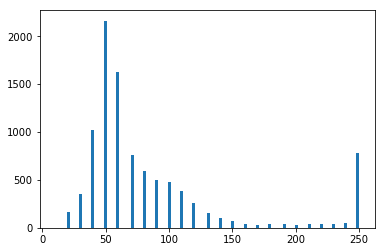

In [248]:
plt.hist(train_Y, 100)
plt.show()

In [ ]:
#for i in range(len(train_Y)):
#    print('pred_1={0}, org={2}'.format(pred_Y1[i], (predicted_Y_[i]+np.mean(train_Y)) , train_Y[i]))

# trying to tune the parameters

In [231]:
#Ridge regression
regRes = subgrad(train_X, train_Y, 0.8, 2, 0.1)

size of X_[0,:]=24 and size of W=9750
step=2, cost=4240.204336702992, norm_grad=71.33182011865833
step=3, cost=3825.677751370282, norm_grad=58.441689067038965
step=4, cost=3503.025045400967, norm_grad=47.43724276375553
step=5, cost=3252.873422717035, norm_grad=38.116186928311
step=6, cost=3059.767038963715, norm_grad=30.30525137465351
step=7, cost=2911.4284174847703, norm_grad=23.842362500920615
step=8, cost=2798.1540918640544, norm_grad=18.571740379816905
step=9, cost=2712.296190970809, norm_grad=14.34675832758355
step=10, cost=2647.837167946767, norm_grad=11.029665803007388
step=11, cost=2600.040010057259, norm_grad=8.493210488903664
step=12, cost=2565.1694326019524, norm_grad=6.6205543366834
step=13, cost=2540.2756091001374, norm_grad=5.302129421388442
step=14, cost=2523.0297831357566, norm_grad=4.429956085494248
step=15, cost=2511.6006463440676, norm_grad=3.8947793794437358
step=16, cost=2504.5610915865973, norm_grad=3.5928856966421154
step=17, cost=2500.8205151887496, norm_grad=3.

KeyboardInterrupt: 

In [129]:
W_opt = regRes[0]
predicted_train_Y = []
train_X_ = np.append(train_X,np.ones([len(train_X[:,0]),1]),axis=1)
for i in range(len(train_X_[:,0])):
    predicted_train_Y.append(sum(W_opt*train_X_[i,:]))

In [130]:
for i in range(len(train_Y)):
    print('pred={0} new={1}'.format(predicted_train_Y[i], train_Y[i]))

pred=20.495341711627514 new=320
pred=21.73281579397056 new=370
pred=21.020209562951642 new=60
pred=19.673723379124503 new=40
pred=21.742149589073744 new=180
pred=28.845028195109954 new=70
pred=22.67748483565024 new=60
pred=20.411989591600005 new=50
pred=19.792867325239538 new=50
pred=21.80986119462868 new=300
pred=21.595225030699105 new=110
pred=20.92418652071051 new=100
pred=20.628825117218177 new=120
pred=27.335655931391393 new=50
pred=19.242771400558023 new=90
pred=21.303445744675507 new=50
pred=20.72634255107404 new=50
pred=19.66825372011232 new=50
pred=20.46654641598421 new=40
pred=20.6575816727624 new=80
pred=20.5085436431805 new=70
pred=18.77534663978634 new=80
pred=21.41808656526809 new=40
pred=21.56803307668444 new=70
pred=19.690320777367216 new=60
pred=21.22682131505517 new=70
pred=19.703304318394654 new=70
pred=21.812774332782272 new=50
pred=21.493915314784243 new=150
pred=23.072039597930708 new=50
pred=22.23738919398218 new=100
pred=19.791849501380288 new=40
pred=20.2810010

pred=19.969685339374625 new=70
pred=19.413933062378707 new=100
pred=18.720589618730905 new=100
pred=18.430596880591732 new=560
pred=22.04807601791966 new=50
pred=19.588764080344465 new=60
pred=31.883120508921348 new=50
pred=19.099708263238277 new=70
pred=16.927296958834763 new=60
pred=20.943311145065906 new=600
pred=22.348877456110213 new=270
pred=20.750337778160326 new=40
pred=20.214344899289085 new=70
pred=20.228388456107893 new=50
pred=21.2193075378013 new=40
pred=20.812279538018895 new=60
pred=19.68857098493641 new=120
pred=19.536271263228258 new=130
pred=12.733027910328502 new=140
pred=21.15755758527898 new=50
pred=20.79431474249051 new=90
pred=20.635873917385403 new=180
pred=21.104181207988624 new=60
pred=19.76457149372549 new=40
pred=19.74172312489002 new=80
pred=20.915554377963232 new=70
pred=20.984517054316072 new=80
pred=17.494613254311194 new=60
pred=20.96180308622311 new=90
pred=20.056275815526877 new=50
pred=19.418618106901505 new=50
pred=20.006552426709483 new=50
pred=20.

pred=20.722204647706448 new=50
pred=19.986741180873285 new=140
pred=19.925615338729592 new=60
pred=21.148444541200778 new=50
pred=20.522083654238212 new=130
pred=20.80058840223005 new=60
pred=22.63412818462711 new=70
pred=20.75111068945655 new=350
pred=29.85972765297044 new=60
pred=20.7686466493084 new=40
pred=20.64471549524981 new=140
pred=20.180842190854808 new=60
pred=20.857073343449102 new=60
pred=15.145916792817495 new=330
pred=19.89099398588557 new=220
pred=19.967778928046798 new=60
pred=20.23129173009049 new=60
pred=20.40321394983769 new=100
pred=19.16294249385524 new=40
pred=23.642385672442323 new=60
pred=20.259224031766948 new=60
pred=21.069025170113836 new=80
pred=20.07487825066527 new=40
pred=24.53374981563923 new=70
pred=22.416882942679297 new=60
pred=19.75607872734863 new=50
pred=19.764279259794552 new=80
pred=20.14813688768395 new=40
pred=21.905373781917 new=50
pred=20.957745249994808 new=60
pred=20.52575135687455 new=40
pred=16.727406908190872 new=50
pred=20.928208841268

pred=21.335630804975366 new=40
pred=21.120510817590723 new=100
pred=21.576647710966704 new=70
pred=19.565943055181123 new=90
pred=18.067789082272878 new=60
pred=20.04937663956526 new=50
pred=21.17303236837746 new=40
pred=20.954462954335913 new=80
pred=19.991698256452544 new=20
pred=22.282678810174737 new=60
pred=20.424307190350074 new=40
pred=20.679945088305864 new=110
pred=21.19690862767644 new=40
pred=20.916111011772294 new=90
pred=21.499354472078977 new=50
pred=24.673541111130238 new=80
pred=20.766419066948277 new=40
pred=21.392942626860076 new=30
pred=21.235933648191835 new=60
pred=20.671274937249283 new=40
pred=19.43444766557703 new=90
pred=20.218600304495787 new=50
pred=21.726581355202388 new=50
pred=19.80051141557551 new=90
pred=25.261356163004944 new=60
pred=18.608490676277466 new=50
pred=22.046387131715644 new=60
pred=20.81037127637593 new=80
pred=21.948300858919726 new=110
pred=22.04930143162374 new=80
pred=21.176759409160397 new=70
pred=21.027117583445005 new=50
pred=21.8277

pred=21.420208006516802 new=180
pred=27.629928853809844 new=40
pred=15.98903083883928 new=360
pred=23.87834989845068 new=20
pred=21.316403187671106 new=40
pred=20.44670587708854 new=70
pred=19.74774906704029 new=70
pred=18.660792860421356 new=70
pred=20.963304931799055 new=80
pred=21.392177149887022 new=70
pred=16.647564414650343 new=50
pred=20.69752565667548 new=70
pred=20.682178142916165 new=60
pred=19.892604982901823 new=50
pred=19.58289338441279 new=310
pred=22.039434337833363 new=70
pred=21.494217950496616 new=340
pred=20.30781657781675 new=40
pred=19.538200140653842 new=70
pred=20.89645679116141 new=240
pred=21.66769774257646 new=70
pred=22.123520527533817 new=60
pred=19.42098559221159 new=70
pred=21.03110119633962 new=80
pred=20.594292715357017 new=430
pred=20.166950562369628 new=50
pred=13.647379339393897 new=40
pred=19.89372126371029 new=560
pred=15.730331699193538 new=70
pred=19.84941577182897 new=120
pred=21.404145420427504 new=80
pred=21.693213969723644 new=50
pred=21.35288

pred=20.065668897647576 new=60
pred=21.07039487794517 new=20
pred=20.517097279915827 new=90
pred=19.32873058457659 new=100
pred=20.70962389153778 new=70
pred=21.135061880886884 new=160
pred=20.969129164355305 new=70
pred=20.999685756669997 new=240
pred=21.18202536895259 new=80
pred=20.463823201988237 new=70
pred=15.029936823639826 new=370
pred=21.553361200215463 new=90
pred=15.474042278237524 new=120
pred=20.800544508089377 new=50
pred=21.031544961783606 new=50
pred=20.057759193417404 new=50
pred=19.203810061864864 new=60
pred=20.62992804581776 new=370
pred=19.945292380320456 new=110
pred=20.86231197291265 new=230
pred=19.793770158205202 new=30
pred=20.42702575514803 new=100
pred=20.506394581122073 new=330
pred=19.18724387236812 new=50
pred=20.364616104561314 new=40
pred=20.244281265615335 new=370
pred=19.985516294363084 new=60
pred=18.0446053672815 new=150
pred=22.045990710075632 new=80
pred=20.50005786002705 new=60
pred=19.979751215871833 new=50
pred=20.376328828606034 new=420
pred=2

pred=19.80386544076337 new=650
pred=21.273061286343186 new=40
pred=20.230146477458398 new=60
pred=20.465295997876897 new=60
pred=23.504987467085833 new=30
pred=20.599932229038217 new=60
pred=21.4465744043624 new=270
pred=20.19832640406093 new=80
pred=19.901037423030058 new=60
pred=20.11399802116151 new=350
pred=19.287301767358798 new=50
pred=18.298564723962794 new=80
pred=20.699298970060628 new=100
pred=20.11281421001343 new=40
pred=19.757532803957716 new=40
pred=20.248027414693542 new=80
pred=19.379759805440273 new=40
pred=21.77154630524107 new=340
pred=19.88367171922181 new=100
pred=19.65992829631459 new=240
pred=21.20126690064891 new=50
pred=20.9087604122698 new=50
pred=19.69906146457773 new=50
pred=21.29273181903445 new=60
pred=20.78128894990445 new=100
pred=20.462958684556902 new=630
pred=29.42608943821501 new=50
pred=19.968482502206637 new=60
pred=21.322775850234414 new=60
pred=21.589622584506827 new=50
pred=20.49545190873014 new=50
pred=20.59132893126384 new=50
pred=19.092325419

In [ ]:
#Lasso regession
lassoRes = subgrad(X_egn, Y, 0.8, 1, 0.1)

size of X_[0,:]=24 and size of W=13000
step=2, cost=4237.386170859878, norm_grad=77.7148867833747
step=3, cost=3748.8935094683484, norm_grad=69.82641441290492
step=4, cost=3339.6199017103204, norm_grad=62.43189553101492
step=5, cost=3000.457495874945, norm_grad=55.5193875378707
step=6, cost=2722.717602819909, norm_grad=49.08338160831893
step=7, cost=2498.230956532135, norm_grad=43.10247592921629
step=8, cost=2319.2036721164063, norm_grad=37.5968566528505
step=9, cost=2178.4297392026765, norm_grad=32.565157198893196
step=10, cost=2069.3668808163716, norm_grad=27.99994227945365
step=11, cost=1986.2495712178495, norm_grad=23.8654988847387
step=12, cost=1923.9185816036652, norm_grad=20.18355843613033
step=13, cost=1877.975491651445, norm_grad=16.92304647143947
step=14, cost=1844.7329153362996, norm_grad=14.039083379964612
step=15, cost=1821.122786169665, norm_grad=11.54863669283521
step=16, cost=1804.5998599881857, norm_grad=9.435875545161853
step=17, cost=1793.364104844274, norm_grad=7.57

step=118, cost=1771.673212006363, norm_grad=0.8009808819478957
step=119, cost=1771.6732120063623, norm_grad=0.8009808819475849
overshoot!! correcting
step=120, cost=1771.6732120063634, norm_grad=0.8009808819475849
step=121, cost=1771.6732120063623, norm_grad=0.8009808819472601
overshoot!! correcting
step=122, cost=1771.6732120063632, norm_grad=0.8009808819472601
step=123, cost=1771.6732120063632, norm_grad=0.800980881947089
step=124, cost=1771.6732120063632, norm_grad=0.8009808819469999
step=125, cost=1771.6732120063632, norm_grad=0.8009808819469068
overshoot!! correcting
step=126, cost=1771.6732120063634, norm_grad=0.8009808819469068
step=127, cost=1771.673212006363, norm_grad=0.8009808819468088
overshoot!! correcting
step=128, cost=1771.6732120063634, norm_grad=0.8009808819468088
step=129, cost=1771.6732120063625, norm_grad=0.8009808819467569
overshoot!! correcting
step=130, cost=1771.6732120063634, norm_grad=0.8009808819467569
step=131, cost=1771.6732120063634, norm_grad=0.800980881

step=241, cost=1771.6732120063643, norm_grad=0.8009808819464715
step=242, cost=1771.6732120063643, norm_grad=0.8009808819464714
step=243, cost=1771.6732120063643, norm_grad=0.8009808819464714
step=244, cost=1771.6732120063643, norm_grad=0.8009808819464714
step=245, cost=1771.6732120063643, norm_grad=0.8009808819464713
step=246, cost=1771.6732120063643, norm_grad=0.8009808819464712
step=247, cost=1771.6732120063643, norm_grad=0.8009808819464711
step=248, cost=1771.6732120063643, norm_grad=0.8009808819464709
step=249, cost=1771.6732120063643, norm_grad=0.8009808819464708
step=250, cost=1771.6732120063643, norm_grad=0.8009808819464707
step=251, cost=1771.6732120063643, norm_grad=0.8009808819464707
step=252, cost=1771.6732120063643, norm_grad=0.8009808819464703
step=253, cost=1771.6732120063643, norm_grad=0.8009808819464703
step=254, cost=1771.6732120063643, norm_grad=0.8009808819464699
step=255, cost=1771.6732120063643, norm_grad=0.8009808819464698
step=256, cost=1771.673212006364, norm_g

step=368, cost=1771.6732120063646, norm_grad=0.8009808819464549
step=369, cost=1771.6732120063646, norm_grad=0.8009808819464547
step=370, cost=1771.6732120063646, norm_grad=0.8009808819464546
step=371, cost=1771.6732120063646, norm_grad=0.8009808819464546
step=372, cost=1771.6732120063646, norm_grad=0.8009808819464542
step=373, cost=1771.6732120063646, norm_grad=0.8009808819464543
step=374, cost=1771.6732120063646, norm_grad=0.800980881946454
step=375, cost=1771.6732120063646, norm_grad=0.8009808819464539
step=376, cost=1771.6732120063643, norm_grad=0.8009808819464537
step=377, cost=1771.6732120063643, norm_grad=0.8009808819464534
step=378, cost=1771.6732120063643, norm_grad=0.8009808819464532
step=379, cost=1771.6732120063643, norm_grad=0.8009808819464531
step=380, cost=1771.6732120063643, norm_grad=0.8009808819464529
step=381, cost=1771.6732120063643, norm_grad=0.8009808819464529
step=382, cost=1771.6732120063643, norm_grad=0.8009808819464526
step=383, cost=1771.6732120063643, norm_g

overshoot!! correcting
step=496, cost=1771.6732120063643, norm_grad=0.8009808819462302
step=497, cost=1771.673212006364, norm_grad=0.8009808819462275
overshoot!! correcting
step=498, cost=1771.6732120063643, norm_grad=0.8009808819462275
step=499, cost=1771.673212006364, norm_grad=0.8009808819462261
overshoot!! correcting
step=500, cost=1771.6732120063643, norm_grad=0.8009808819462261
step=501, cost=1771.6732120063643, norm_grad=0.800980881946225
step=502, cost=1771.6732120063643, norm_grad=0.8009808819462244
step=503, cost=1771.6732120063643, norm_grad=0.8009808819462242
step=504, cost=1771.6732120063643, norm_grad=0.8009808819462235
step=505, cost=1771.6732120063643, norm_grad=0.800980881946223
step=506, cost=1771.6732120063643, norm_grad=0.8009808819462224
step=507, cost=1771.6732120063643, norm_grad=0.800980881946222
step=508, cost=1771.6732120063643, norm_grad=0.8009808819462214
step=509, cost=1771.6732120063643, norm_grad=0.8009808819462207
step=510, cost=1771.6732120063643, norm_

step=620, cost=1771.6732120063648, norm_grad=0.8009808819461469
overshoot!! correcting
step=621, cost=1771.6732120063652, norm_grad=0.8009808819461469
step=622, cost=1771.6732120063648, norm_grad=0.8009808819461468
overshoot!! correcting
step=623, cost=1771.6732120063652, norm_grad=0.8009808819461468
step=624, cost=1771.6732120063652, norm_grad=0.8009808819461467
step=625, cost=1771.6732120063652, norm_grad=0.8009808819461466
step=626, cost=1771.6732120063652, norm_grad=0.8009808819461466
step=627, cost=1771.6732120063652, norm_grad=0.8009808819461466
step=628, cost=1771.6732120063652, norm_grad=0.8009808819461464
step=629, cost=1771.6732120063652, norm_grad=0.8009808819461463
step=630, cost=1771.6732120063652, norm_grad=0.8009808819461463
step=631, cost=1771.6732120063652, norm_grad=0.8009808819461463
step=632, cost=1771.6732120063652, norm_grad=0.800980881946146
step=633, cost=1771.6732120063652, norm_grad=0.800980881946146
step=634, cost=1771.6732120063652, norm_grad=0.8009808819461

step=745, cost=1771.6732120063648, norm_grad=0.8009808819461252
step=746, cost=1771.6732120063648, norm_grad=0.800980881946125
step=747, cost=1771.6732120063648, norm_grad=0.8009808819461249
step=748, cost=1771.6732120063648, norm_grad=0.8009808819461249
step=749, cost=1771.6732120063648, norm_grad=0.8009808819461248
step=750, cost=1771.6732120063648, norm_grad=0.8009808819461249
step=751, cost=1771.6732120063648, norm_grad=0.8009808819461248
step=752, cost=1771.6732120063648, norm_grad=0.8009808819461248
step=753, cost=1771.6732120063648, norm_grad=0.8009808819461247
step=754, cost=1771.6732120063648, norm_grad=0.8009808819461246
step=755, cost=1771.6732120063648, norm_grad=0.8009808819461244
step=756, cost=1771.6732120063648, norm_grad=0.8009808819461243
step=757, cost=1771.6732120063648, norm_grad=0.8009808819461243
step=758, cost=1771.6732120063648, norm_grad=0.8009808819461242
step=759, cost=1771.6732120063648, norm_grad=0.800980881946124
step=760, cost=1771.6732120063648, norm_gr

step=872, cost=1771.6732120063657, norm_grad=0.8009808819460504
step=873, cost=1771.6732120063657, norm_grad=0.8009808819460493
step=874, cost=1771.6732120063657, norm_grad=0.8009808819460477
step=875, cost=1771.6732120063657, norm_grad=0.8009808819460466
step=876, cost=1771.6732120063657, norm_grad=0.8009808819460453
overshoot!! correcting
step=877, cost=1771.673212006366, norm_grad=0.8009808819460453
step=878, cost=1771.673212006366, norm_grad=0.8009808819460434
step=879, cost=1771.673212006366, norm_grad=0.8009808819460429
step=880, cost=1771.673212006366, norm_grad=0.8009808819460418
step=881, cost=1771.673212006366, norm_grad=0.8009808819460413
step=882, cost=1771.6732120063657, norm_grad=0.8009808819460402
step=883, cost=1771.6732120063657, norm_grad=0.8009808819460389
step=884, cost=1771.6732120063657, norm_grad=0.8009808819460379
step=885, cost=1771.6732120063657, norm_grad=0.8009808819460368
step=886, cost=1771.6732120063657, norm_grad=0.8009808819460359
step=887, cost=1771.67

step=998, cost=1771.6732120063668, norm_grad=0.8009808819459452
step=999, cost=1771.6732120063668, norm_grad=0.8009808819459439
step=1000, cost=1771.6732120063668, norm_grad=0.8009808819459422
step=1001, cost=1771.6732120063668, norm_grad=0.800980881945941
step=1002, cost=1771.6732120063666, norm_grad=0.8009808819459391
step=1003, cost=1771.6732120063666, norm_grad=0.8009808819459371
step=1004, cost=1771.6732120063666, norm_grad=0.8009808819459353
step=1005, cost=1771.6732120063666, norm_grad=0.800980881945933
step=1006, cost=1771.6732120063666, norm_grad=0.8009808819459309
overshoot!! correcting
step=1007, cost=1771.6732120063668, norm_grad=0.8009808819459309
step=1008, cost=1771.6732120063668, norm_grad=0.8009808819459285
step=1009, cost=1771.6732120063668, norm_grad=0.8009808819459273
step=1010, cost=1771.6732120063668, norm_grad=0.8009808819459258
step=1011, cost=1771.6732120063668, norm_grad=0.8009808819459243
step=1012, cost=1771.6732120063668, norm_grad=0.8009808819459224
step=1

step=1121, cost=1771.6732120063675, norm_grad=0.8009808819458387
step=1122, cost=1771.6732120063675, norm_grad=0.8009808819458386
step=1123, cost=1771.6732120063675, norm_grad=0.8009808819458378
step=1124, cost=1771.6732120063675, norm_grad=0.8009808819458376
step=1125, cost=1771.6732120063675, norm_grad=0.8009808819458373
step=1126, cost=1771.6732120063675, norm_grad=0.8009808819458367
step=1127, cost=1771.6732120063675, norm_grad=0.8009808819458362
step=1128, cost=1771.6732120063675, norm_grad=0.8009808819458356
step=1129, cost=1771.6732120063675, norm_grad=0.8009808819458353
step=1130, cost=1771.6732120063675, norm_grad=0.8009808819458347
step=1131, cost=1771.6732120063675, norm_grad=0.800980881945834
step=1132, cost=1771.6732120063675, norm_grad=0.8009808819458334
step=1133, cost=1771.6732120063675, norm_grad=0.8009808819458328
step=1134, cost=1771.6732120063675, norm_grad=0.8009808819458323
step=1135, cost=1771.6732120063675, norm_grad=0.8009808819458314
step=1136, cost=1771.67321

step=1246, cost=1771.6732120063677, norm_grad=0.8009808819456721
step=1247, cost=1771.6732120063677, norm_grad=0.8009808819456702
step=1248, cost=1771.6732120063677, norm_grad=0.8009808819456682
step=1249, cost=1771.6732120063677, norm_grad=0.8009808819456663
step=1250, cost=1771.6732120063675, norm_grad=0.8009808819456643
overshoot!! correcting
step=1251, cost=1771.6732120063677, norm_grad=0.8009808819456643
step=1252, cost=1771.6732120063677, norm_grad=0.8009808819456621
step=1253, cost=1771.6732120063677, norm_grad=0.8009808819456607
step=1254, cost=1771.6732120063677, norm_grad=0.8009808819456592
step=1255, cost=1771.6732120063677, norm_grad=0.800980881945658
step=1256, cost=1771.6732120063677, norm_grad=0.8009808819456565
step=1257, cost=1771.6732120063677, norm_grad=0.800980881945655
step=1258, cost=1771.6732120063677, norm_grad=0.8009808819456535
step=1259, cost=1771.6732120063677, norm_grad=0.8009808819456519
step=1260, cost=1771.6732120063677, norm_grad=0.8009808819456503
step

In [53]:
reg_res = do_subgradient_descent(train_X,train_Y, 0,1,0.001)

size of X[0,:]=25 and size of W=25


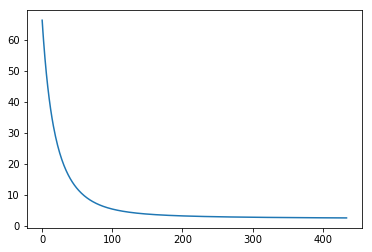

In [54]:
plt.plot(reg_res[1])
plt.show()

In [55]:
predicted_train_Y = []
train_X_ = np.append(train_X,np.ones([len(train_X[:,0]),1]),axis=1)
for i in range(len(train_X_[:,0])):
    predicted_train_Y.append(sum(reg_res[0]*train_X_[i,:]))

In [121]:
predicted_train_Y

[20.495356433501641,
 21.732832213886436,
 21.020224986145816,
 19.673736809594292,
 21.742166092039277,
 28.845055126575893,
 22.677502744002879,
 20.41200420200181,
 19.792880992150646,
 21.809877829634317,
 21.595241352992197,
 20.924201881539737,
 20.628840147635135,
 27.335680806699614,
 19.242784264322331,
 21.303461635657833,
 20.726357574891367,
 19.668267188533044,
 20.466561030411178,
 20.657596621887674,
 20.50855835779273,
 18.775358775890666,
 21.418102612816604,
 21.568049391291659,
 19.690334376636038,
 21.226837081333194,
 19.703317914465032,
 21.812790990218321,
 21.493931469151981,
 23.072058106210726,
 22.237406439988924,
 19.791863189873286,
 20.281015602800846,
 22.187478134565382,
 21.773458508846026,
 20.551738933199921,
 21.100832716586556,
 21.459231363482608,
 20.479191453333669,
 21.353897276206368,
 21.361161844980714,
 20.835671353636624,
 21.721188758730797,
 14.63192316139277,
 20.477852045032343,
 20.979050257550266,
 20.722601046648581,
 21.549850071720

In [122]:
train_Y

array([320, 370,  60, ...,  50,  50,  30])

In [110]:
#just for checking purpose
train_standard_X = train_X - train_X.mean(axis=0)
for i in range(len(train_standard_X[0,:])):
    train_standard_X[:,i] = train_standard_X[:,i]/np.max(train_standard_X[:,i])
train_standard_Y = (train_Y - train_Y.mean())/np.max(train_Y)

In [123]:
predicted_standard_Y = []
for i in range(len(train_standard_X[:,0])):
    predicted_standard_Y.append(sum(reg_res[0]*train_standard_X[1,:]))


In [115]:
train_standard_Y

array([ 0.24454889,  0.29949394, -0.0411654 , ..., -0.05215441,
       -0.05215441, -0.07413243])

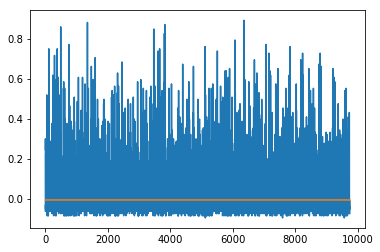

In [124]:
plt.plot(train_standard_Y)
plt.plot(predicted_standard_Y)
plt.show()